# **TR_2020/05 - Technical report: Extreme climatic events for Campinas**


|Technical Report ID  |2020/05|
|--|--|
| Title |Extreme climatic events for Campinas|
| Authors | Júlia De Lázari, Paula Dornhofer|
| Creation Date| 2020-11|

This report refers to the occurence of extreme climatic events in Campinas, SP.

## **Database description**

The database used is from Viracopos (Campinas, SP), that has daily measures of minimum and maximum temperature, average atmospheric pressure and minimum and maximum humidity. The database has data from 1983 until 2018. 

A [linear regression](https://github.com/climate-and-health-datasci-Unicamp/project-climatic-variations-cardiovascular-diseases/blob/main/notebooks/TR_2021_15_Technical_report_Linear_regression_to_complete_Viracopos_data.ipynb) was perfomed to complete gaps and inconsistences in the humidity data for the year of 2017. CEPAGRI data was used to perfom the regression.

**input:**
- viracopos_regression.csv: csv file with Viracopos data, already processed and with the regression for humidity.

## **Results**

The [climatex library](https://github.com/climate-and-health-datasci-Unicamp/py-climate-health-toolbox), developed to compute extreme climate events, was used to compute the events and its yearly and seasonal metrics for the period between 2001 and 2018.

**ouput**: EV_VCP.csv -  dataframe with meteorological parameters and a column for each extreme event indicating its occurence.





##**Extreme events**

The analysed extreme events were:

**Extreme thermal range:** days in which the thermal range is above the 90th percentile.

**Extreme difference of temperature between days:** days in which the difference between maximum and minimum temperature in relation to the previous days is above the 90th percentile.

**Low pressure waves:** three or more consecutive days in which the maximum and minimum pressure were below the 10th percentile.

**High pressure waves:** three or more consecutive days in which the maximum and minimum pressure were above the 90th percentile.
    
**Extreme difference of pressure between days:** days in which the difference between maximum and minimum pressure in relation to the previous days is above the 90th percentile.

**Low humidity waves:** three or more consecutive days in which the maximum and minimum humidity were below the 10th percentile.

**High humidity waves:** three or more consecutive days in which the maximum and minimum humidity were above the 90th percentile.
    
**Extreme difference of humidity between days:** days in which the difference between maximum and minimum humidity in relation to the previous days is above the 90th percentile.

**Extreme humidity variation:** days in which the humidity variation (max humidity - min humidity) is above the 90th percentile.


##**Metrics**

The analysed metrics were

- Number of events per year
- Total number of days under influence of the extreme event
- Longest event

The second and third metric were analysed only for the wave events.

##**Import libraries**

In [ ]:
! git clone https://github.com/climate-and-health-datasci-Unicamp/py-climate-health-toolbox

Cloning into 'py-climate-health-toolbox'...
remote: Enumerating objects: 142, done.
remote: Counting objects: 100% (142/142), done.
remote: Compressing objects: 100% (138/138), done.
remote: Total 142 (delta 70), reused 4 (delta 0), pack-reused 0
Receiving objects: 100% (142/142), 7.88 MiB | 9.82 MiB/s, done.
Resolving deltas: 100% (70/70), done.


In [ ]:
#-------------------------------------------------------------------#
#                       Import libraries                            #
#-------------------------------------------------------------------#
import pandas as pd
import numpy as np
import datetime
import more_itertools as mit
import datetime
import matplotlib.pyplot as plt
from datetime import timedelta
from calendar import isleap

#climatex
import sys
sys.path.append('/content/py-climate-health-toolbox/climahe')
import climatex as tex

#files
from google.colab import drive
from google.colab import files

drive.mount('/content/drive')

Mounted at /content/drive


##**Load data**

In [ ]:
#-------------------------------------------------------------------#
#                          Load Viracopos data                      #
#-------------------------------------------------------------------#

#Load humidity dataframe
df_VCP = pd.read_csv('/content/drive/Shareddrives/Clima&Saúde/Pesquisadores/DeLázari_Júlia/data/Climáticos_Viracopos/viracopos_regression.csv')
df_VCP = df_VCP.drop(columns = {'Unnamed: 0'})
df_VCP['DATE'] = pd.to_datetime(df_VCP['DATE']) #convert to datetime
df_VCP['YEAR'] = df_VCP['DATE'].dt.strftime('%Y') #create column for year

In [ ]:
#-------------------------------------------------------------------#
#              Define climatic normal and database                  #
#-------------------------------------------------------------------#
#define climatic normal
climatic_normal = df_VCP[(df_VCP['YEAR']>='1983') & (df_VCP['YEAR']<='2018')]
#define database
database = df_VCP[df_VCP['YEAR']>='2001']

## **Temperature**


### **Extreme thermal range**



In [ ]:
help(tex.check_TemperatureAboveRange)

Help on function check_TemperatureAboveRange in module climatex:

check_TemperatureAboveRange(database, db_columnMAX, db_columnMIN, climatic_normal, pct_columnMAX, pct_columnMIN, db_columnDay365=False, db_complete=False, cn_columnDay365=False, df_pct=None, percentile_value=0.9, window_size=15)
    #-------------------------------------------------------------------------------
    ## Checks for days with a high range of temperature according to the Climatic Normal
    ##
    ## It first create a column for range in the database and in the Climatic normal. 
    ## Then it obtains a dataframe with the percentiles computed from the Climatic Normal
    ## according to the defined window size (df_pct). Then compares it with the database,
    ## to check if the range is above the percentile. If it is above the threshold, 
    ## the column 'above_pct' receives 1.
    ##
    ## Climatic Normal dataframe needs to have at least 'DATE' and 'pct_column'
    ## Database dataframe needs to have at 

In [ ]:
#get dataframe with columns 'above_pct_range' indicating the occurence of the event
#and the dataframe with the 90th percentile for temperature range
database, df_pct = tex.check_TemperatureAboveRange(database,'TMAX','TMIN',climatic_normal,'TMAX','TMIN')

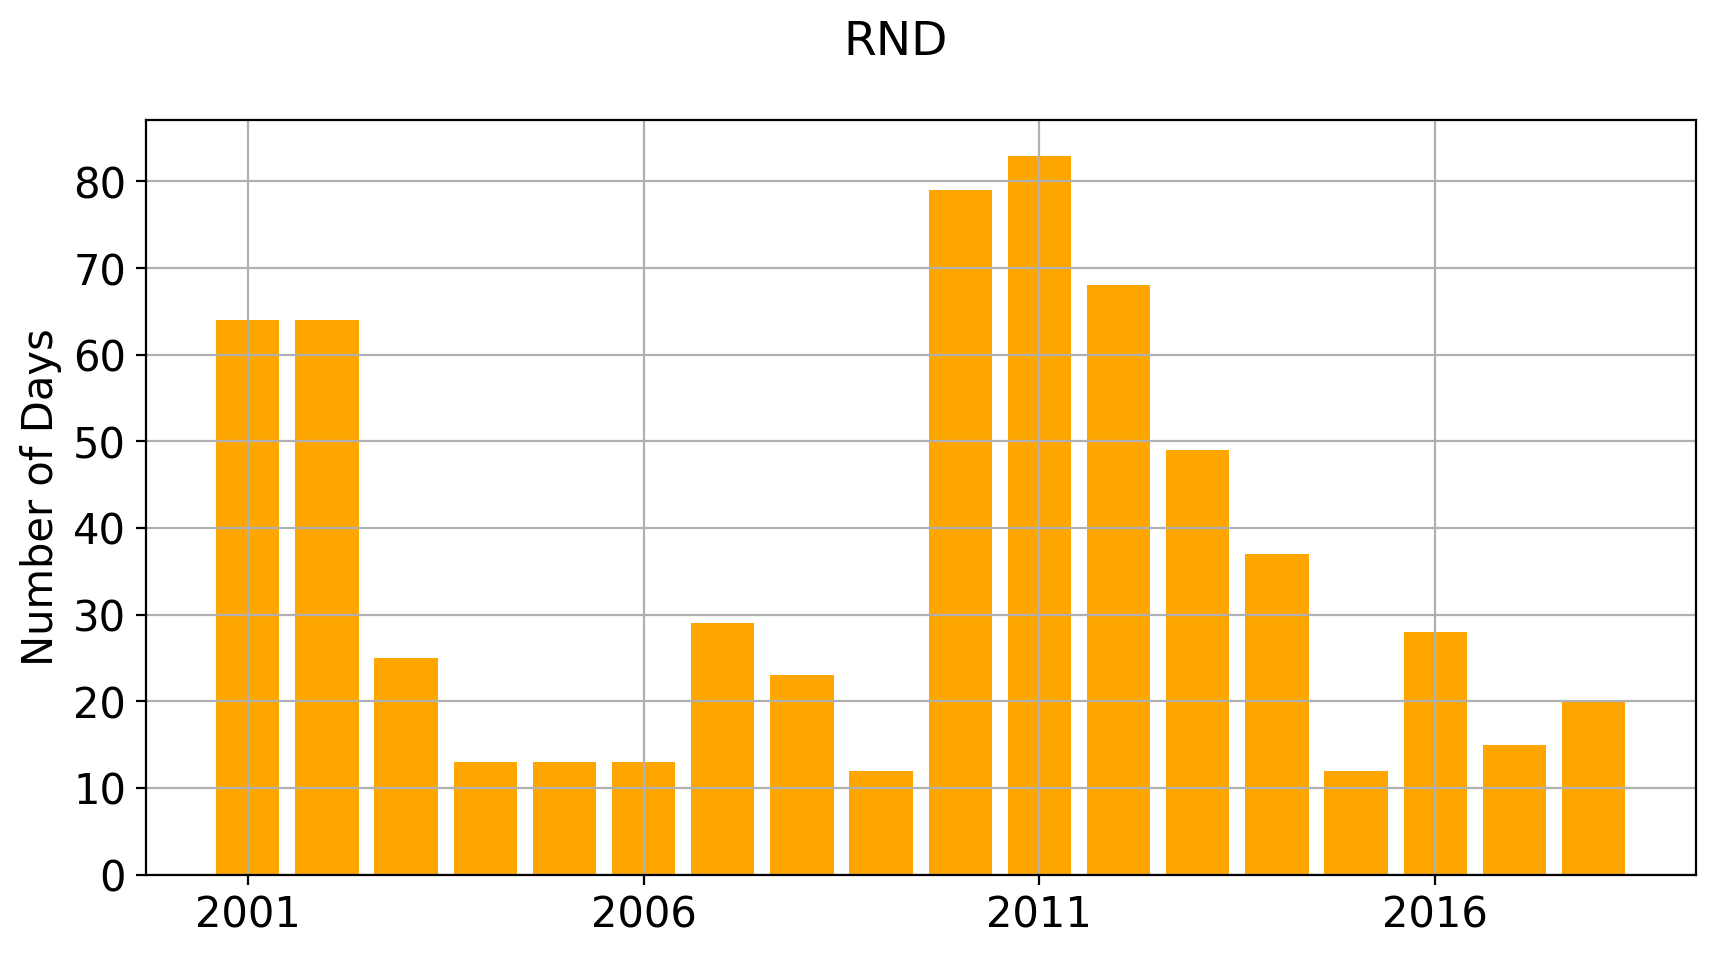

In [ ]:
#metrics
metrics = tex.range_metrics(database,True)

In [ ]:
#number of events
print("Number of events:", int(metrics.sum()))

Number of events: 647


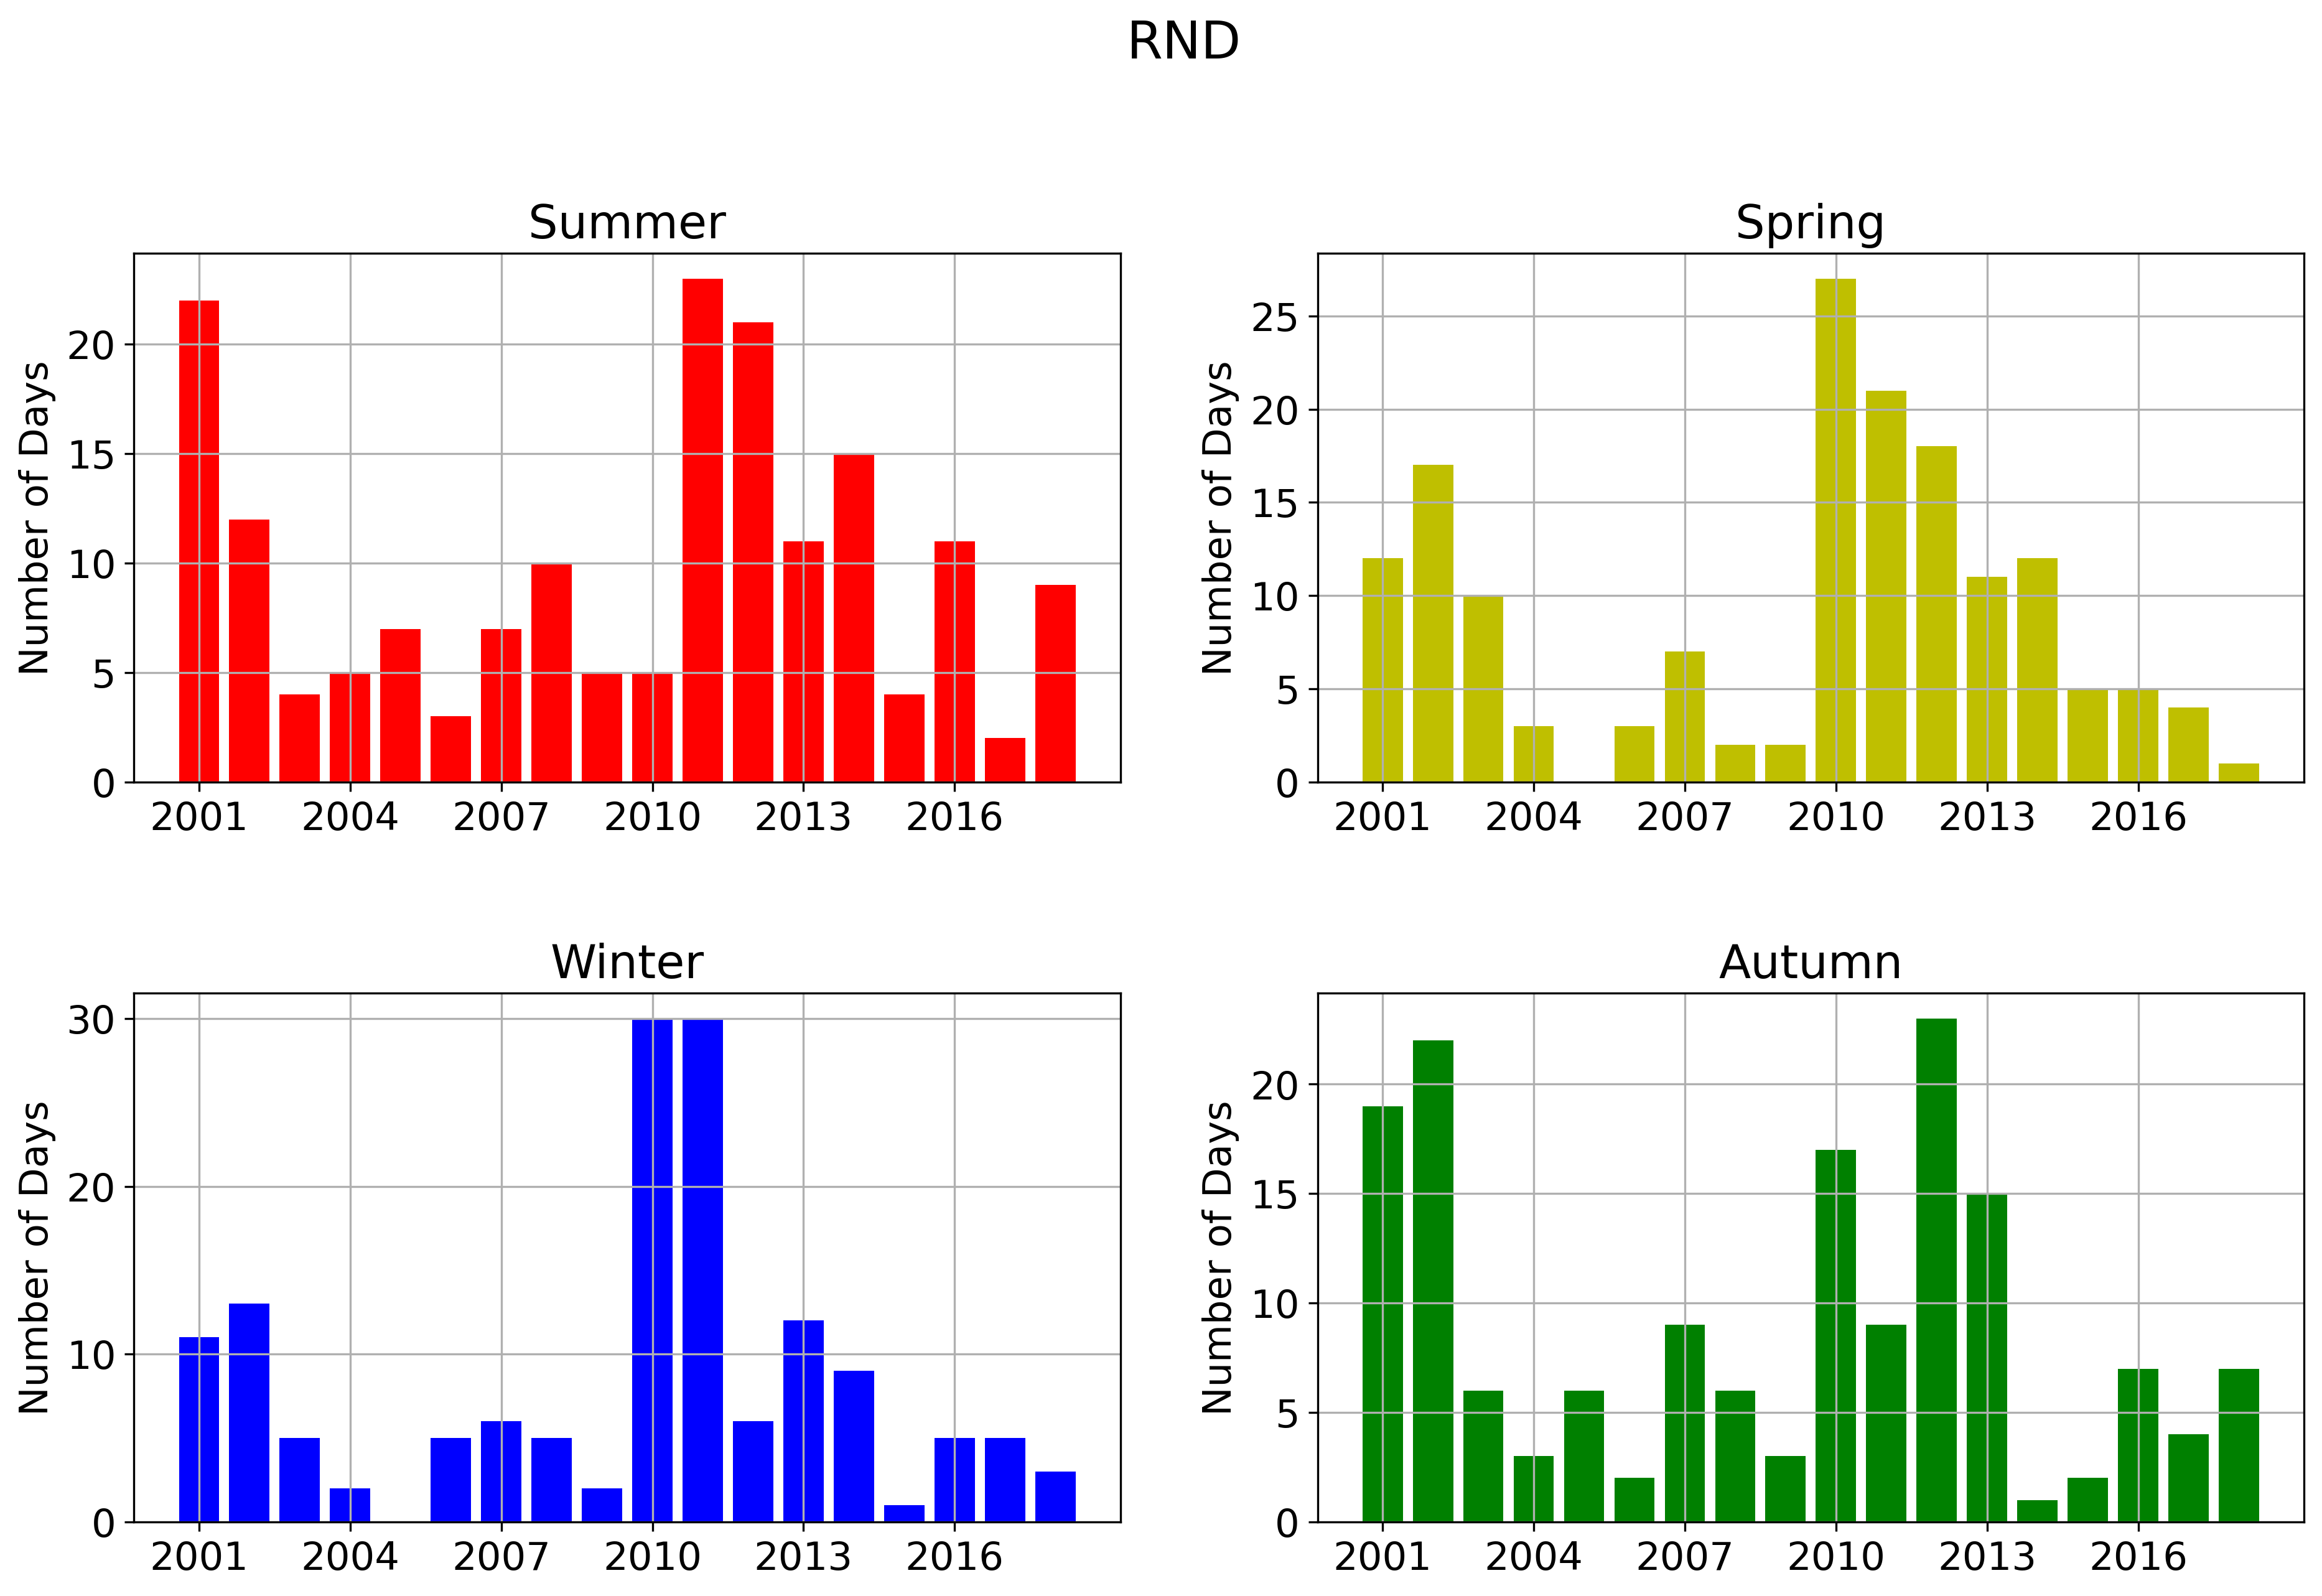

In [ ]:
#seasonal metrics
seasonal_metrics = tex.range_seasonMetrics(database,True)

In [ ]:
#rename columns
database = database.rename(columns={'above_pct_range':'above_temp_range'})

### **Extreme temperature difference between days**


In [ ]:
help(tex.check_Temperature_difdays)

Help on function check_Temperature_difdays in module climatex:

check_Temperature_difdays(database, db_columnMAX, db_columnMIN, climatic_normal, pct_columnMAX, pct_columnMIN, db_columnDay365=False, db_complete=False, cn_columnDay365=False, df_pct=None, percentile_value=0.9, window_size=15)
    #-------------------------------------------------------------------------------
    ## Checks for subsequent days with a high difference of temperature according to the Climatic Normal
    ##
    ## It first creates columns for the absolute value of difference between maximum
    ## temperature (Dif_max) between two subsequent days and for the difference between minimum
    ## temperature (Dif_min) between two subsequent days in the databate and in the Climatic normal.
    ## It then creates a column 'control' that is equal 1 when dif_max and dif_min have the
    ## same sign (or both positive or both negative).
    ## Then it obtains a  dataframe with the percentiles computed from the
    ## Cl

In [ ]:
#get dataframe with columns 'above_pct_dif' indicating the occurence of a event
#and the dataframe with the 90th percentile for maximum and minimum temperature difference
database, df_pct = tex.check_Temperature_difdays(database,'TMAX','TMIN',climatic_normal,'TMAX','TMIN')

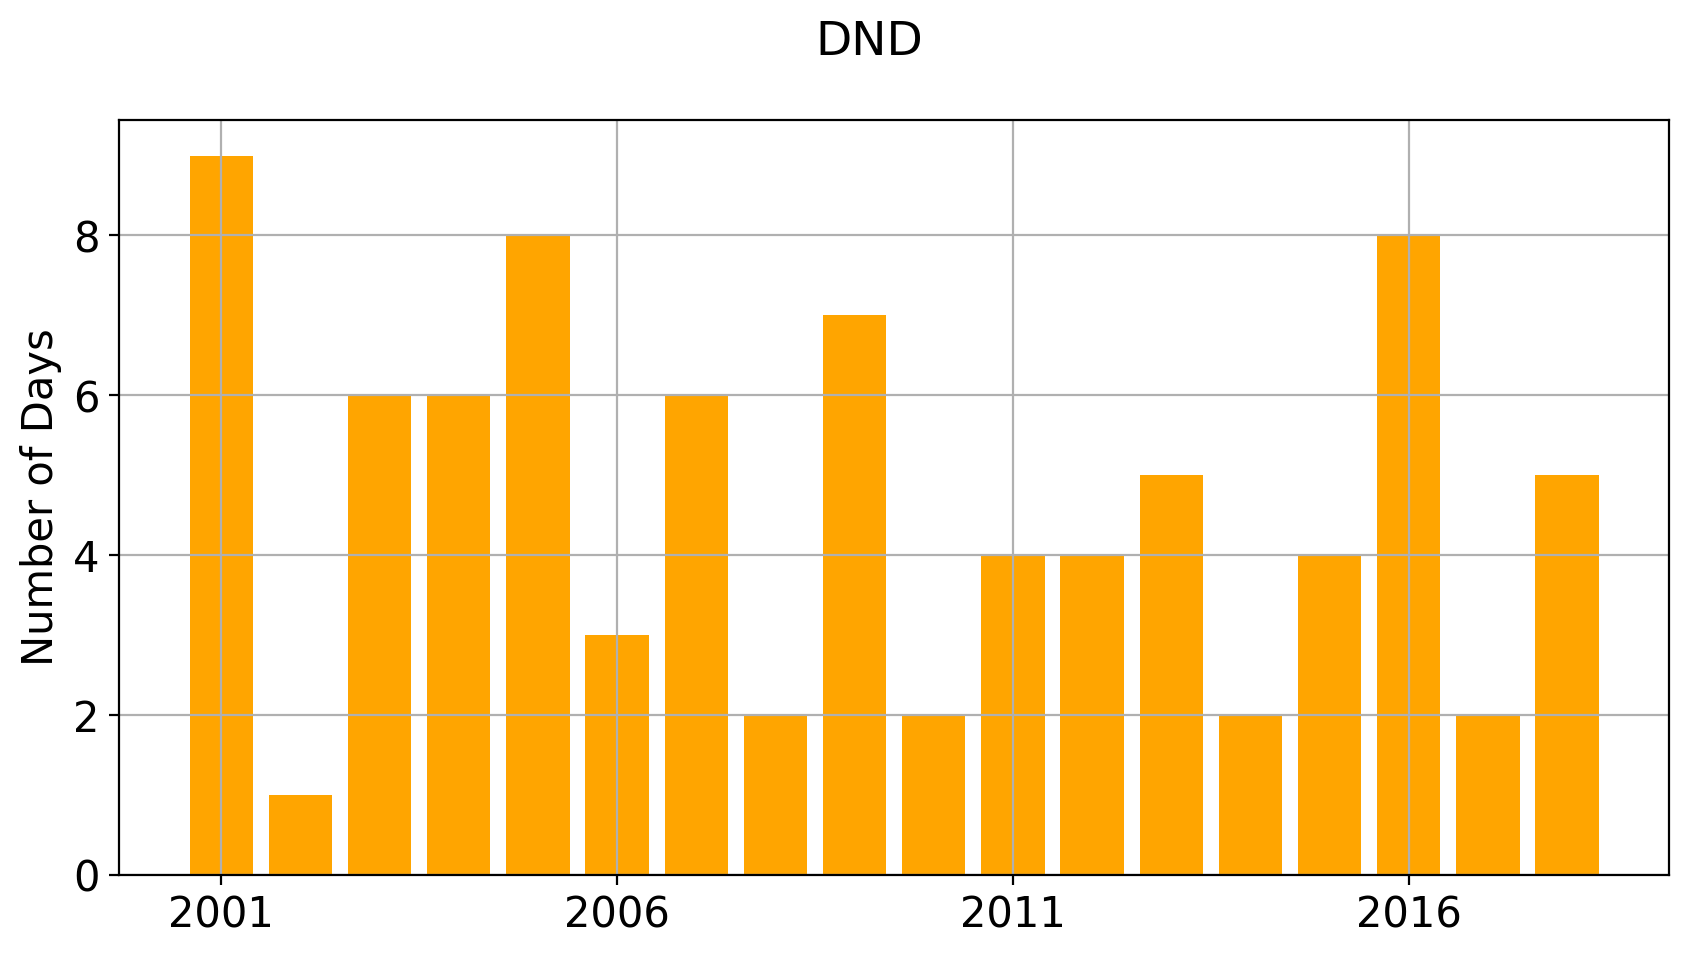

In [ ]:
#metrics
metrics = tex.dif_metrics(database,True)

In [ ]:
#number of events
print("Number of events:", int(metrics.sum()))

Number of events: 84


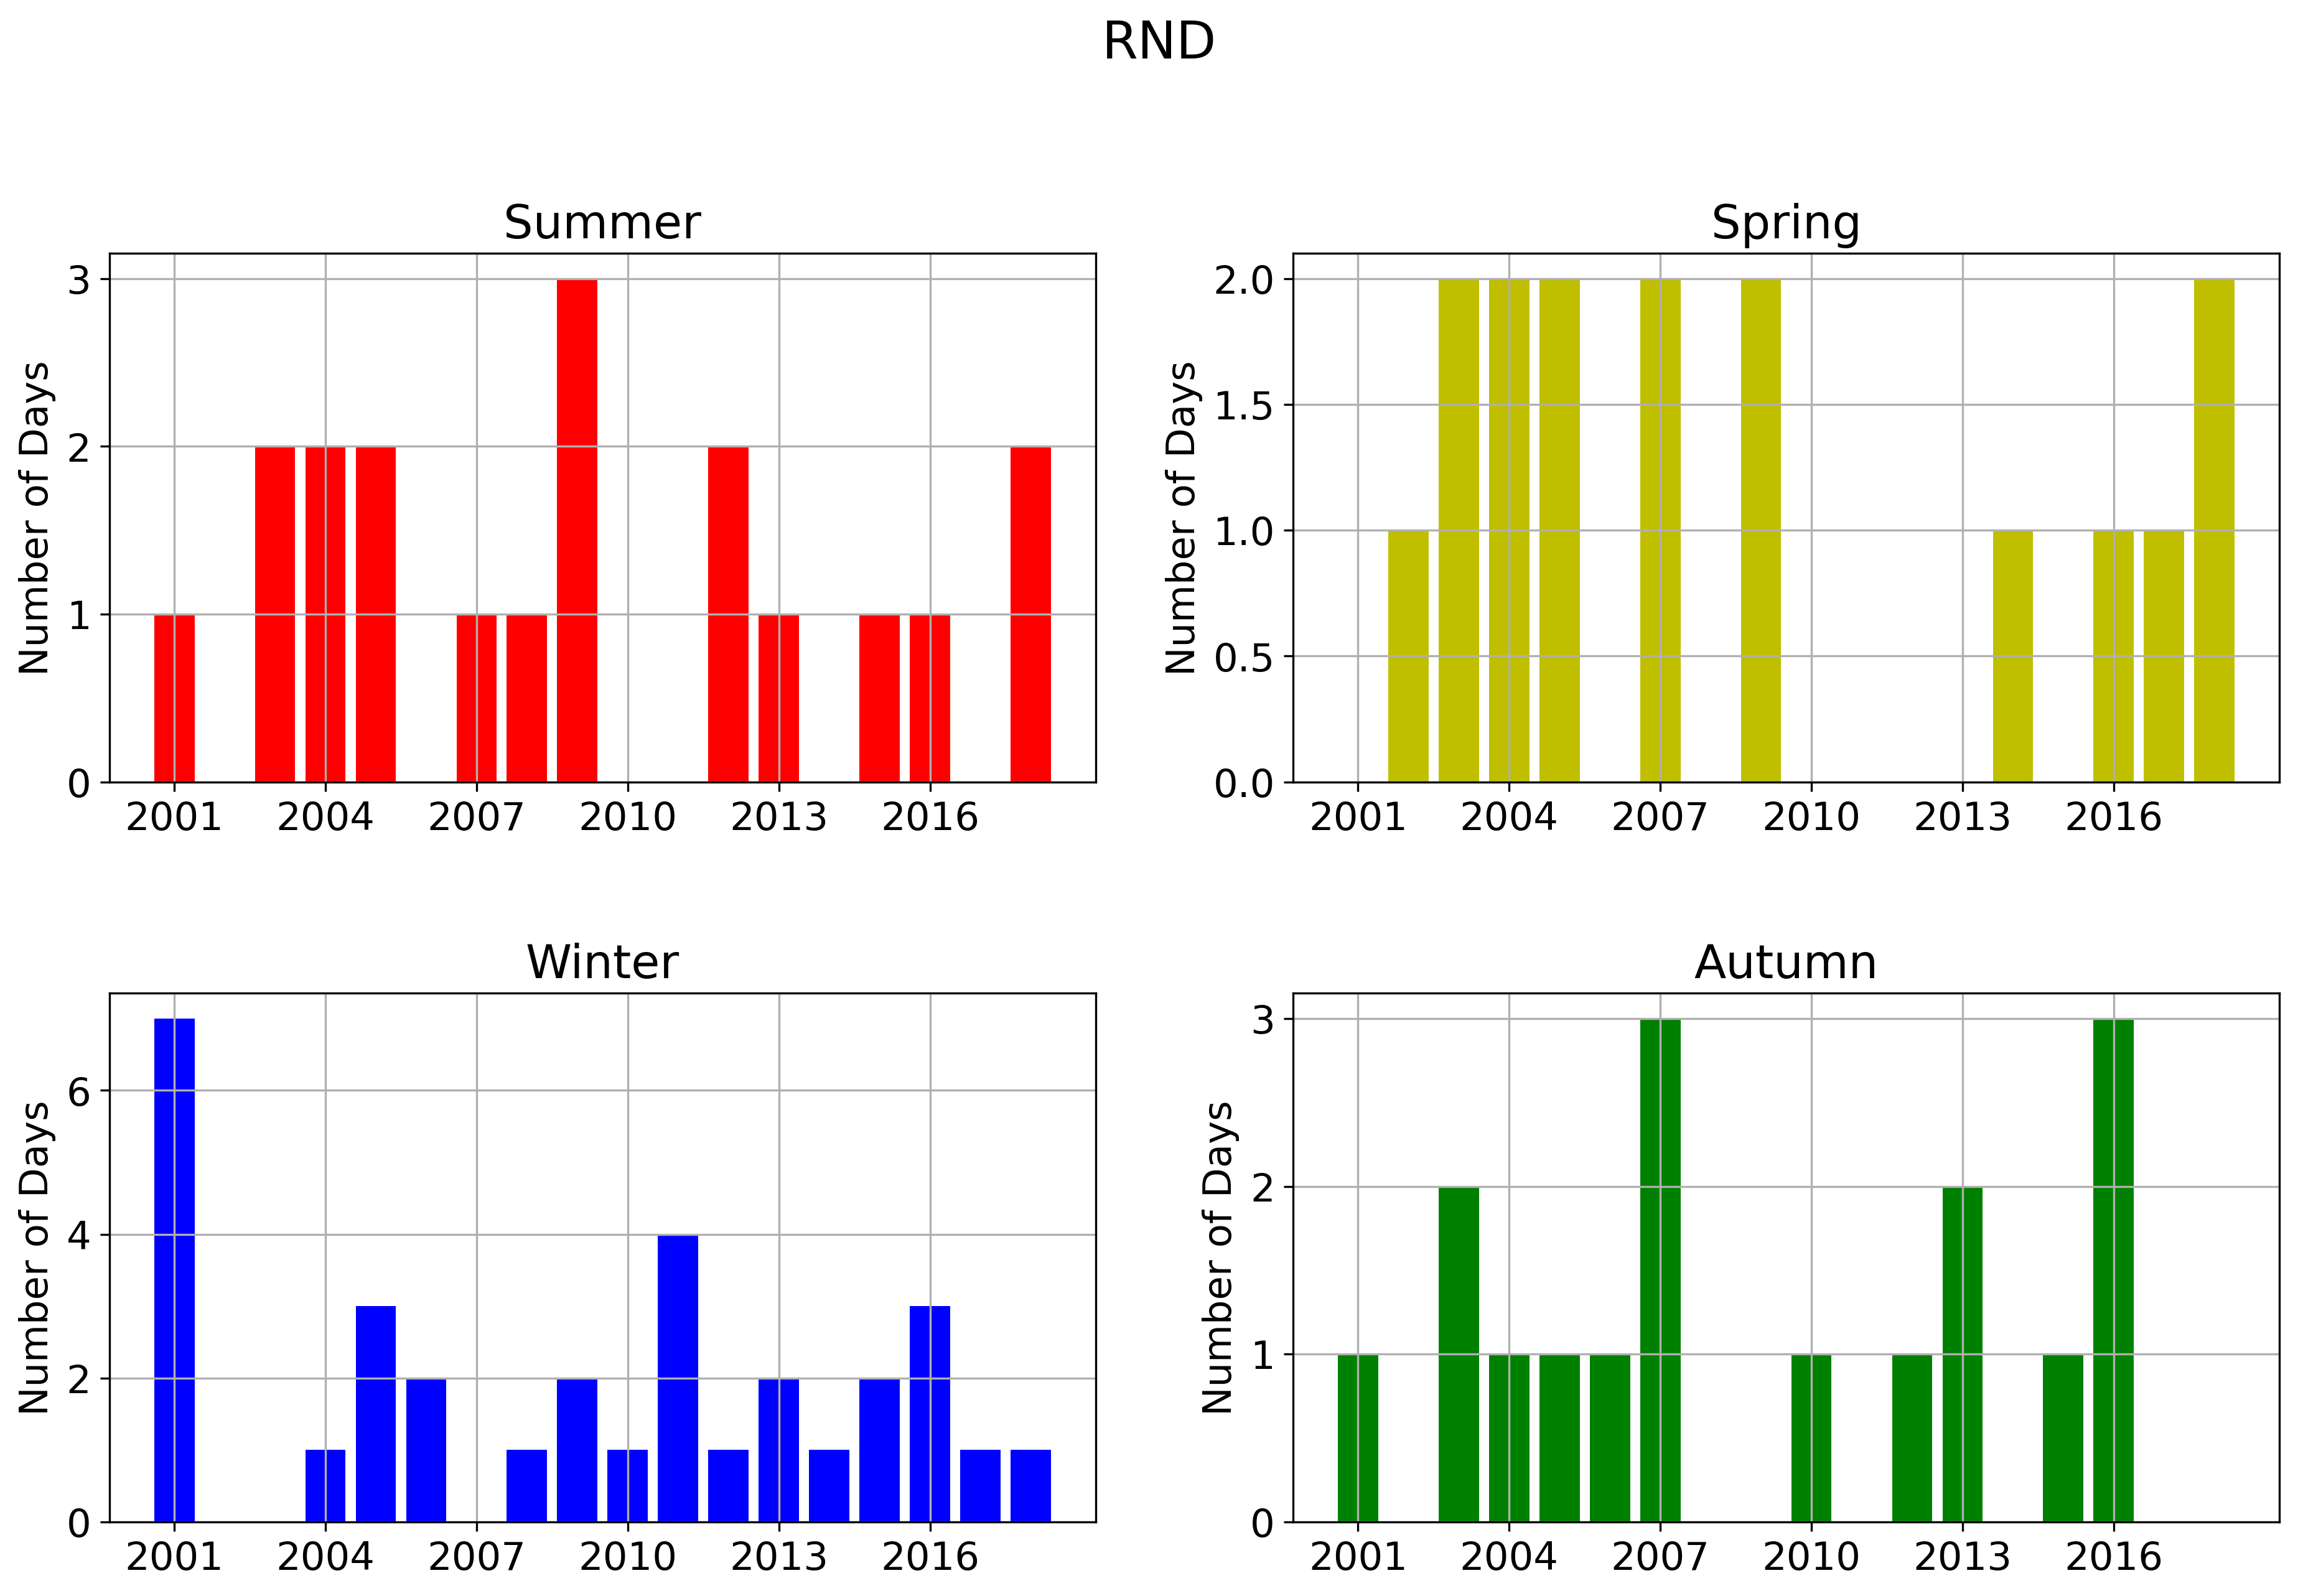

In [ ]:
#seasonal metrics
seasonal_metrics = tex.dif_seasonMetrics(database,True)

In [ ]:
#rename columns
database = database.rename(columns={'above_pct_dif':'above_temp_dif'})

## **Pressure**

As the database only have the average value of pressure for each day, this value was used as maximum and minimum parameter in the functions.


### **Low Pressure Wave**


In [ ]:
help(tex.check_LowPressureWave)

Help on function check_LowPressureWave in module climatex:

check_LowPressureWave(database, db_columnMAX, db_columnMIN, climatic_normal, pct_columnMAX, pct_columnMIN, db_columnDay365=False, db_complete=False, cn_columnDay365=False, df_pct=None, percentile_value=0.1, window_size=15)
    #-------------------------------------------------------------------------------
    ## Checks for Low Pressure Waves on the database according to the Climatic Normal
    ##
    ## This function is inspired in Geirinhas et al. 2018 method for thermal waves and adapted
    ## for pressure waves .It obtains first a dataframe with the percentiles computed
    ## from the Climatic Normal according to the defined window size (df_pct). Then
    ## compares it with the database, to check if the maximum and minimum values of pressure
    ## are below the  corresponding percentile. If they are below the threshold, the column 'below_pct'
    ## receives 1. This column is then used to identify if there are 3 or mor

In [ ]:
#get dataframe with columns 'below_pct' and 'LPW' indicating the occurence of a low pressure wave
#and the dataframe with the 10th percentile for pressure
database,df_pct = tex.check_LowPressureWave(database,'AVGPRESSURE','AVGPRESSURE',climatic_normal,'AVGPRESSURE','AVGPRESSURE')

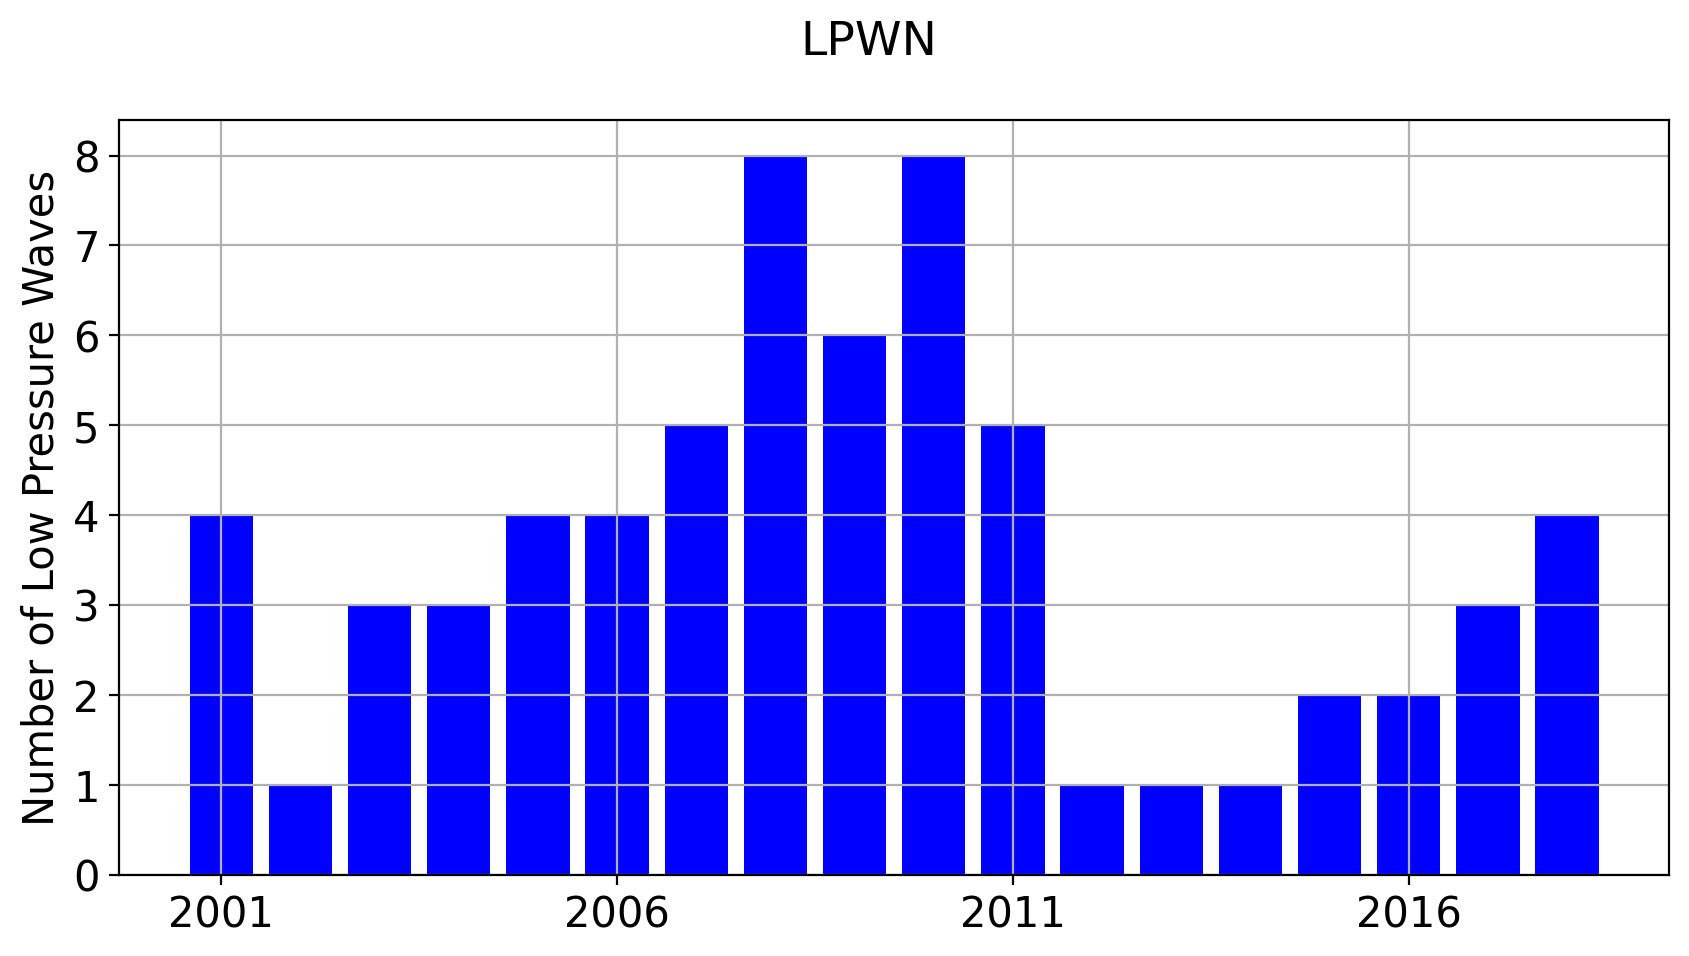

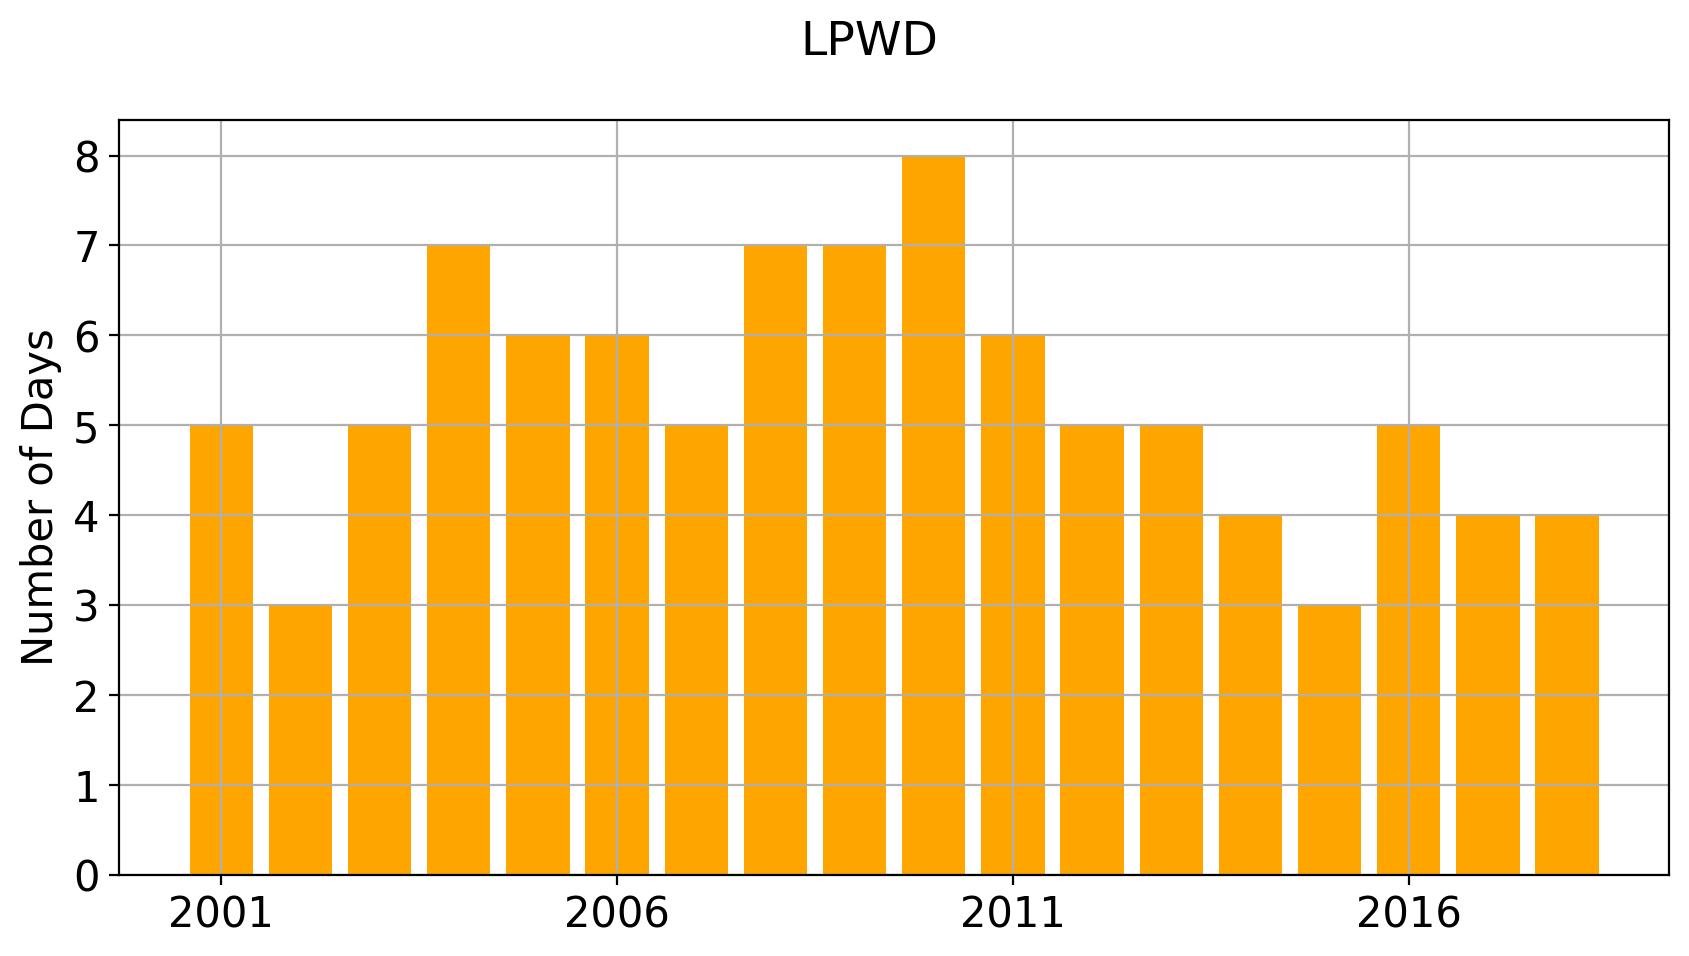

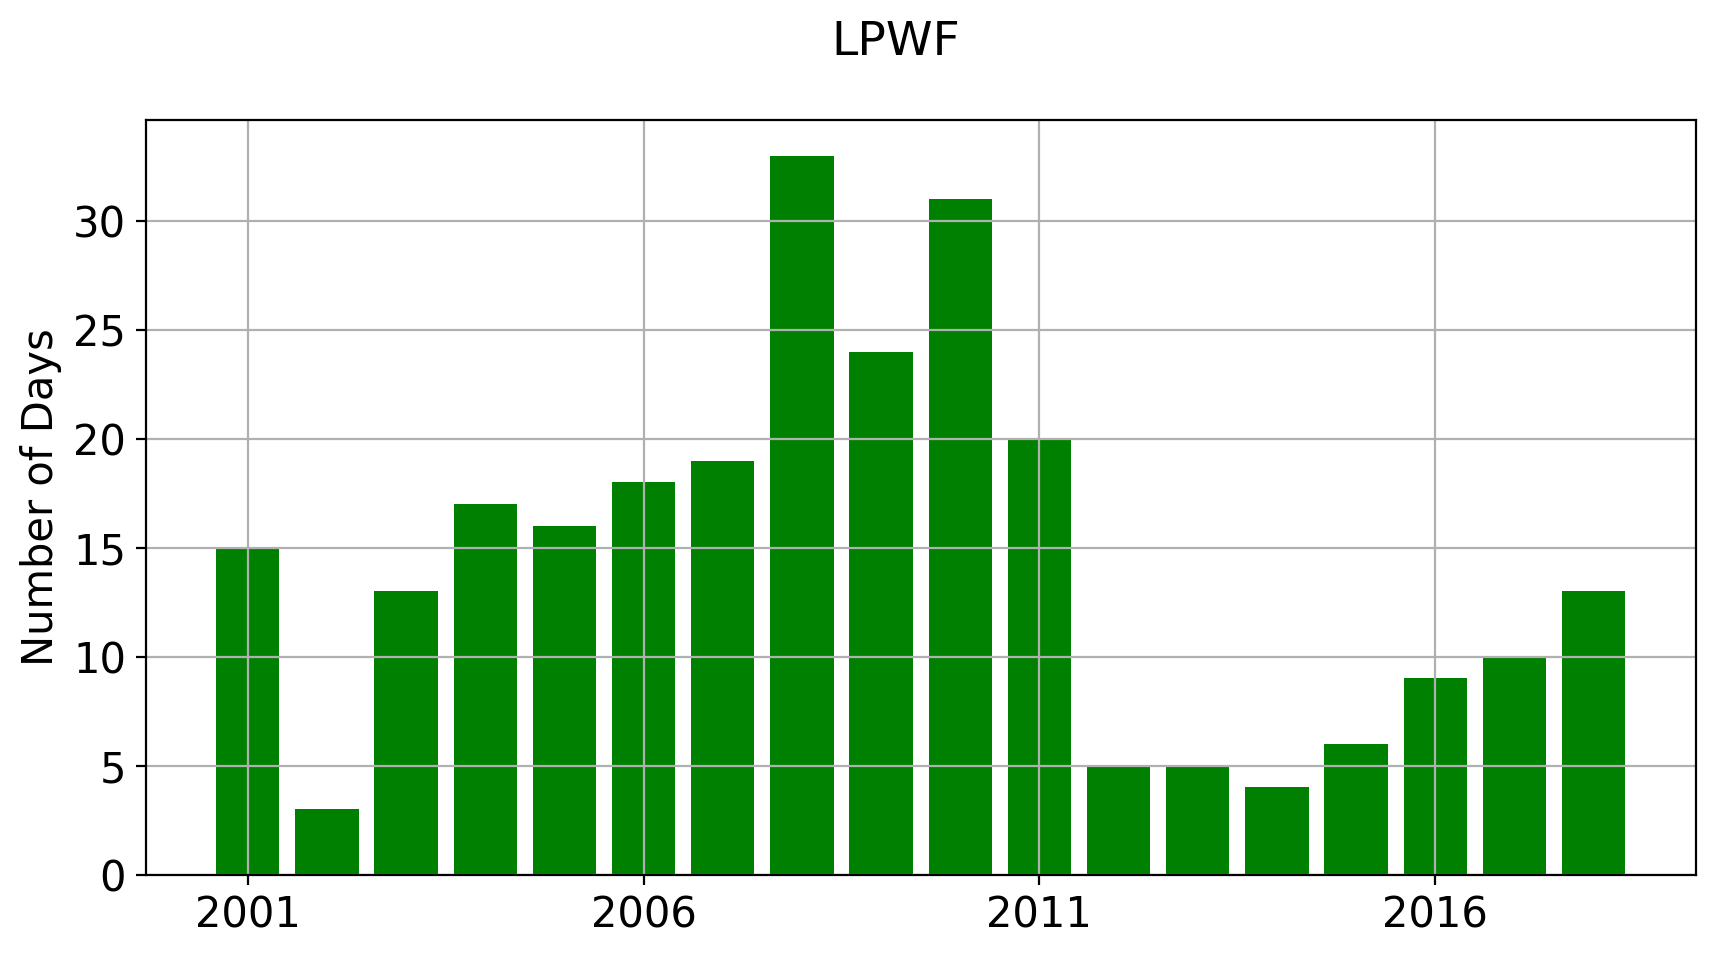

In [ ]:
#metrics
metrics = tex.wave_metrics(database,'LPW',True)

In [ ]:
#number of events
print("Number of events:", int(metrics['LPWN'].sum()))
#total of days under extreme event
print("Number of events:", int(metrics['LPWF'].sum()))
#longest event
print("Number of events:", int(metrics['LPWD'].max()))

Number of events: 65
Number of events: 261
Number of events: 8


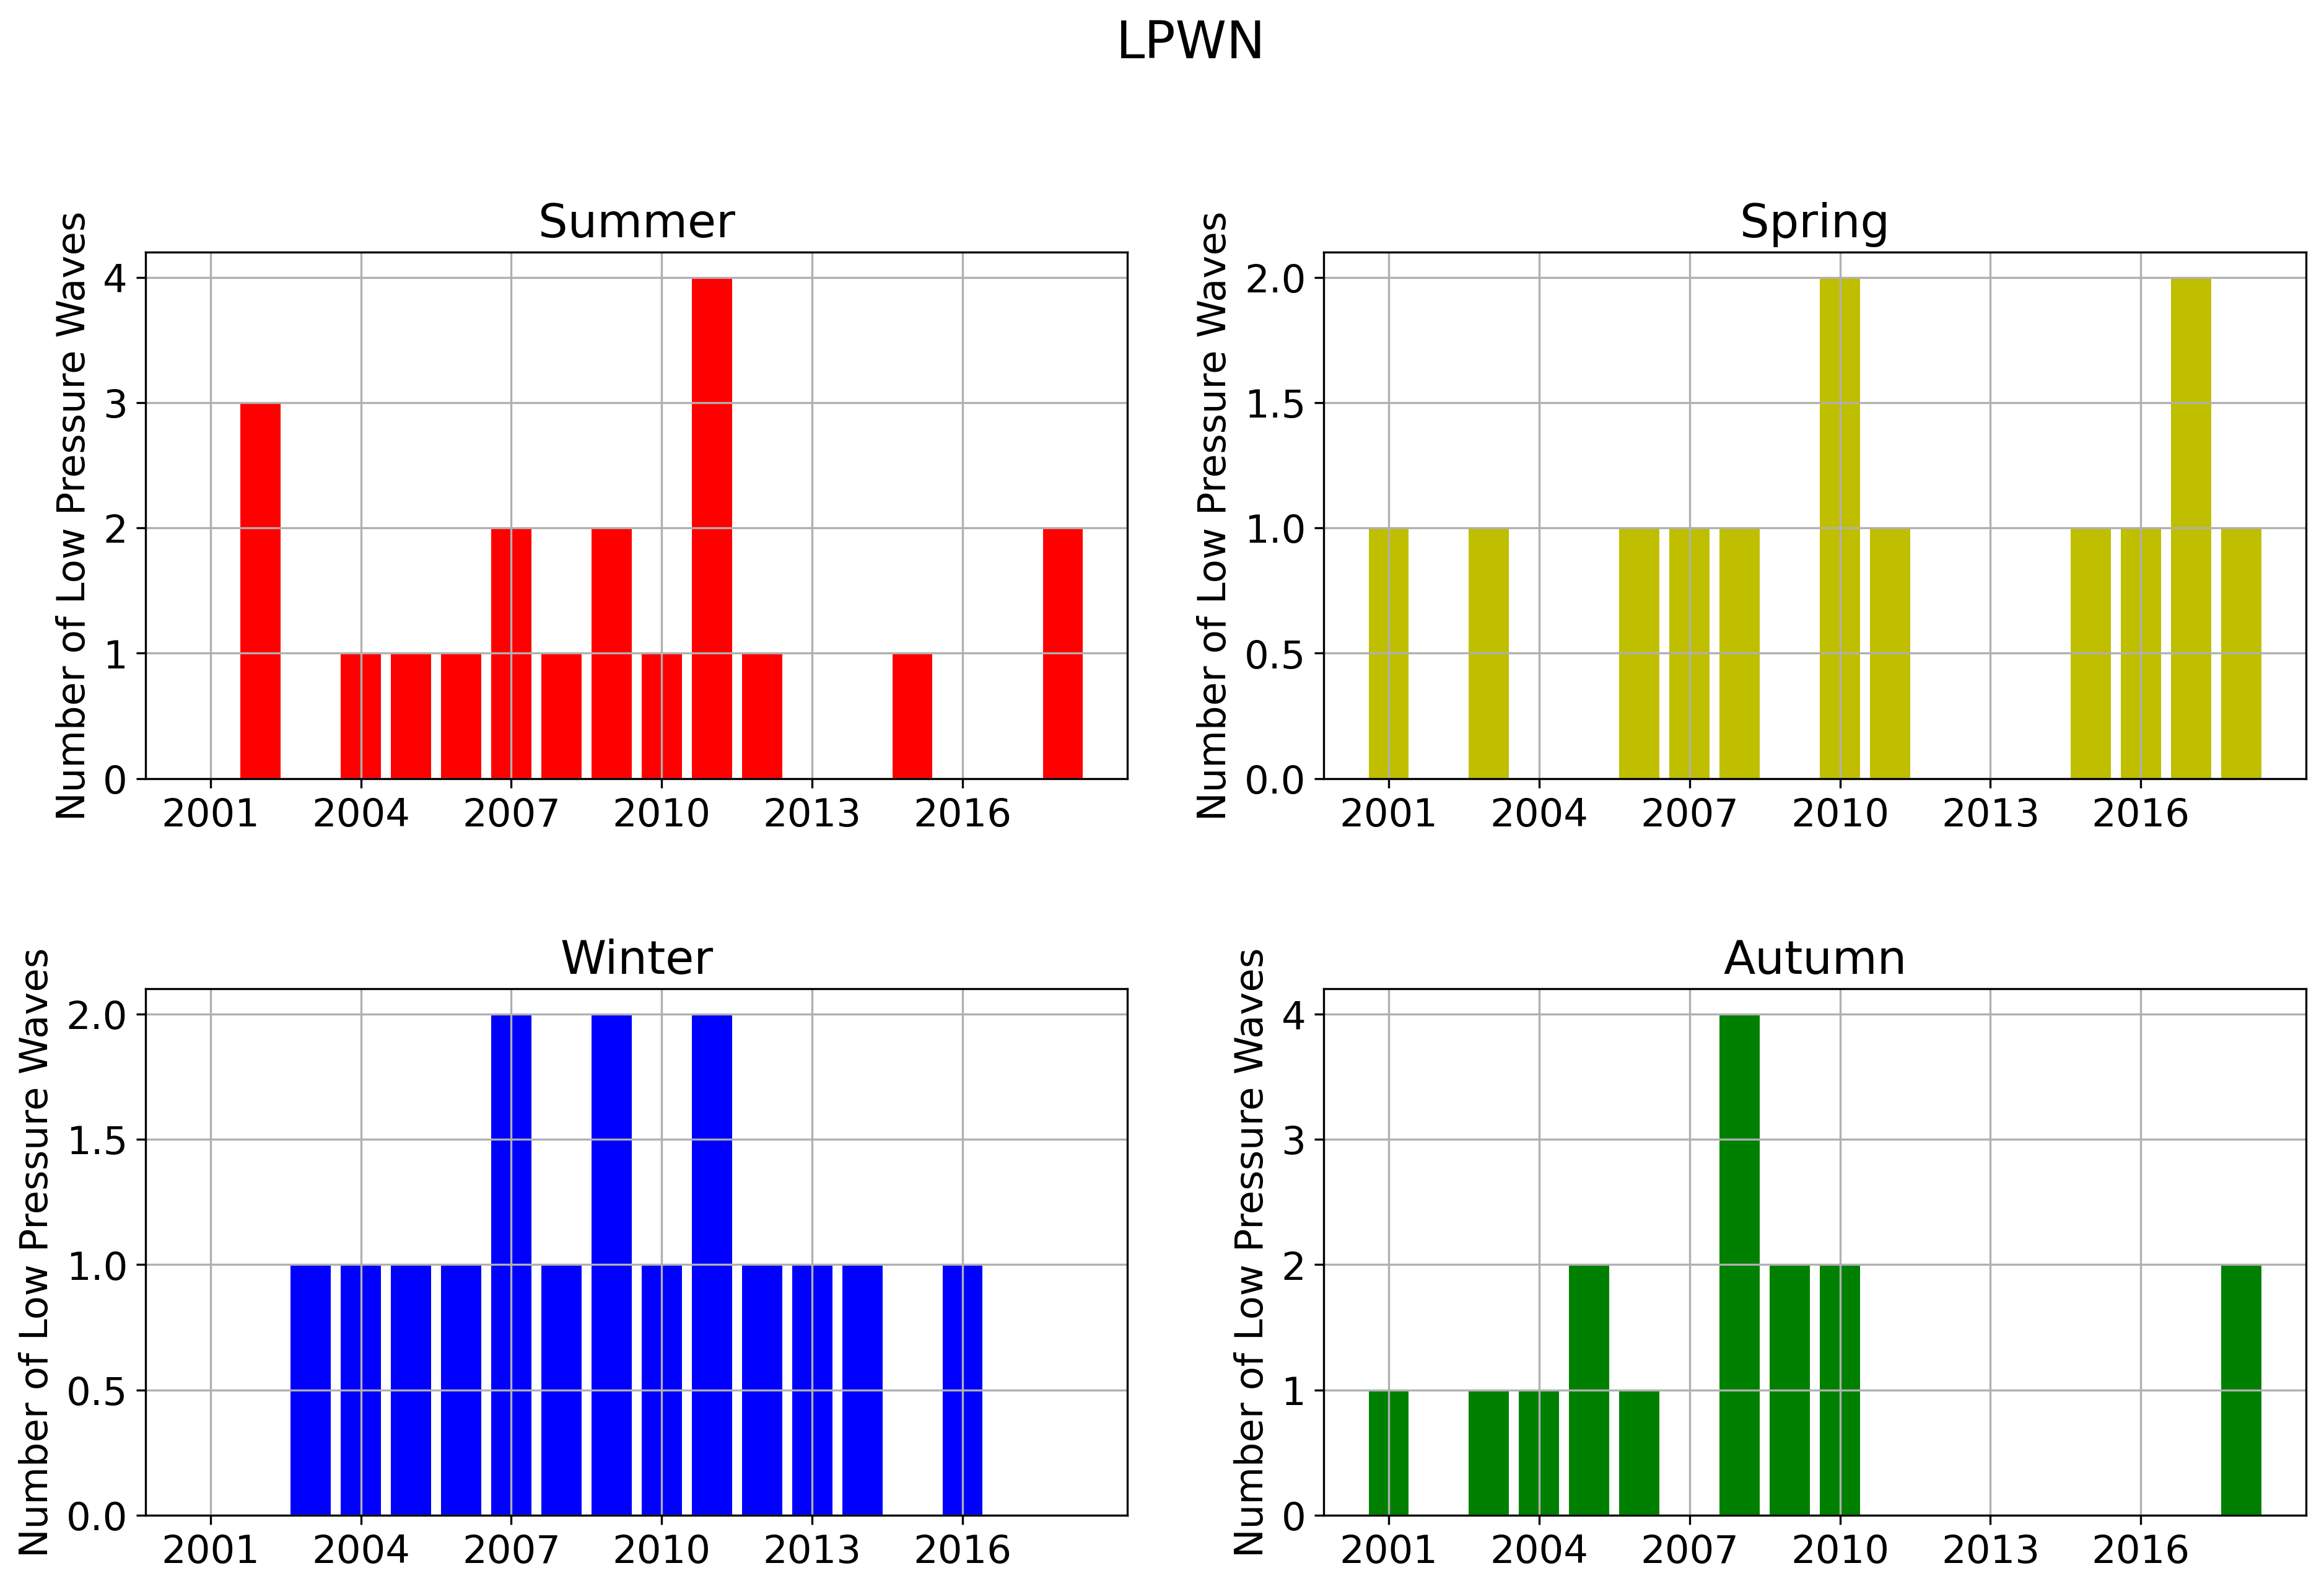

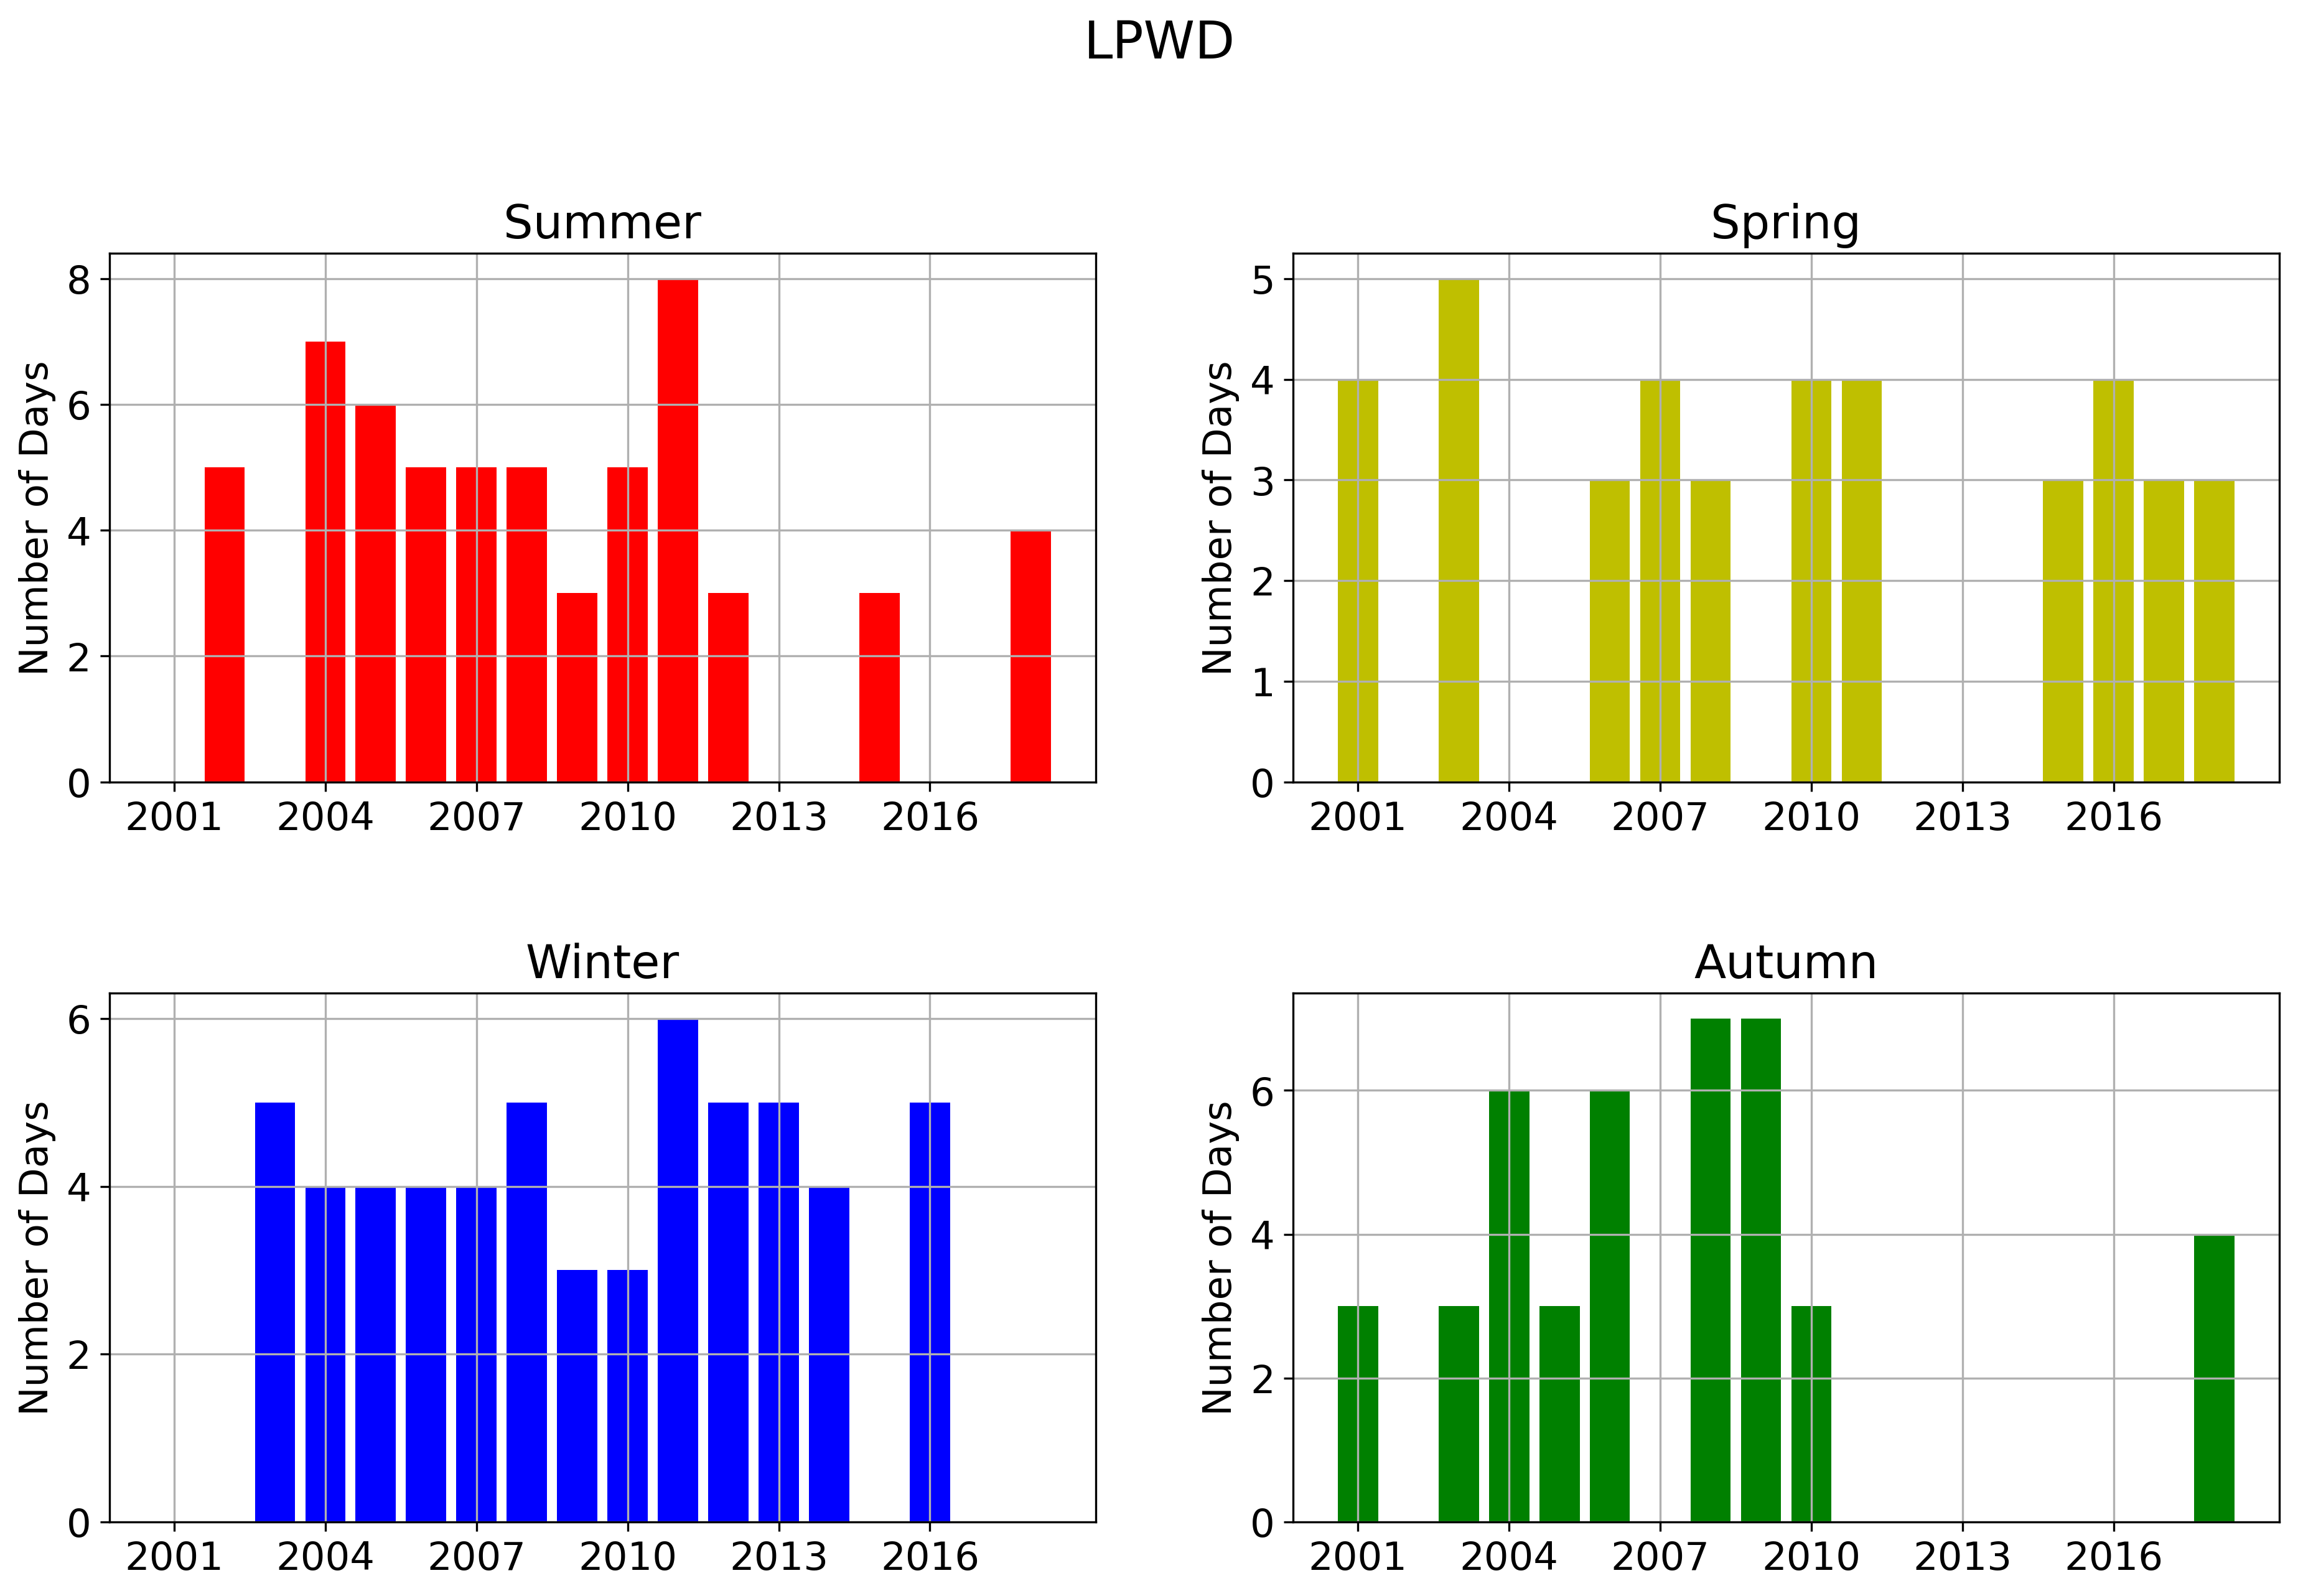

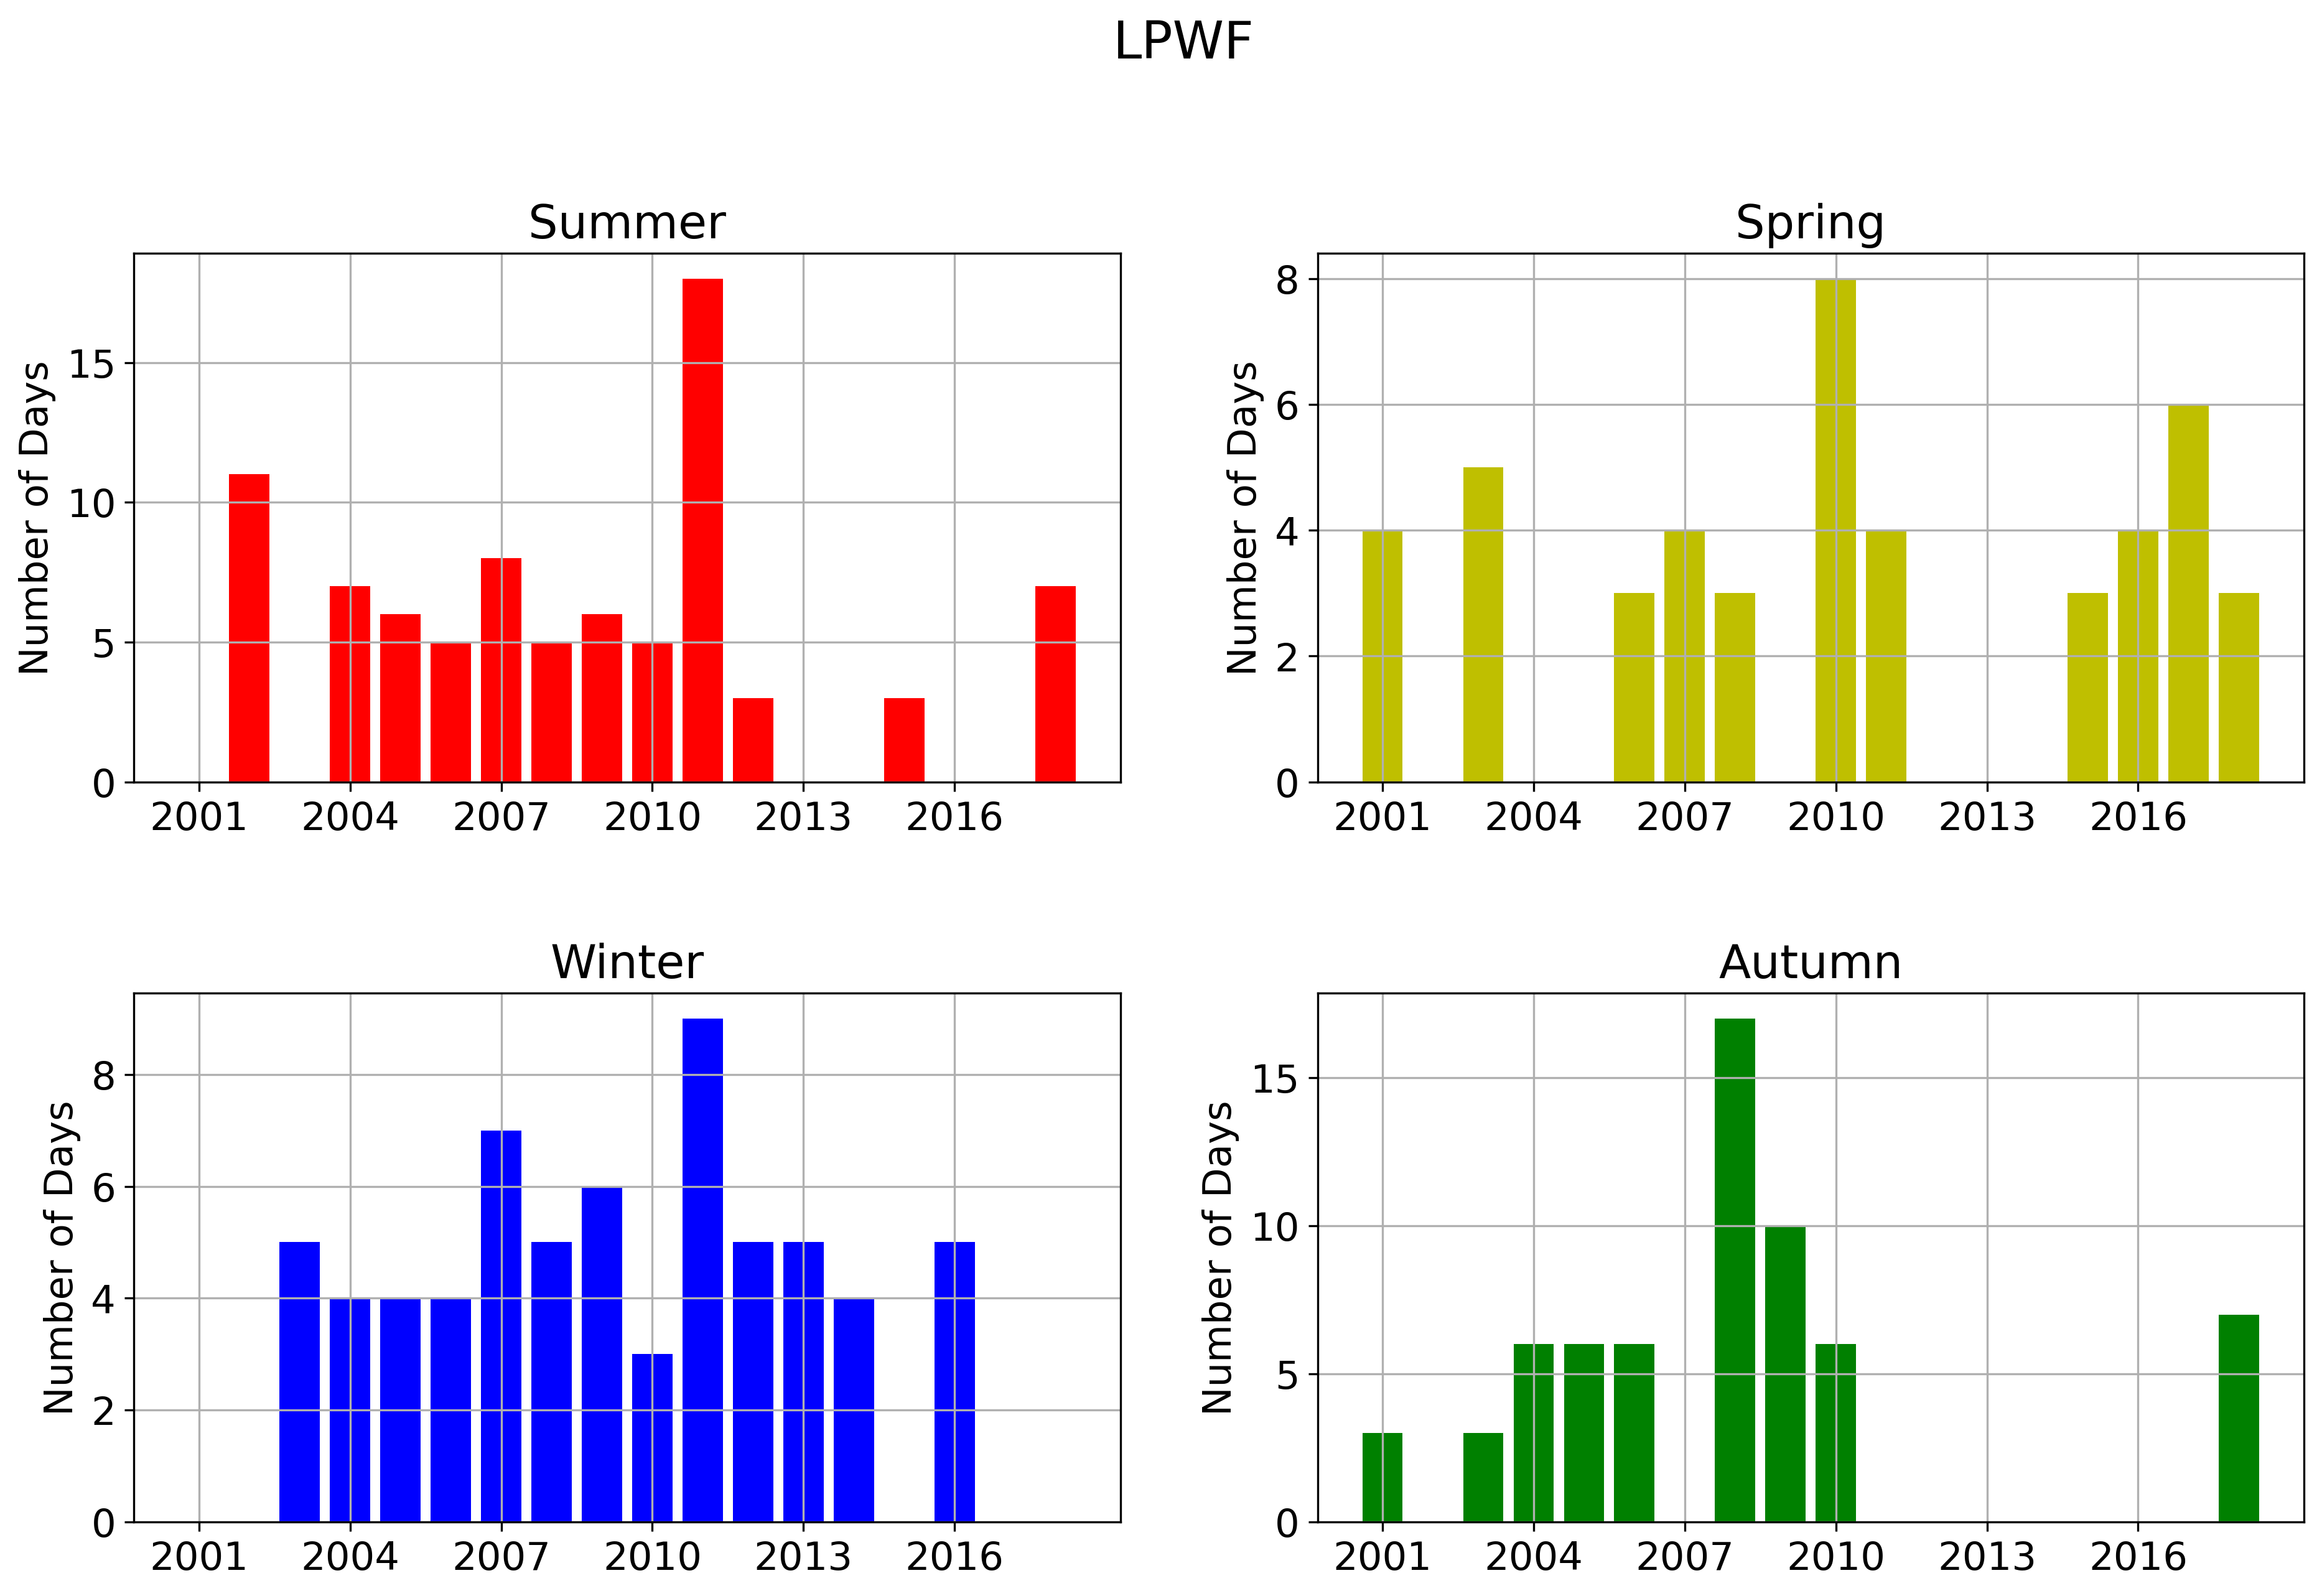

In [ ]:
#seasonal metrics
seasonal_metrics = tex.wave_seasonMetrics(database,'LPW',plot=True)

### **High Pressure Wave**

In [ ]:
help(tex.check_HighPressureWave)

Help on function check_HighPressureWave in module climatex:

check_HighPressureWave(database, db_columnMAX, db_columnMIN, climatic_normal, pct_columnMAX, pct_columnMIN, db_columnDay365=False, db_complete=False, cn_columnDay365=False, df_pct=None, percentile_value=0.9, window_size=15)
    #-------------------------------------------------------------------------------
    ## Checks for High Pressure Waves on the database according to the Climatic Normal 
    ##
    ## This function is inspired in Geirinhas et al. 2018 method for thermal waves and adapted
    ## for pressure waves. It obtains first a dataframe with the percentiles computed from
    ## the Climatic Normal according to the defined window size (df_pct). Then compares
    ## it with the database, to check if the maximum and minimum values of pressure are
    ## above the corresponding percentile. If they are above the threshold, the column
    ## 'above_pct' receives 1. This column is then used to identify if there are 3 or 

In [ ]:
#get dataframe with columns 'above_pct' and 'HPW' indicating the occurence of a high pressure wave
#and the dataframe with the 90th percentile for pressure
database,df_pct = tex.check_HighPressureWave(database,'AVGPRESSURE','AVGPRESSURE',climatic_normal,'AVGPRESSURE','AVGPRESSURE')

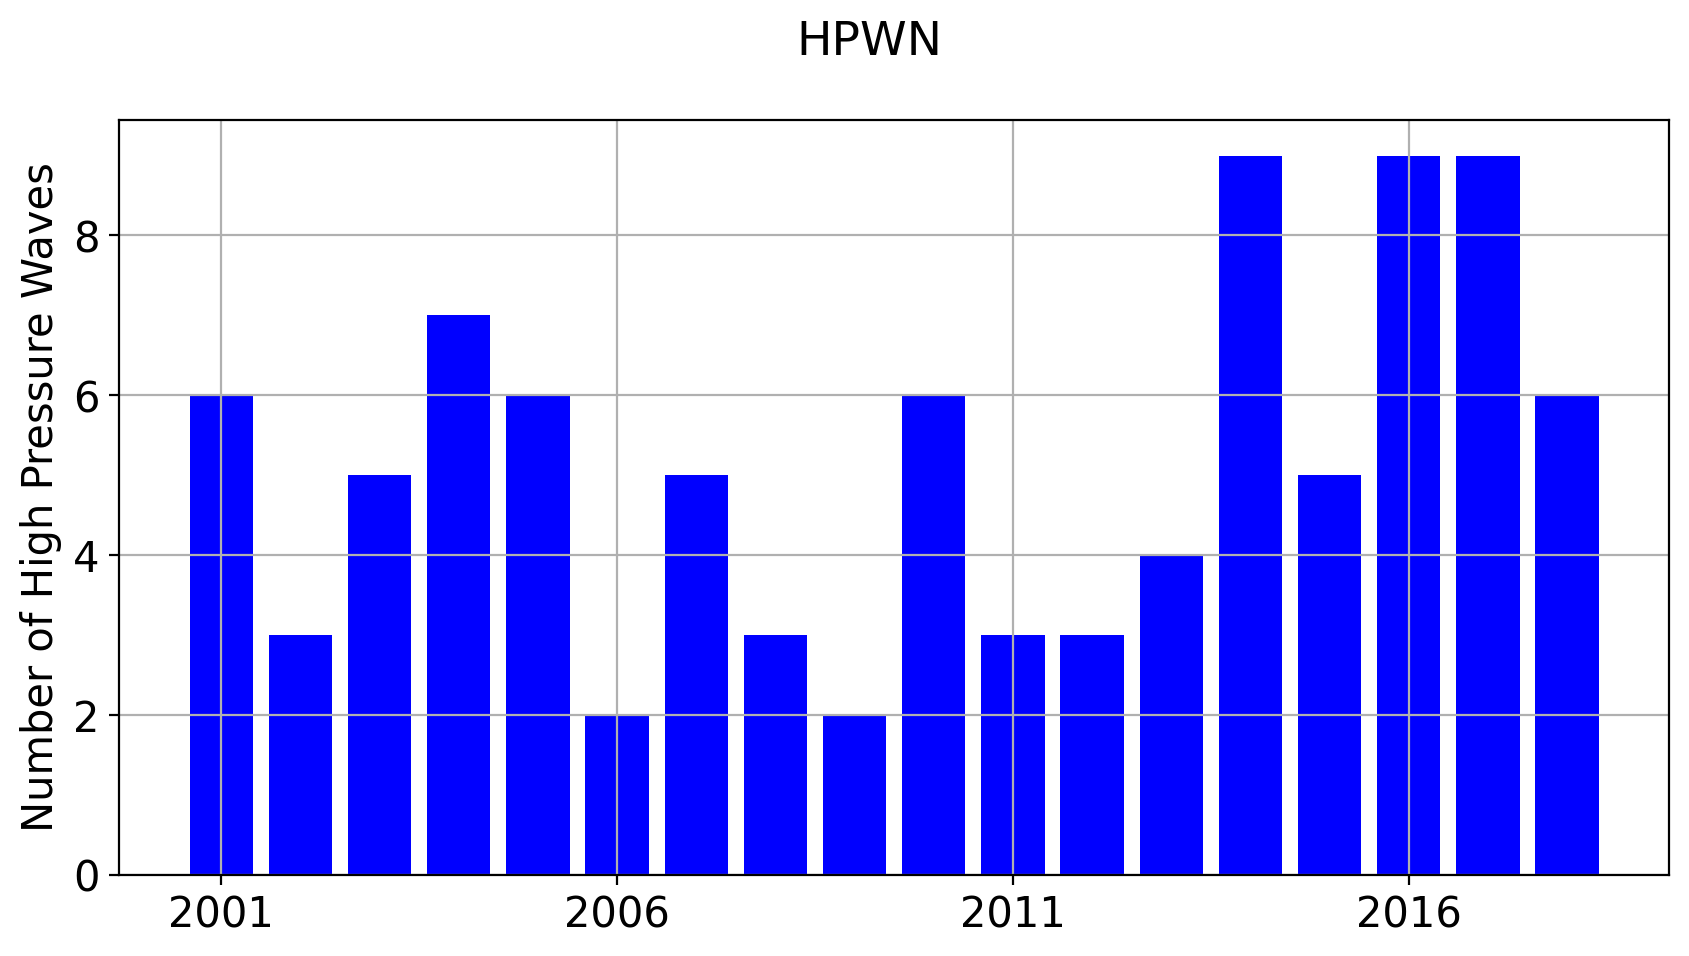

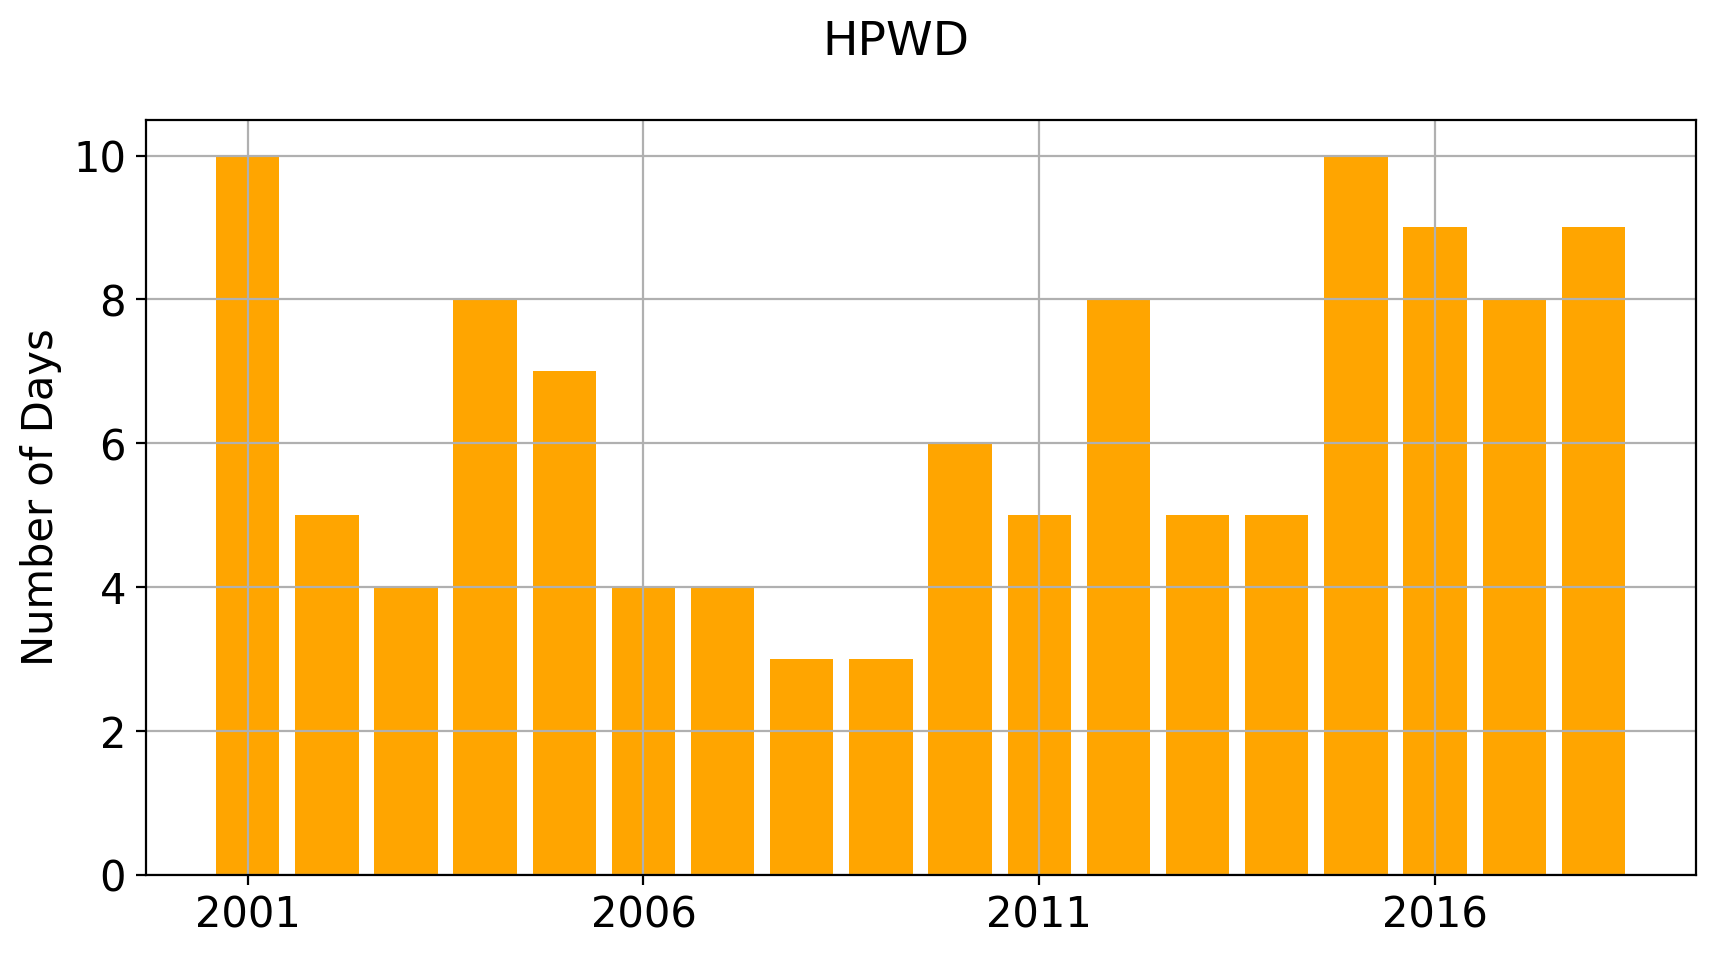

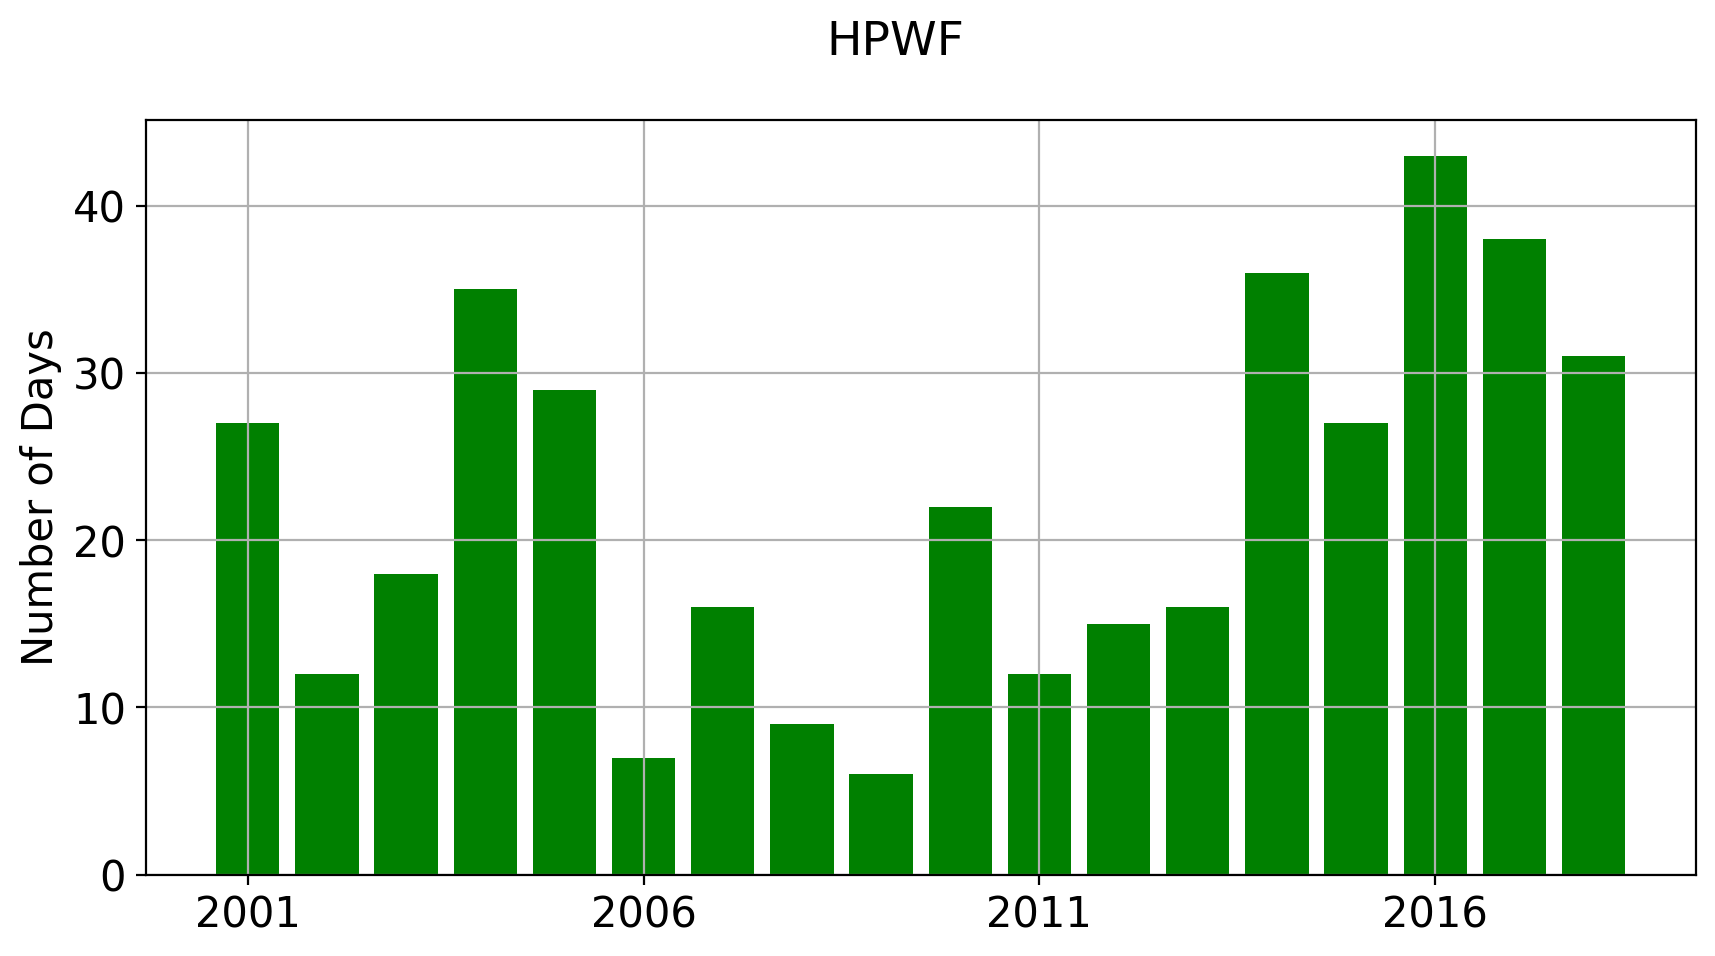

In [ ]:
#metrics
metrics = tex.wave_metrics(database,'HPW',True)

In [ ]:
#number of events
print("Number of events:", int(metrics['HPWN'].sum()))
#total of days under extreme event
print("Number of events:", int(metrics['HPWF'].sum()))
#longest event
print("Number of events:", int(metrics['HPWD'].max()))

Number of events: 93
Number of events: 399
Number of events: 10


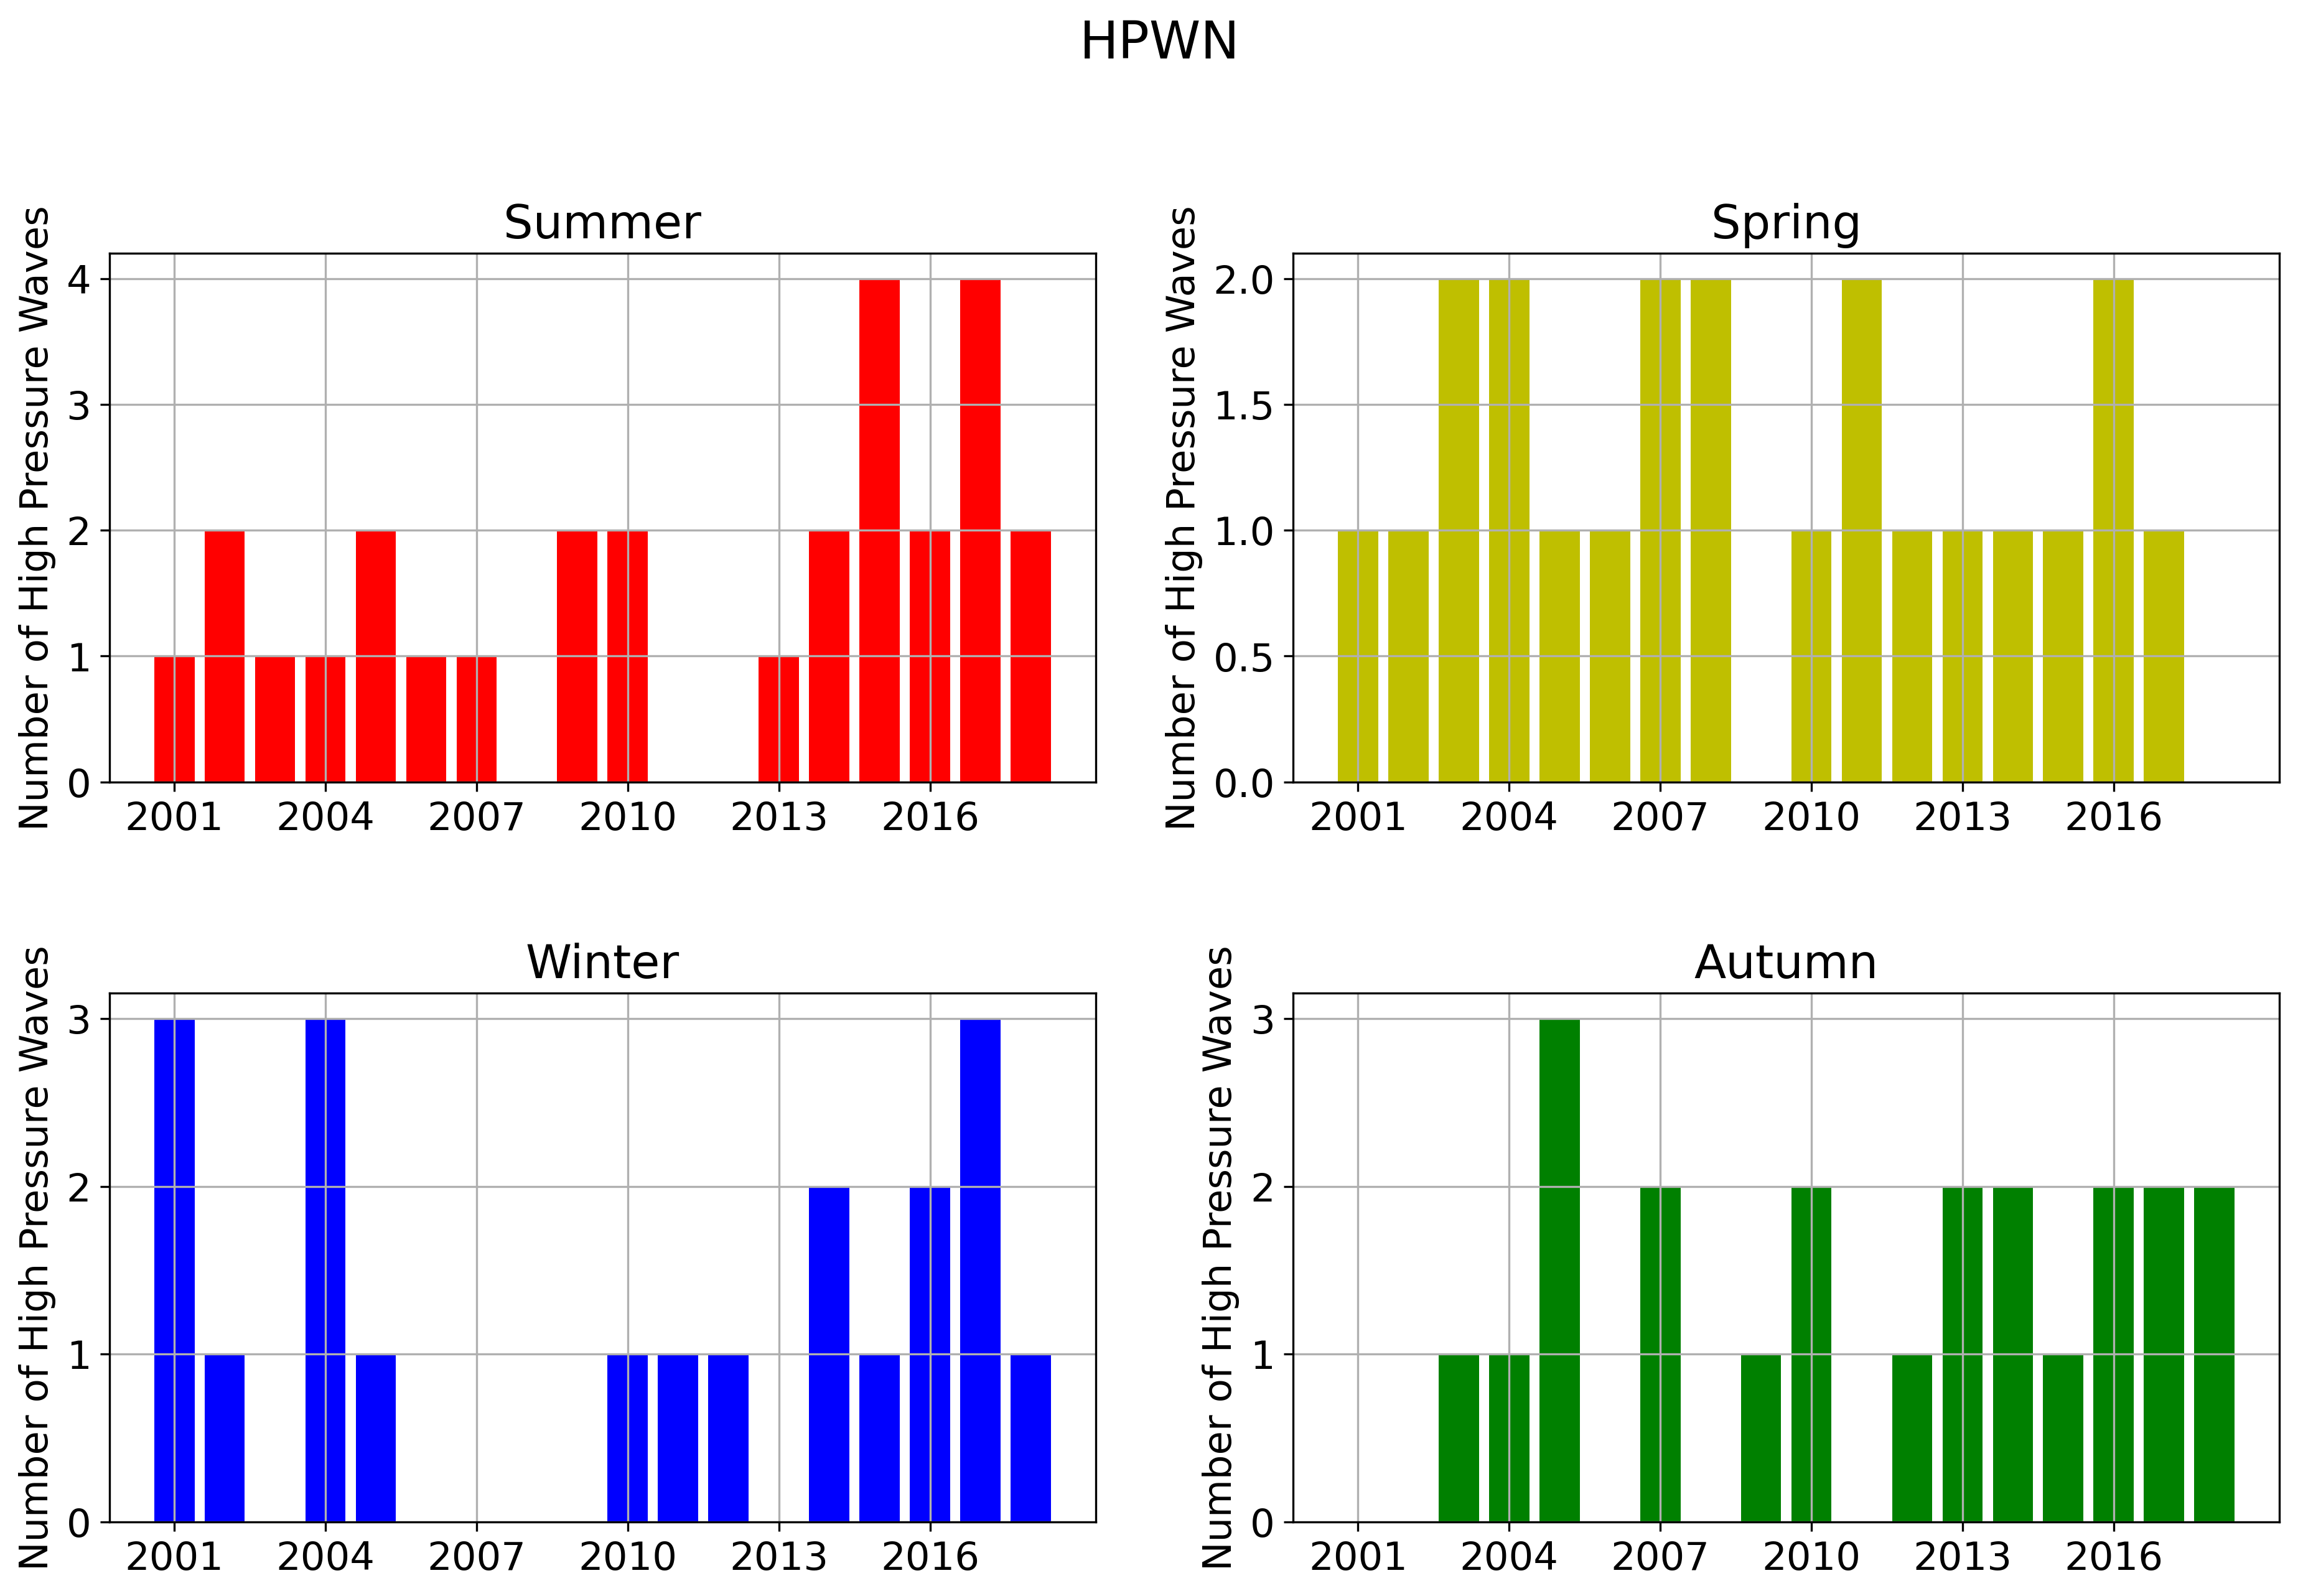

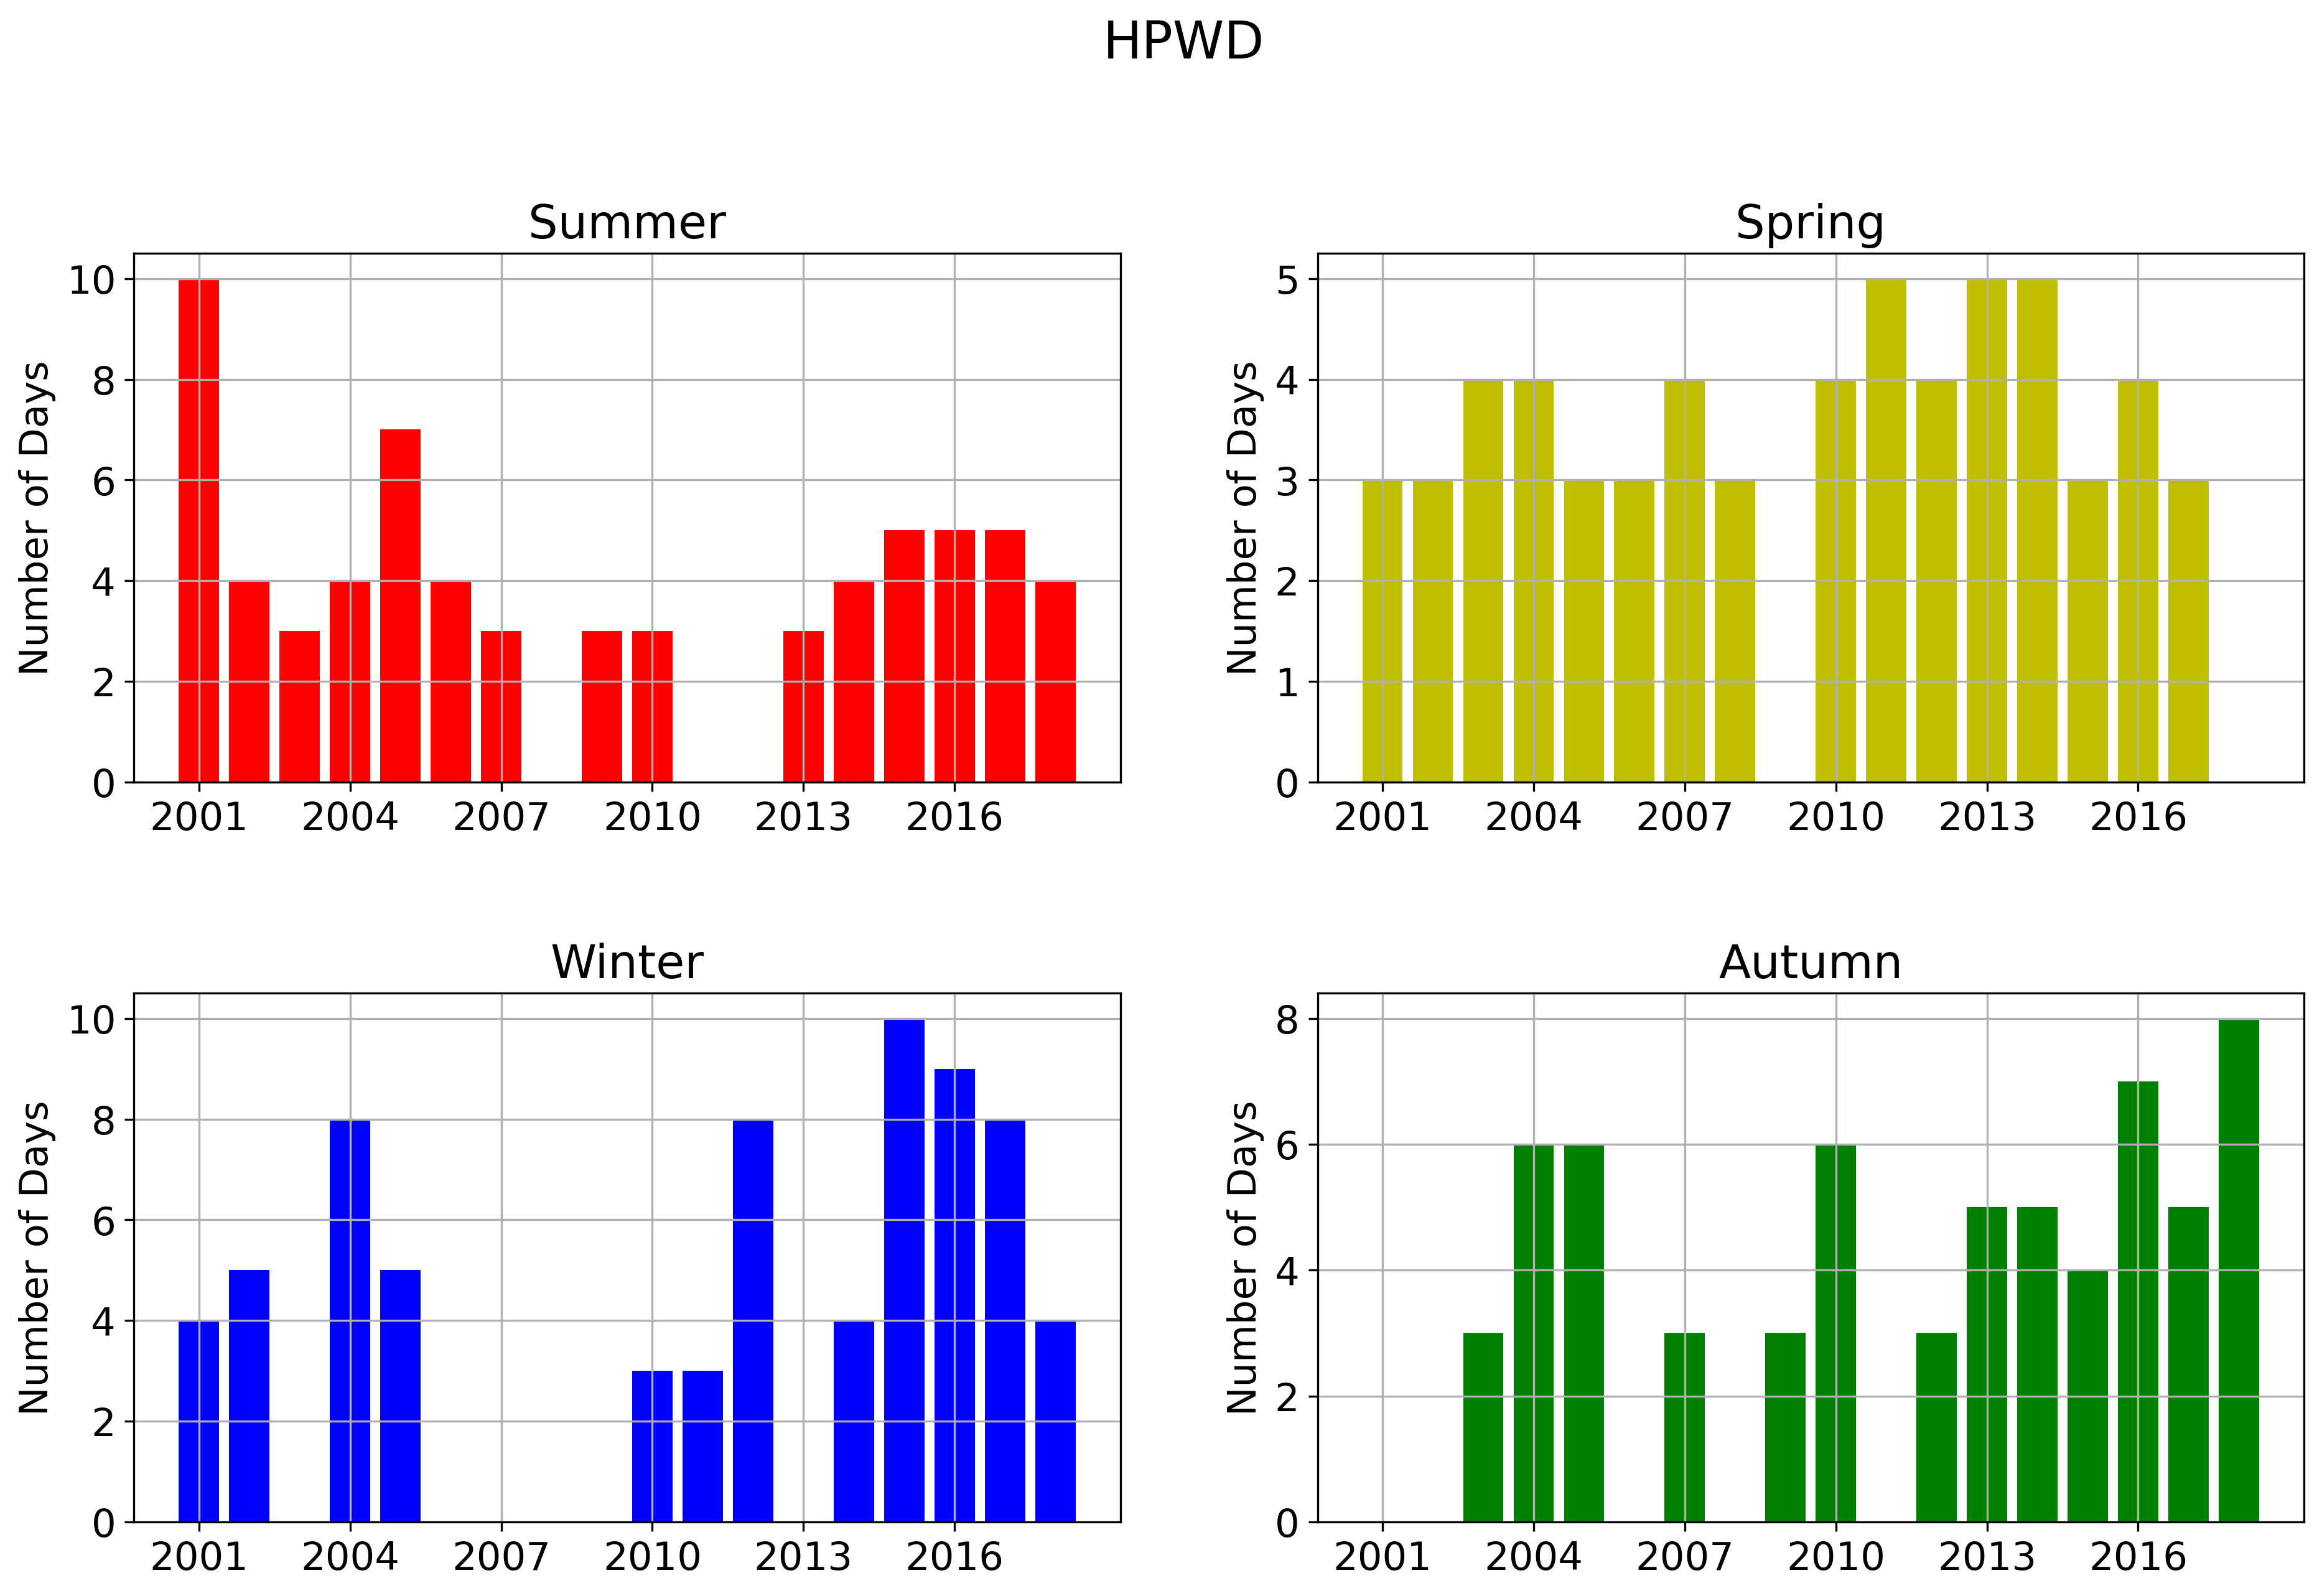

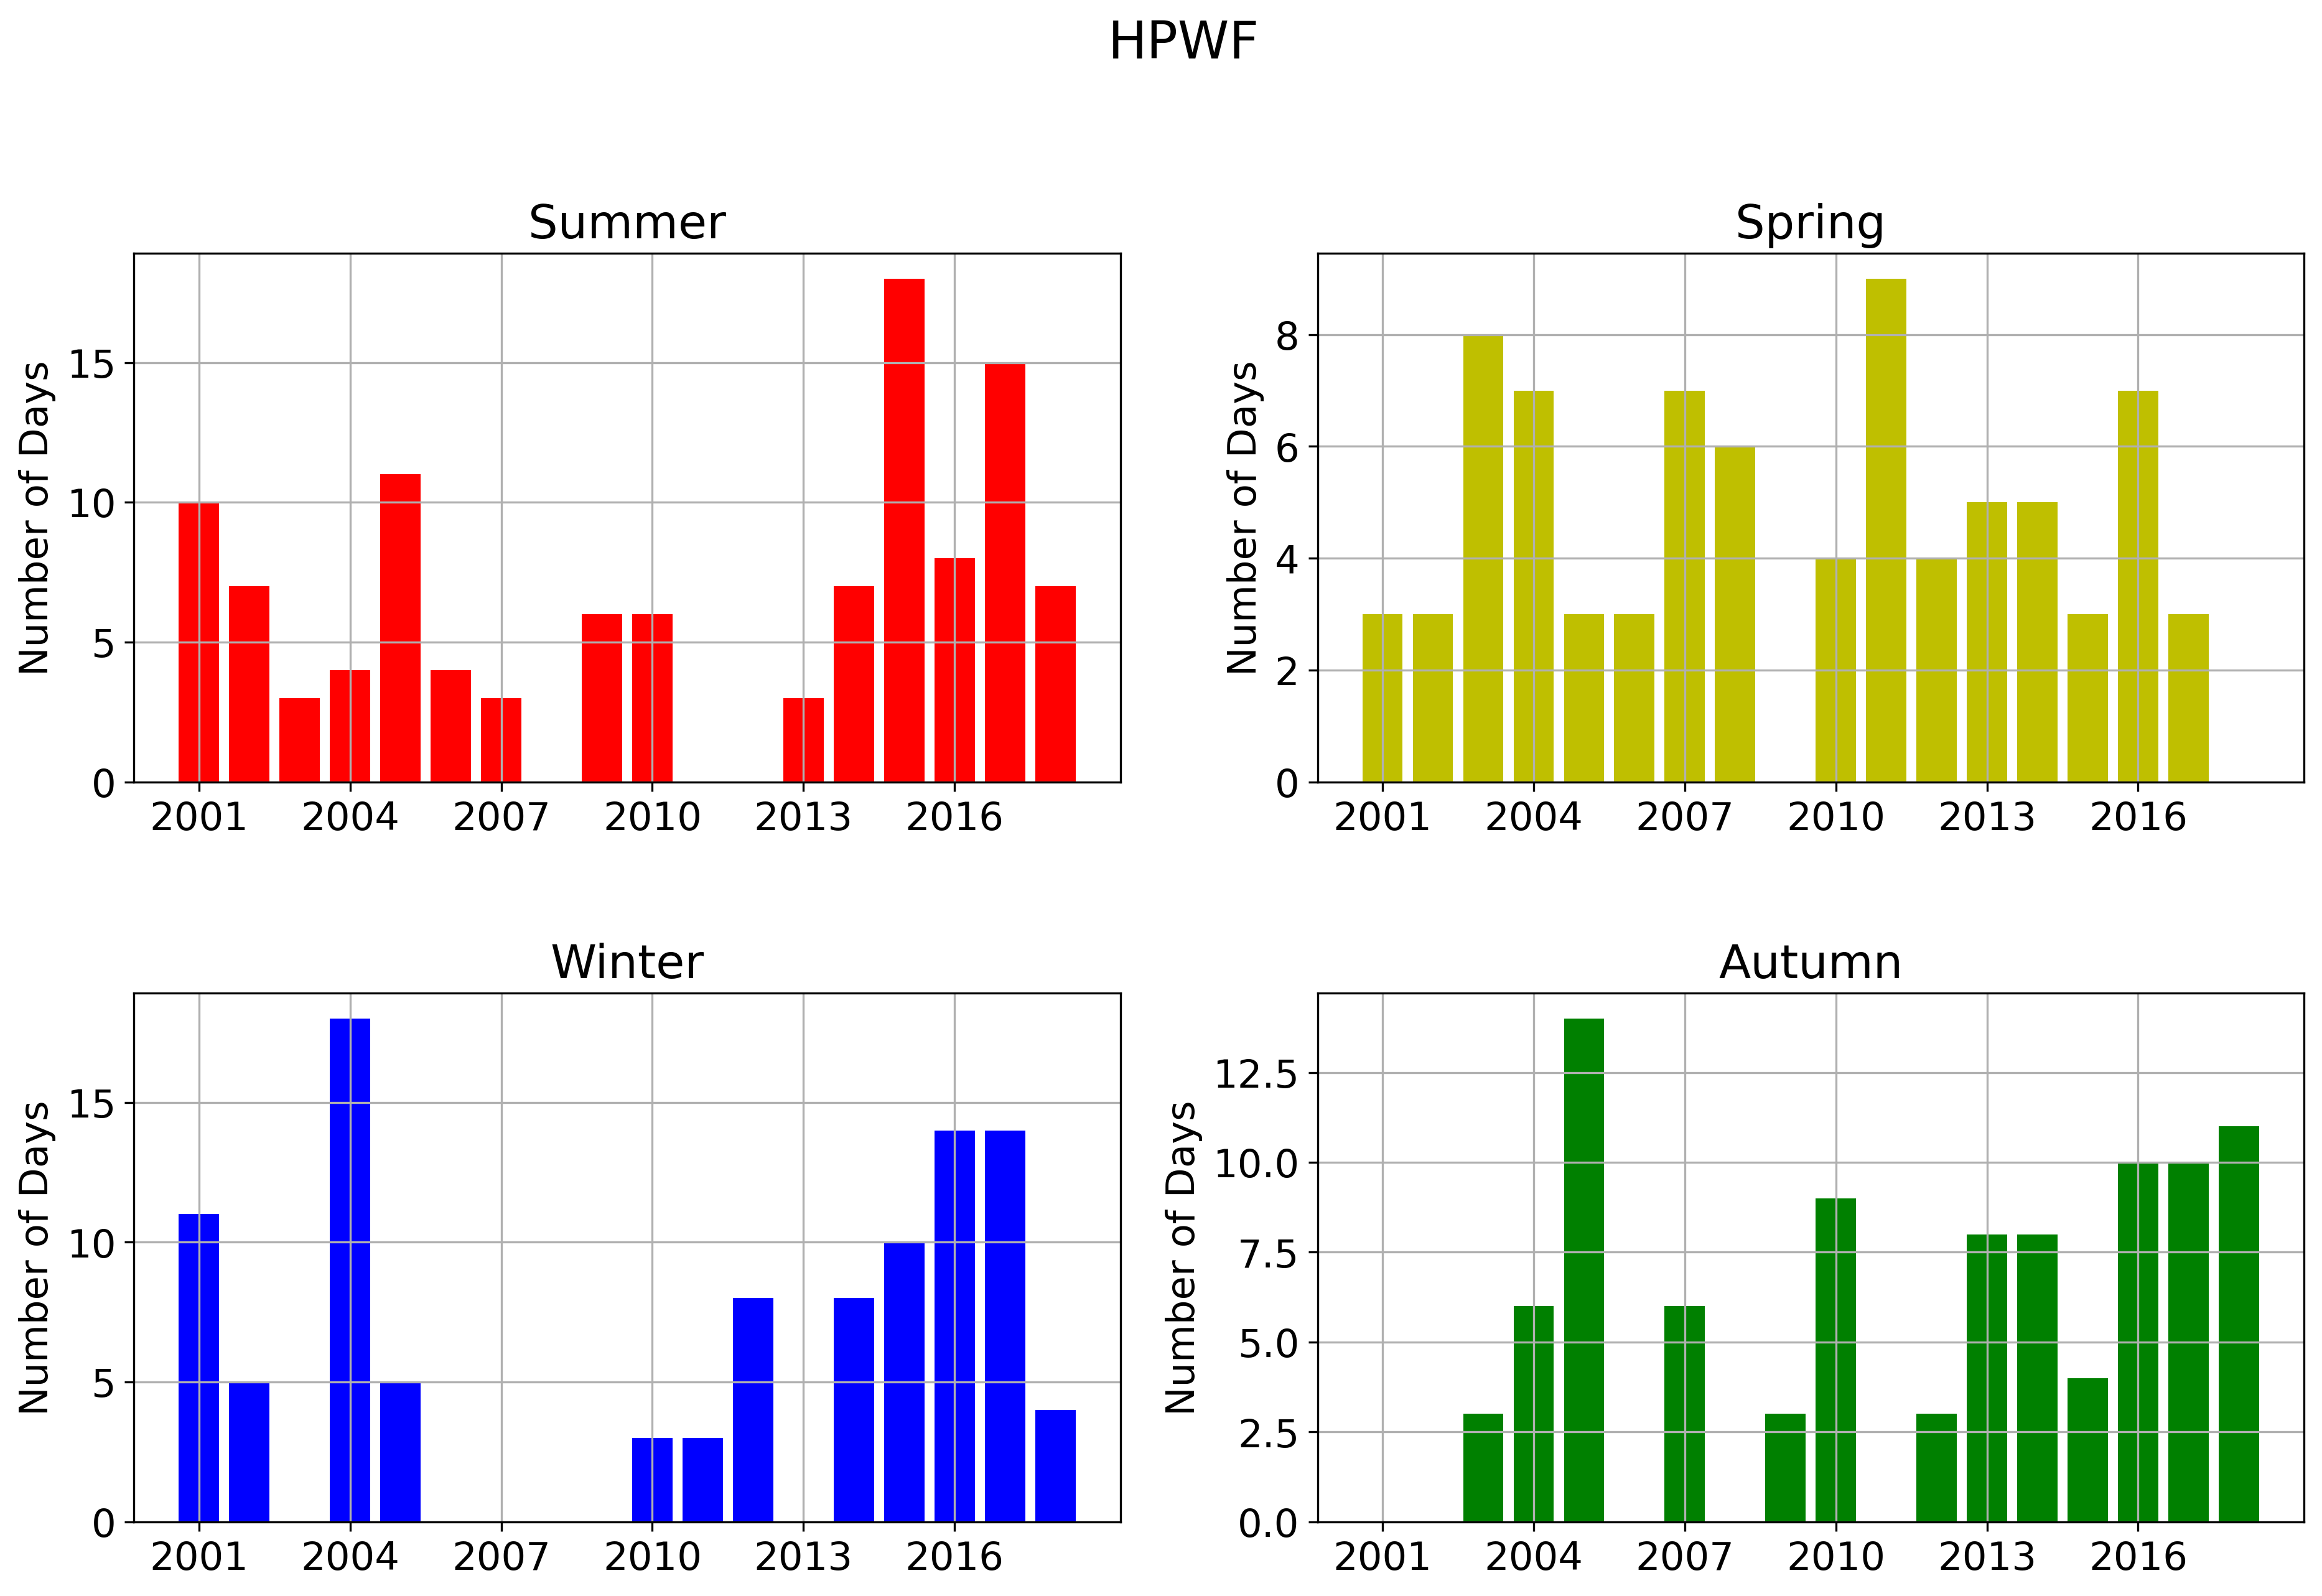

In [ ]:
#seasonal metrics
seasonal_metrics = tex.wave_seasonMetrics(database,'HPW',True)

### **Extreme pressure difference between days**


In [ ]:
help(tex.check_Pressure_difdays)

Help on function check_Pressure_difdays in module climatex:

check_Pressure_difdays(database, db_columnMAX, db_columnMIN, climatic_normal, pct_columnMAX, pct_columnMIN, db_columnDay365=False, db_complete=False, cn_columnDay365=False, df_pct=None, percentile_value=0.9, window_size=15)
    #-------------------------------------------------------------------------------
    ## Checks for subsequent days with a high difference of pressure according to the Climatic Normal
    ##
    ## It first creates columns for the absolute value of difference between maximum
    ## pressure (Dif_max) between two subsequent days and for the difference between minimum
    ## pressure (Dif_min) between two subsequent days in the databate and in the Climatic normal.
    ## It then creates a column 'control' that is equal 1 when dif_max and dif_min have the
    ## same sign (or both positive or both negative).
    ## Then it obtains a  dataframe with the percentiles computed from the
    ## Climatic Normal a

In [ ]:
#get dataframe with columns 'above_pct_dif' indicating the occurence of a event
#and the dataframe with the 90th percentile for maximum and minimum pressure difference
database, df_pct = tex.check_Pressure_difdays(database,'AVGPRESSURE','AVGPRESSURE',climatic_normal,'AVGPRESSURE','AVGPRESSURE')

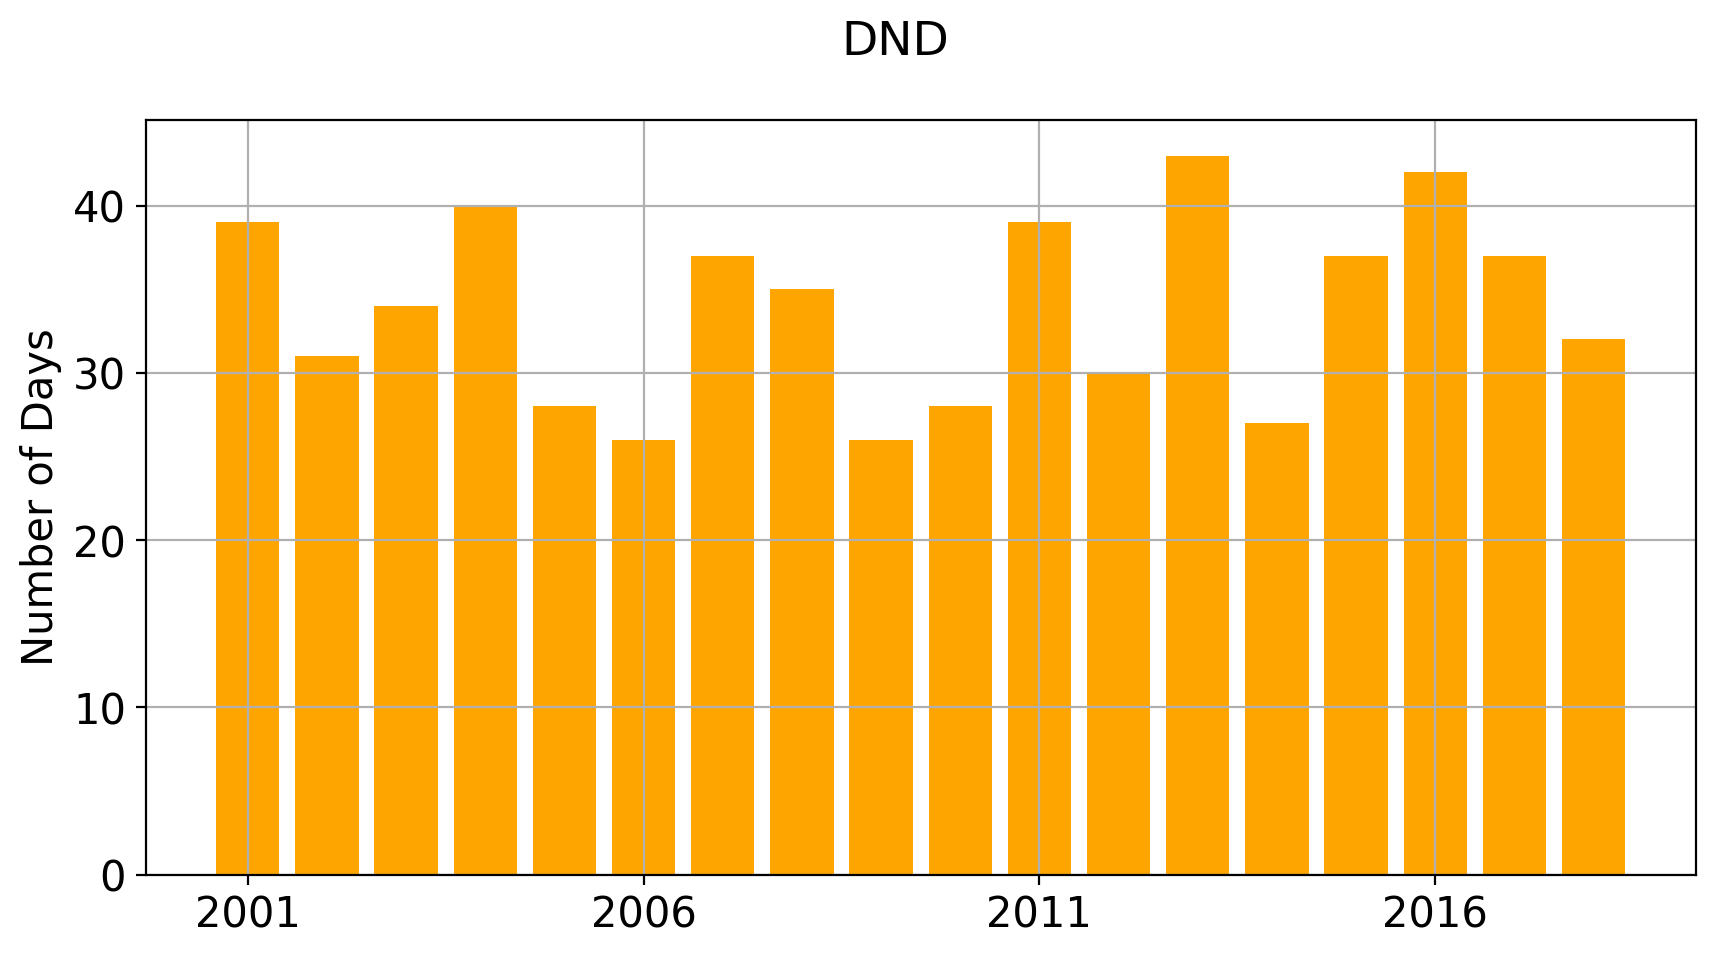

In [ ]:
#metrics
metrics = tex.dif_metrics(database,True)

In [ ]:
#number of events
print("Number of events:", int(metrics.sum()))

Number of events: 611


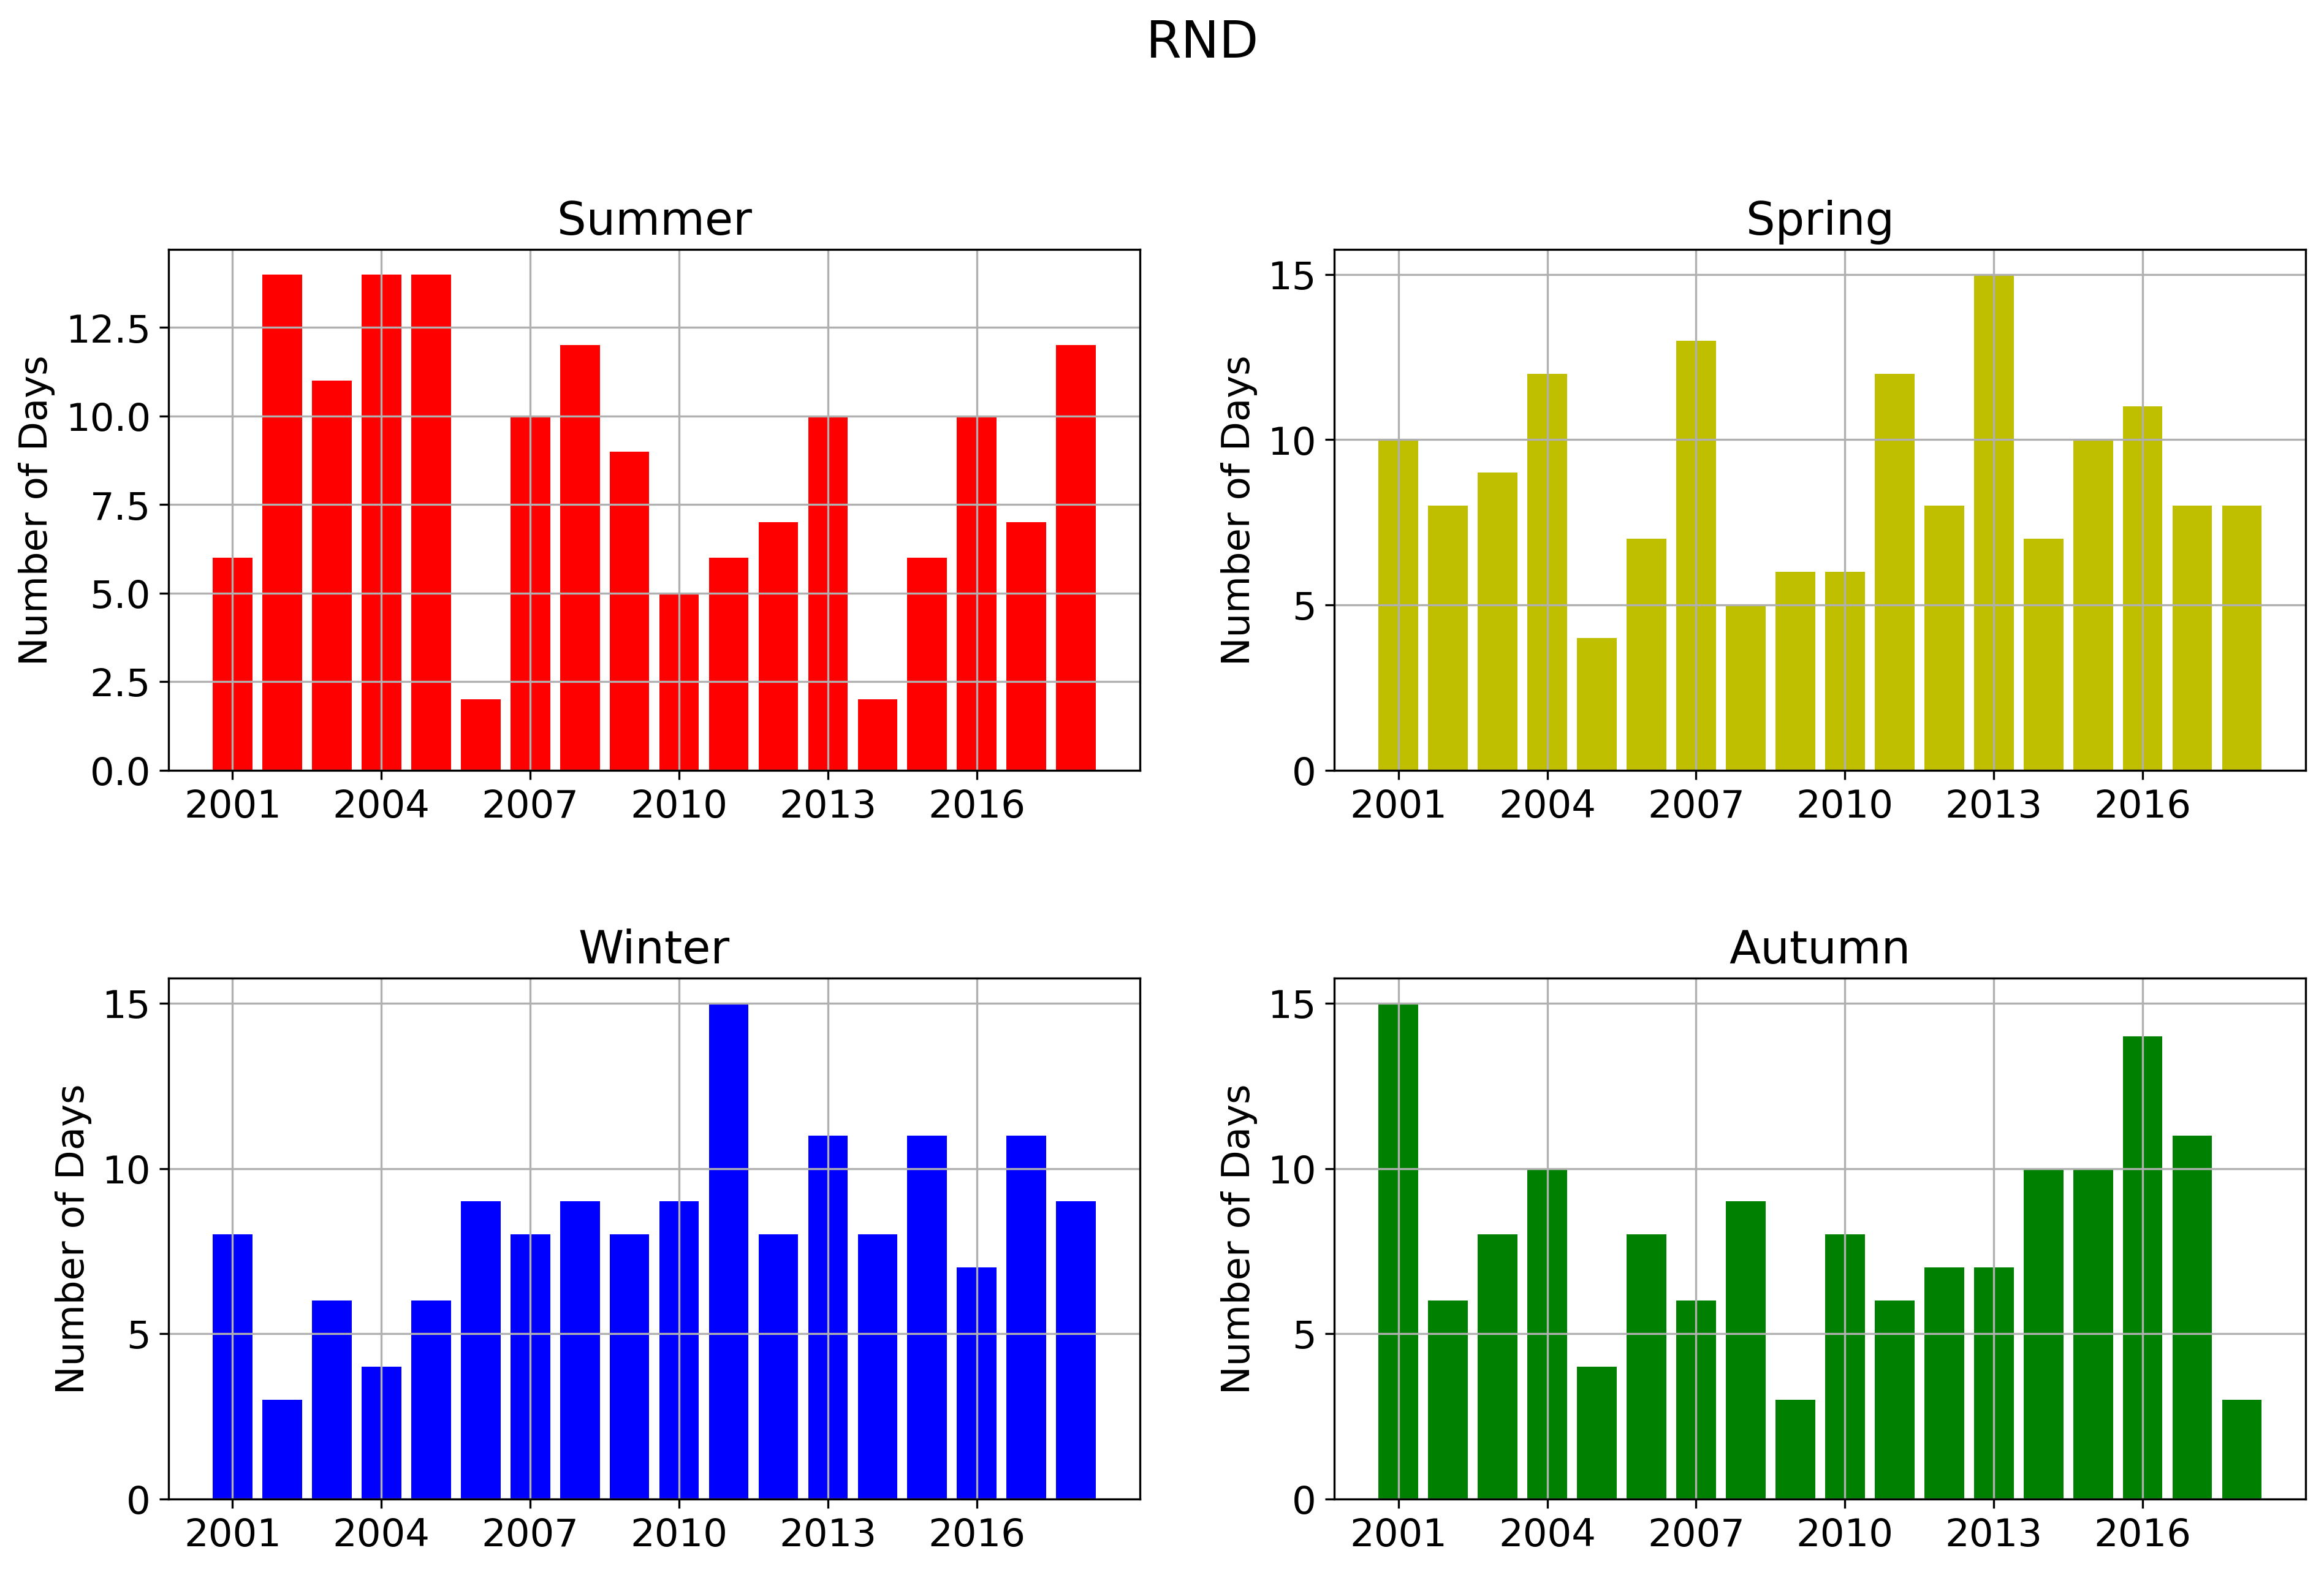

In [ ]:
#seasonal metrics
seasonal_metrics = tex.dif_seasonMetrics(database,True)

## **Humidity**
 

### **Low humidity waves**



In [ ]:
help(tex.check_LowHumidityWave)

Help on function check_LowHumidityWave in module climatex:

check_LowHumidityWave(database, db_columnMAX, db_columnMIN, climatic_normal, pct_columnMAX, pct_columnMIN, db_columnDay365=False, db_complete=False, cn_columnDay365=False, df_pct=None, percentile_value=0.1, window_size=15)
    #-------------------------------------------------------------------------------
    ## Checks for Low Humidity Waves on the database according to the Climatic Normal
    ##
    ## ## This function is inspired in Geirinhas et al. 2018 method for thermal waves and adapted
    ## for humidity waves. It obtains first a dataframe with the percentiles 
    ## computed from the Climatic Normal according to the defined window size (df_pct).
    ## Then compares it with the database, to check if the maximum and minimum values
    ## of humidity are below the corresponding percentile. If they are below the threshold,
    ## the column 'below_pct' receives 1. This column is then used to identify if there
    ## ar

In [ ]:
#get dataframe with columns 'below_pct' and 'LHW' indicating the occurence of a low humidity wave
#and the dataframe with the 10th percentile for maximum and minimum humidity
database,df_pct = tex.check_LowHumidityWave(database,'HMAX','HMIN',climatic_normal,'HMAX','HMIN')

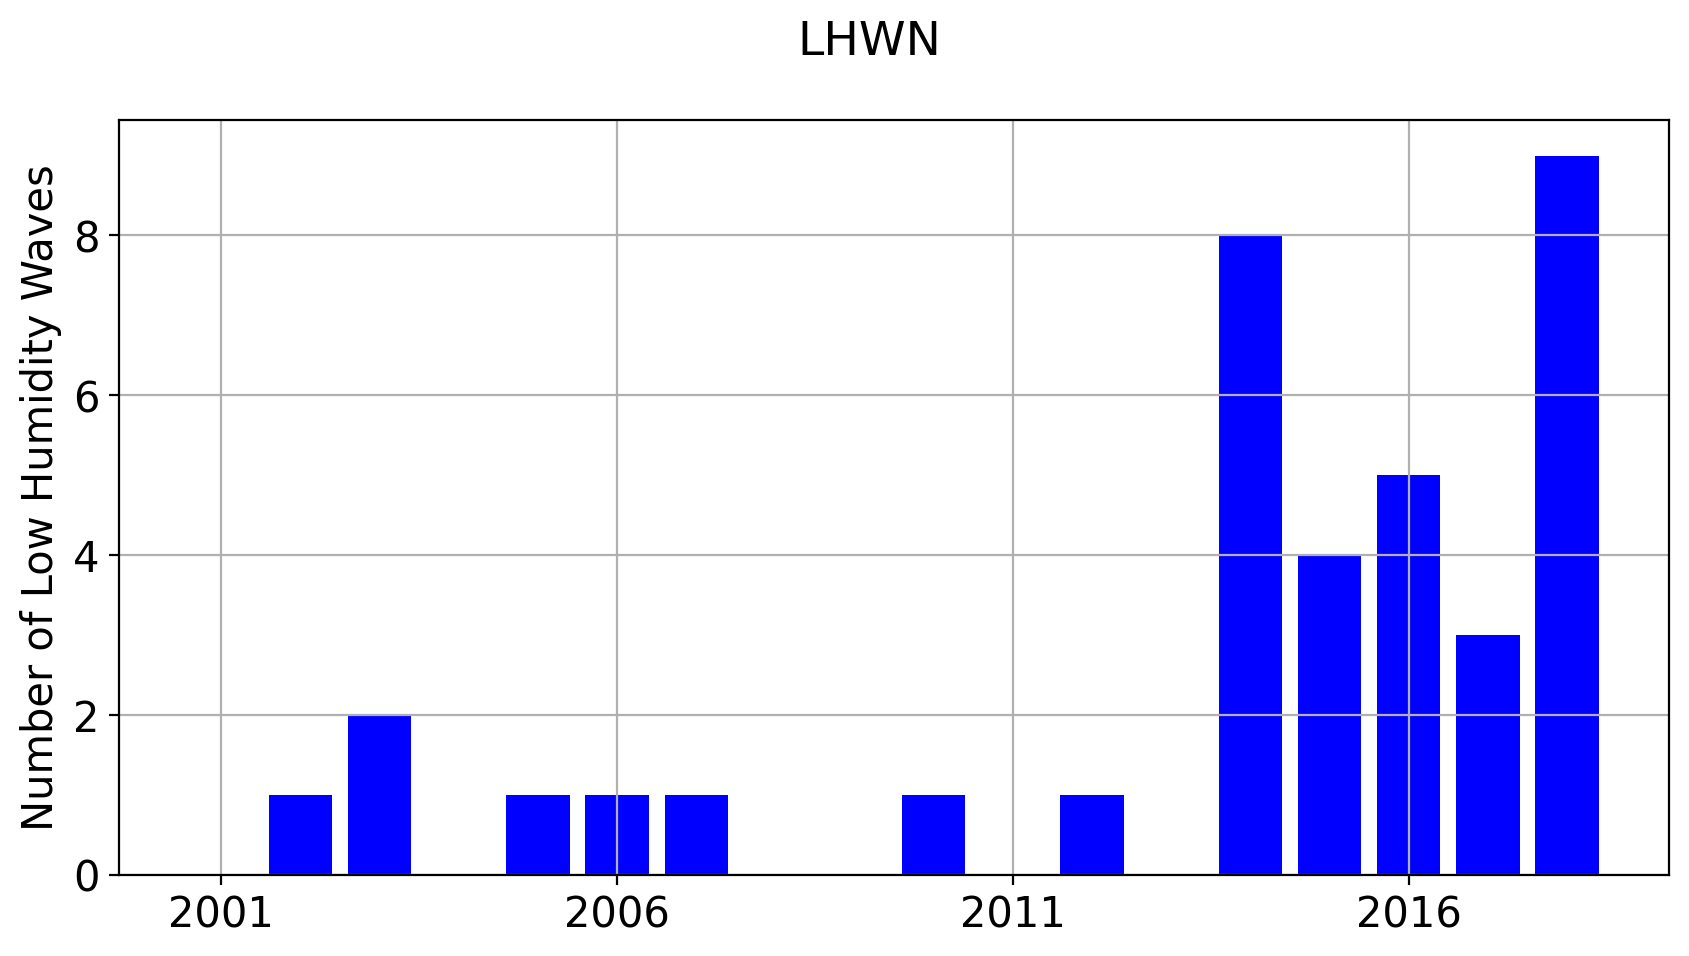

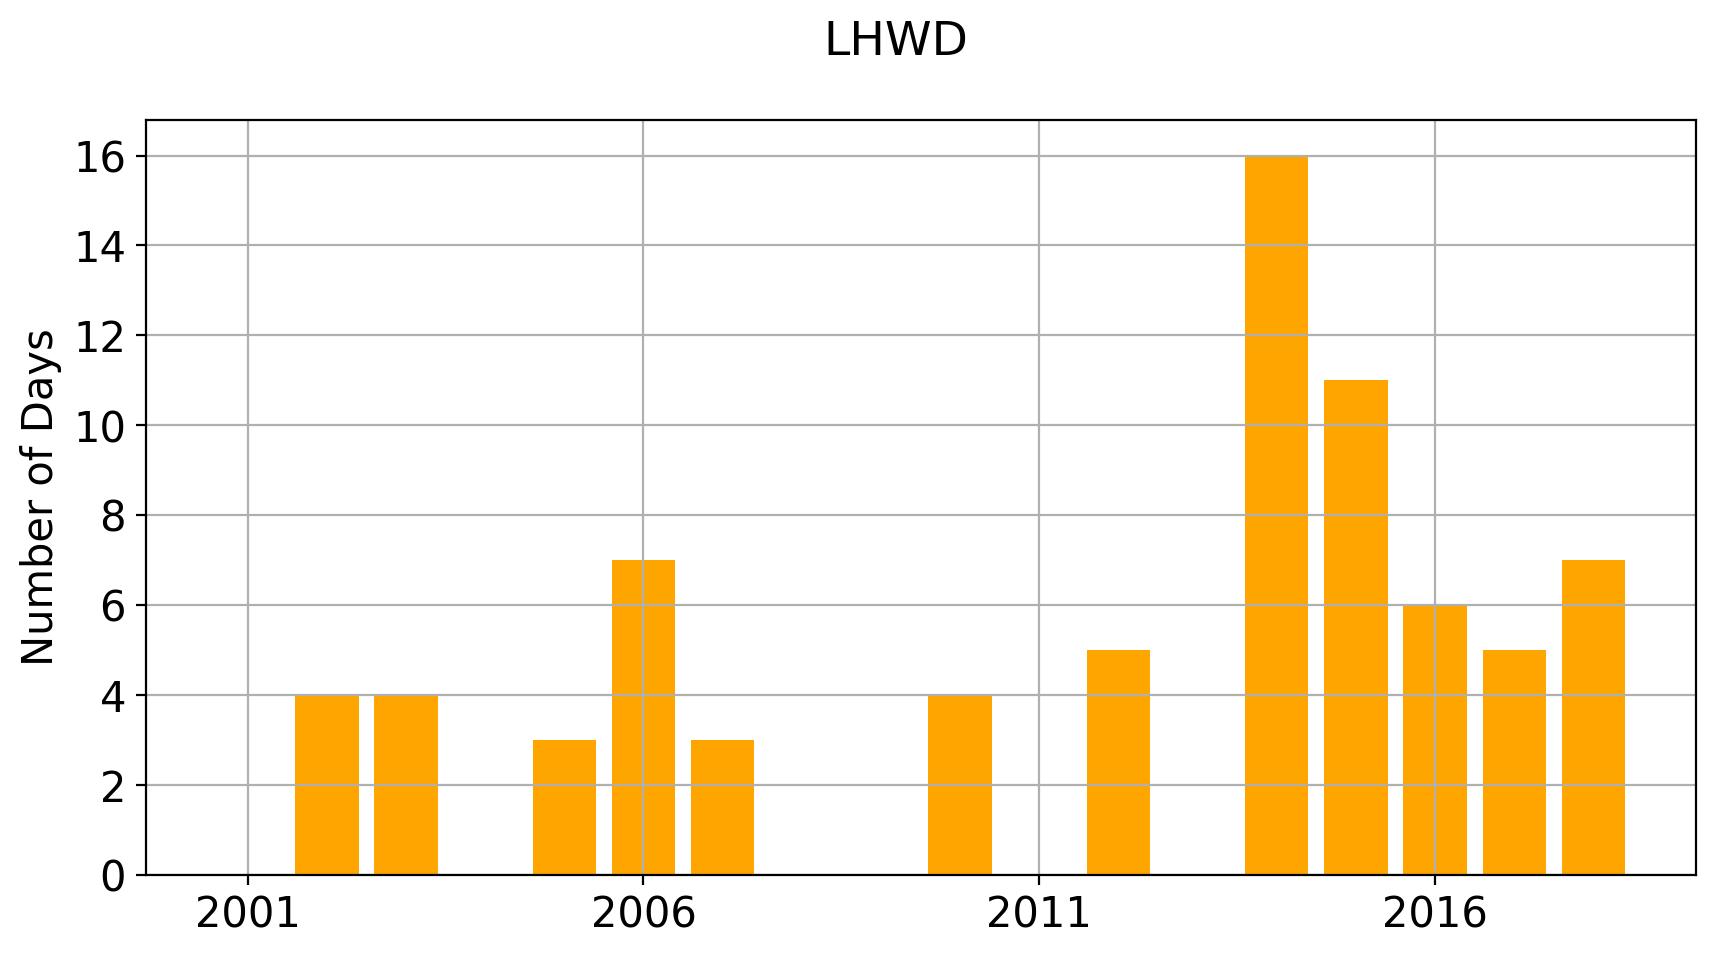

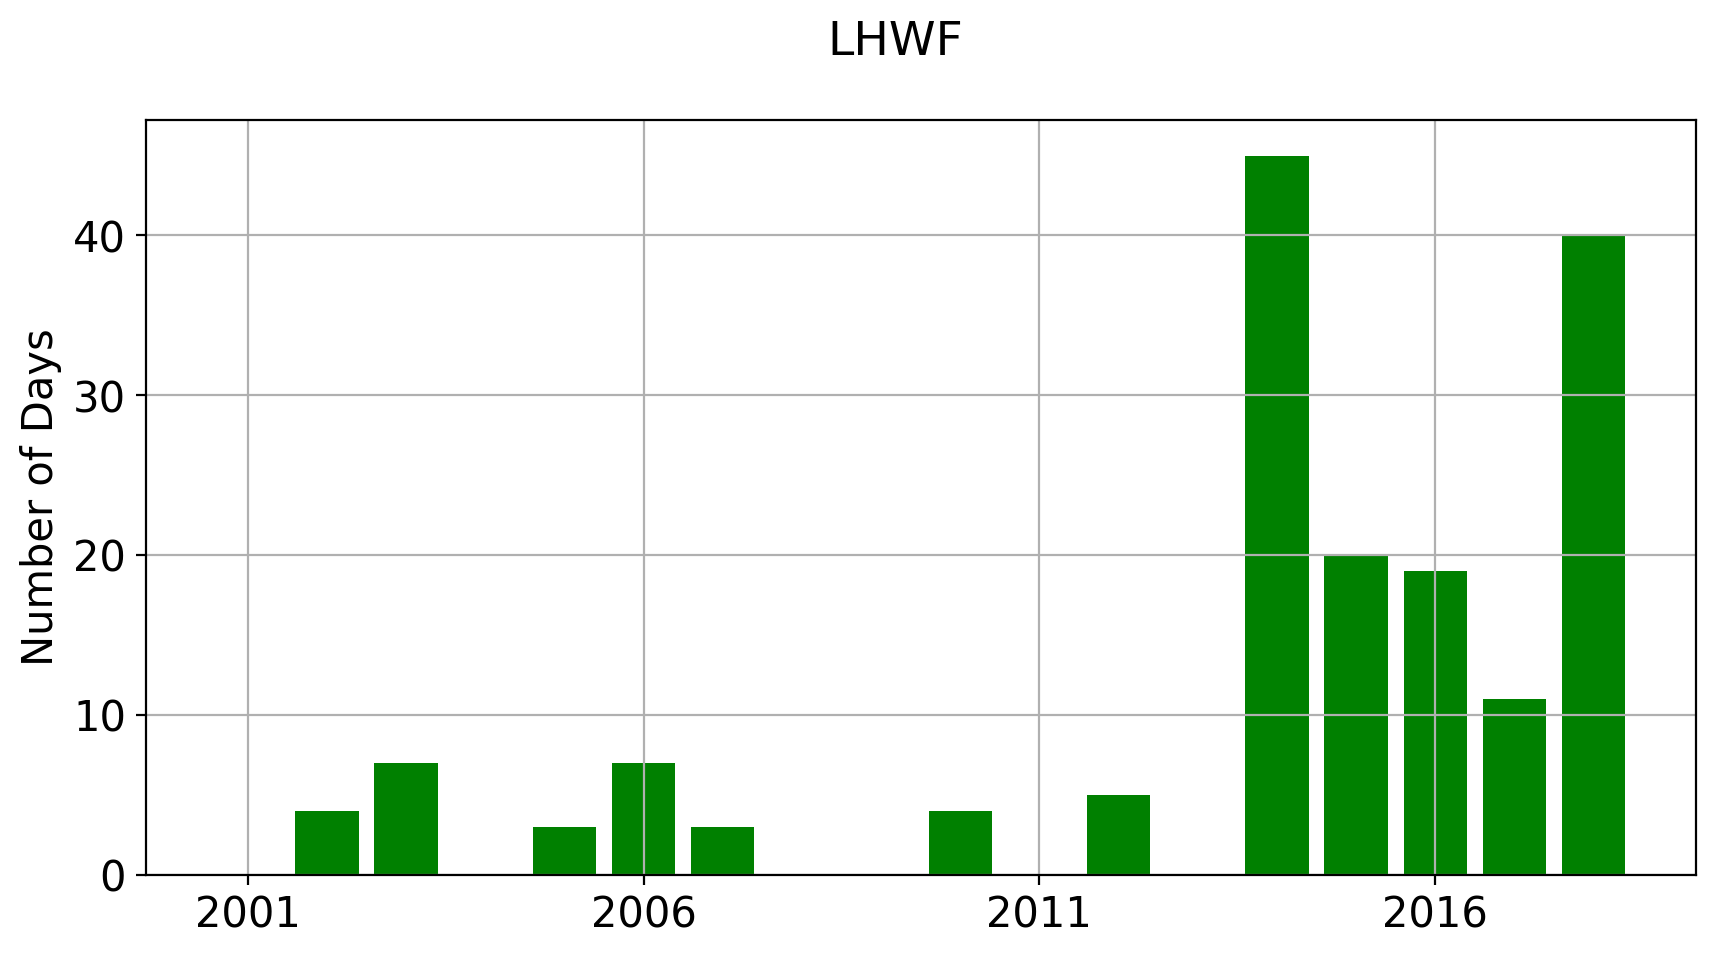

In [ ]:
#metrics
metrics = tex.wave_metrics(database,'LHW',True)

In [ ]:
#number of events
print("Number of events:", int(metrics['LHWN'].sum()))
#total of days under extreme event
print("Number of events:", int(metrics['LHWF'].sum()))
#longest event
print("Number of events:", int(metrics['LHWD'].max()))

Number of events: 37
Number of events: 168
Number of events: 16


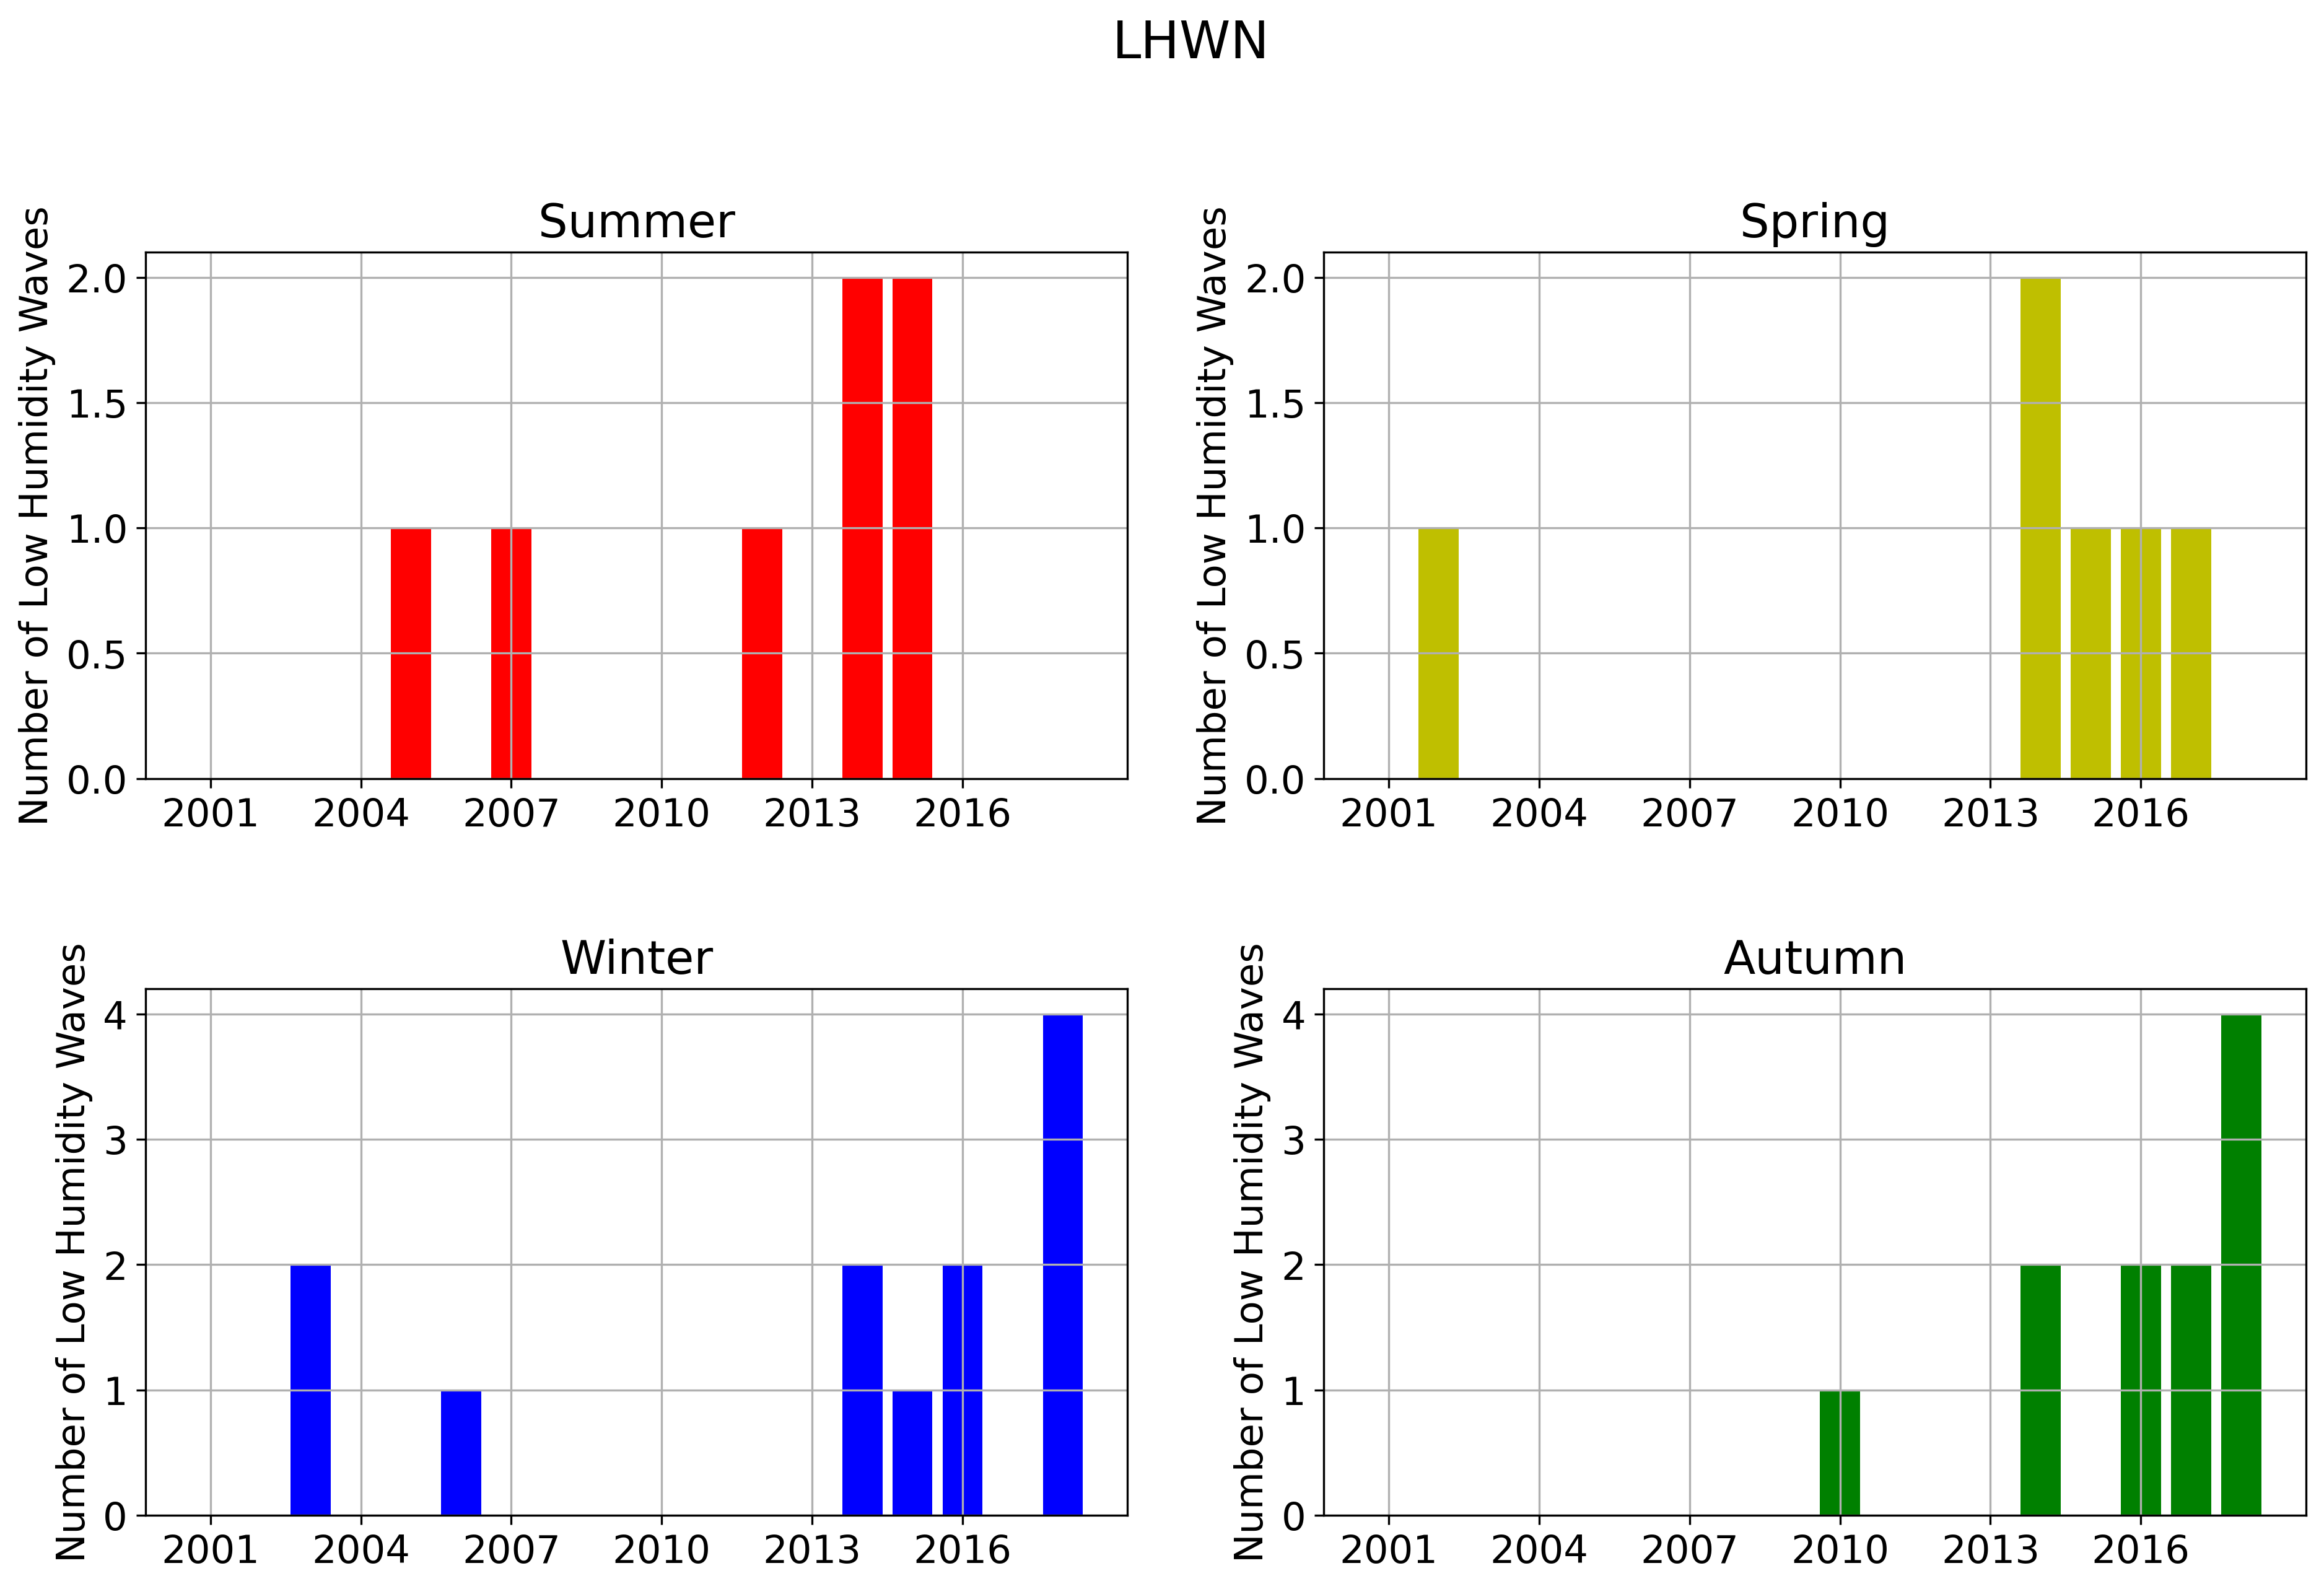

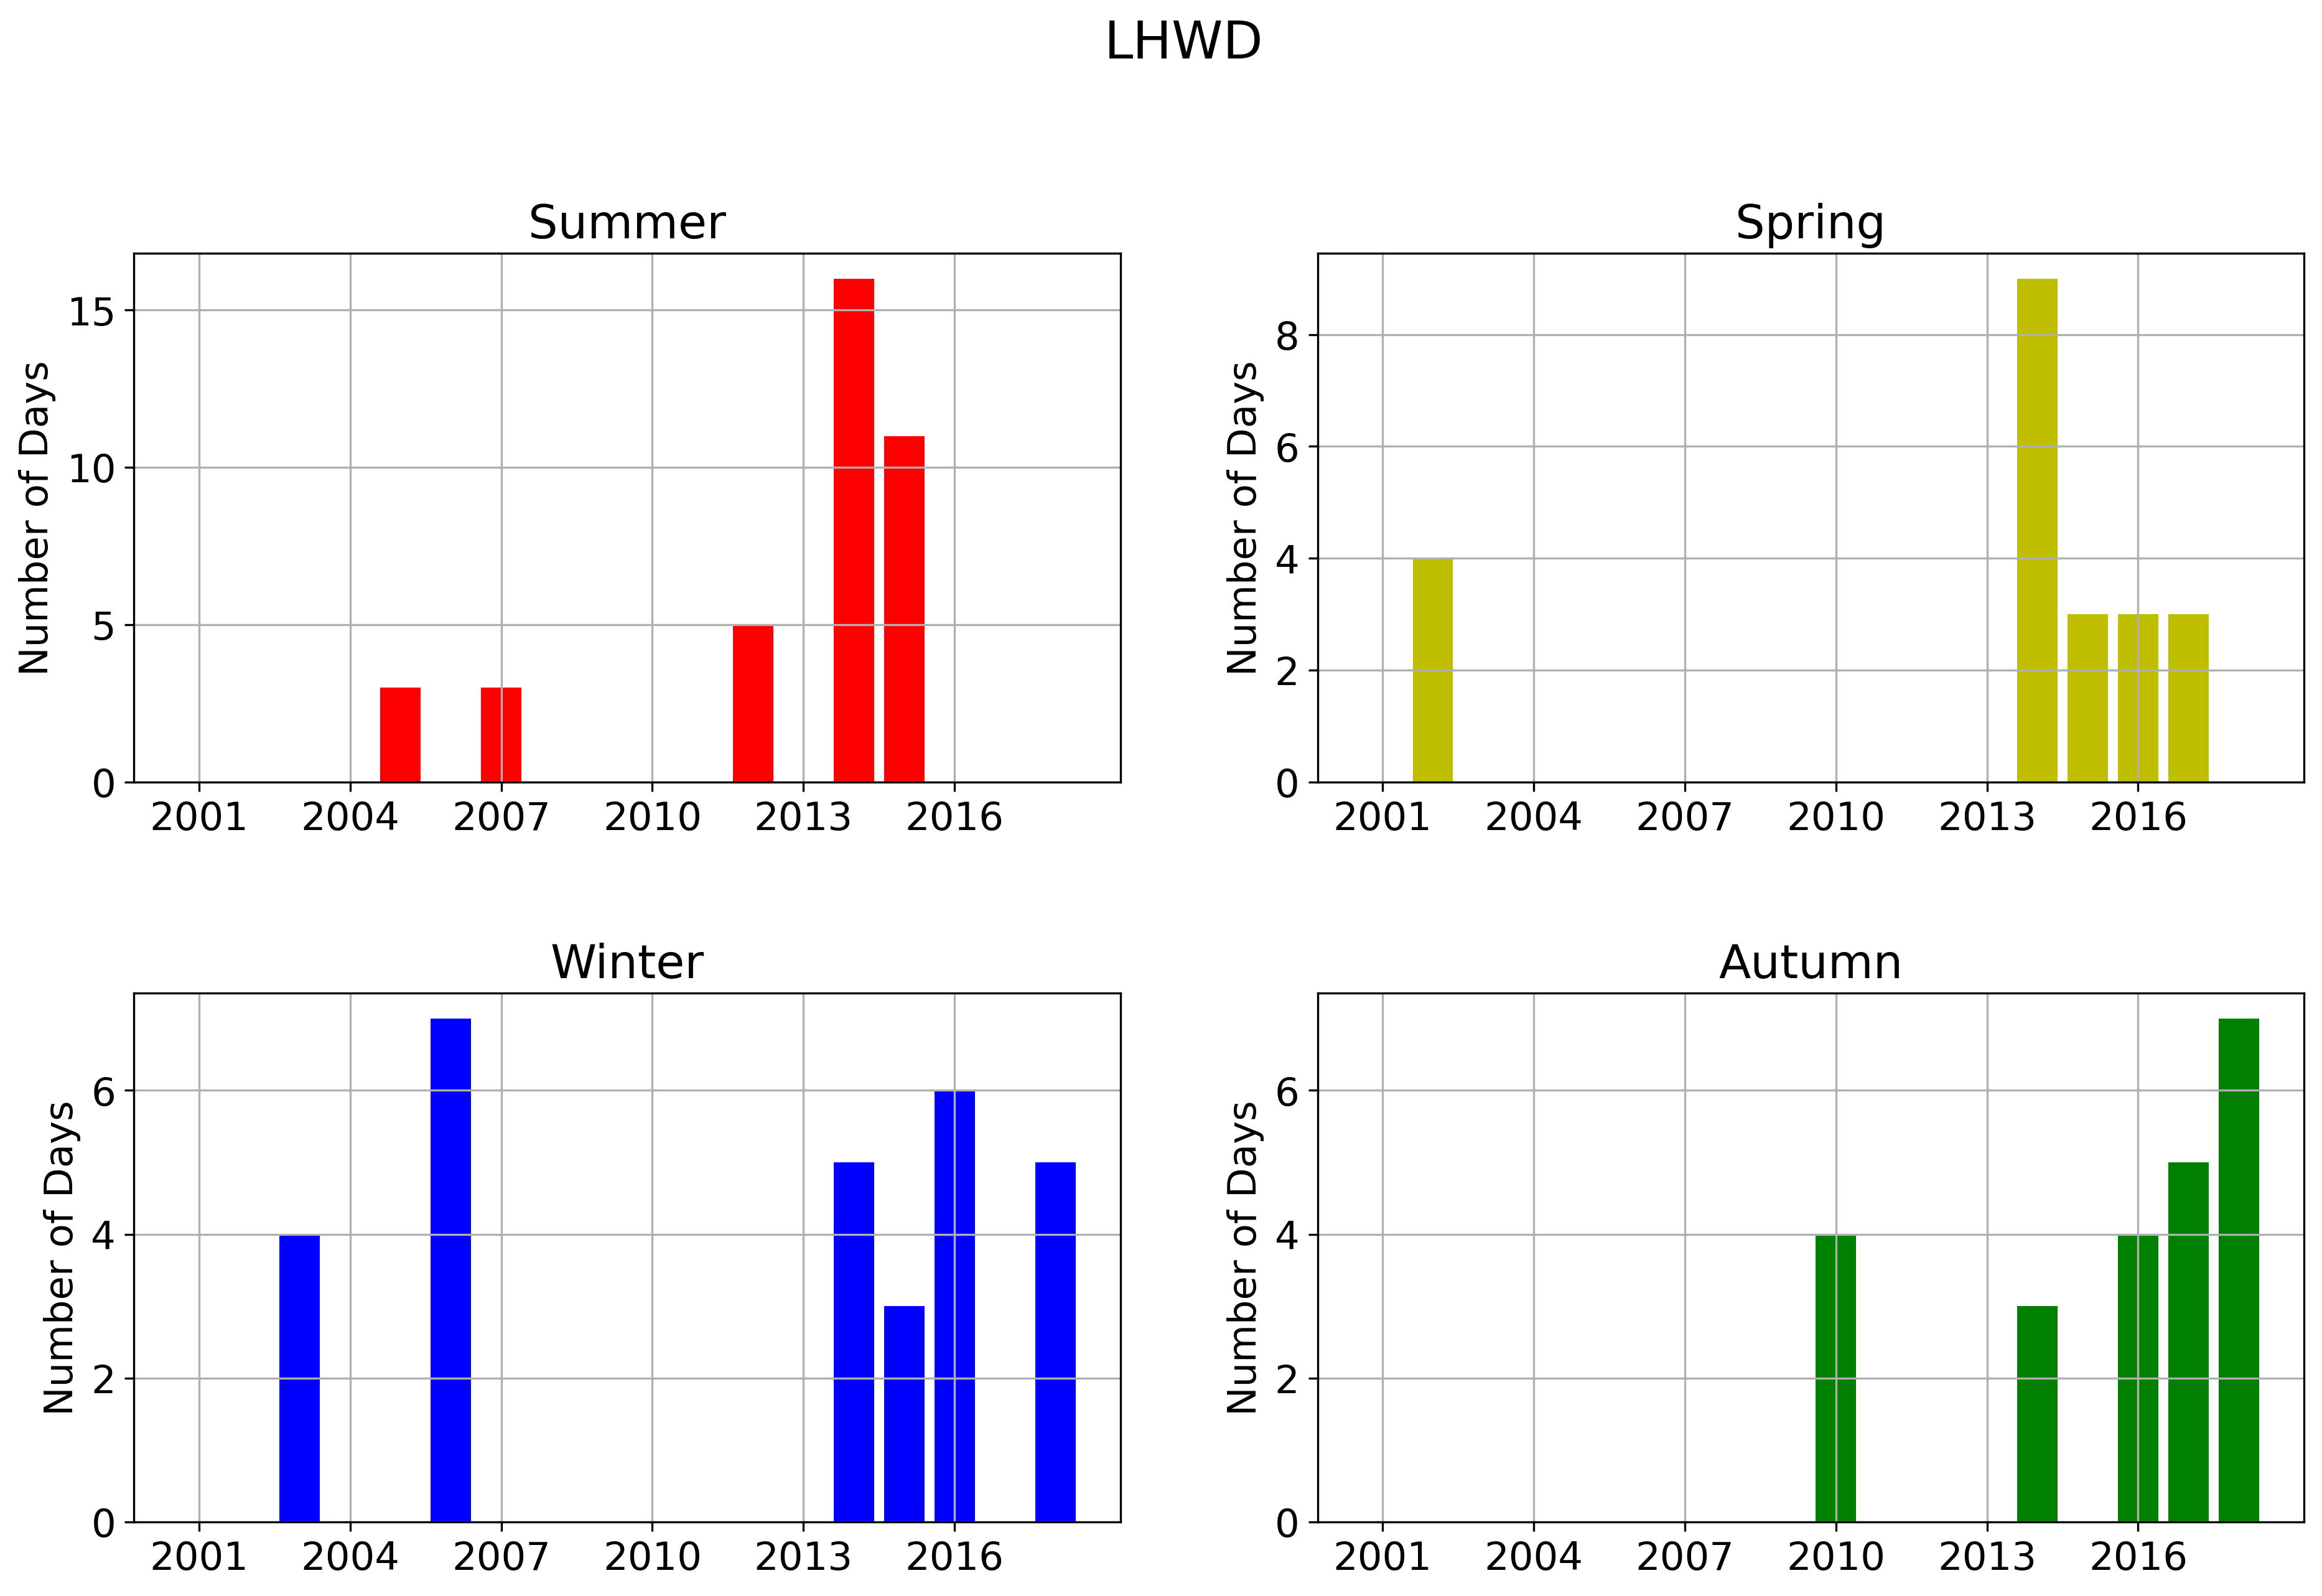

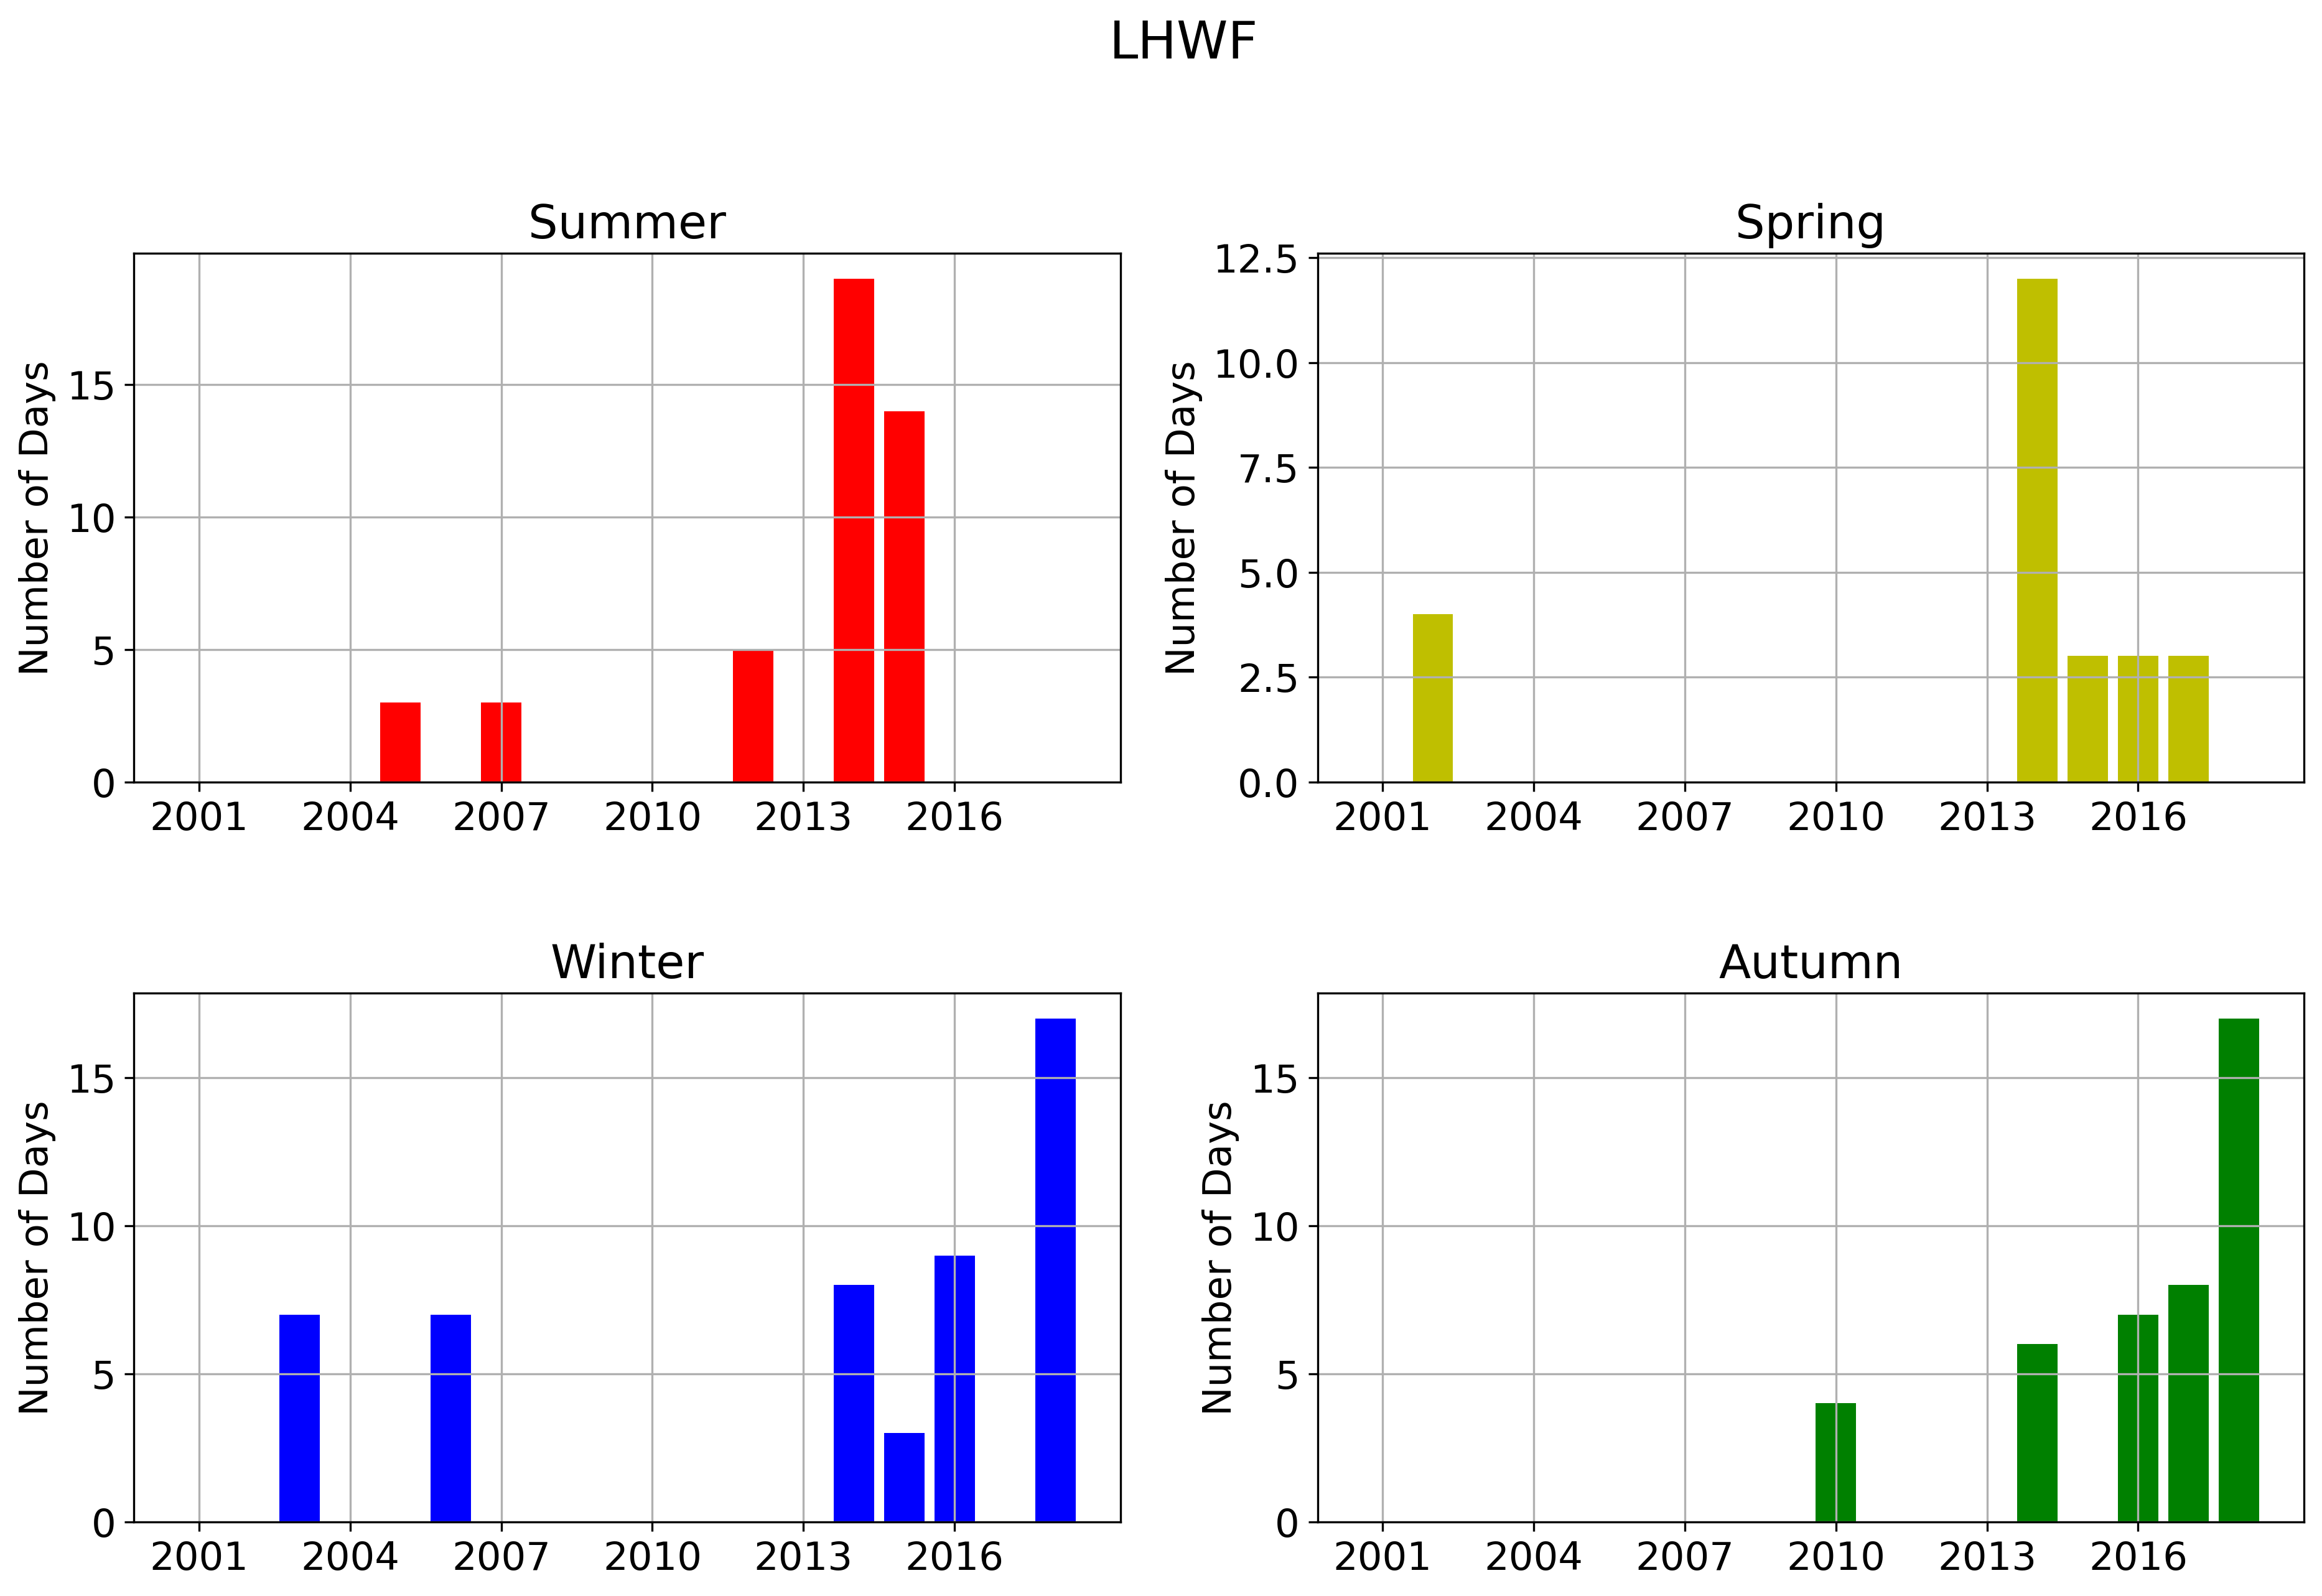

In [ ]:
#seasonal metrics
seasonal_metrics = tex.wave_seasonMetrics(database,'LHW',True)

In [ ]:
#rename columns
database = database.rename(columns={'above_pct_dif':'above_pressure_dif'})

### **High Humidity Waves**

In [ ]:
help(tex.check_HighHumidityWave)

Help on function check_HighHumidityWave in module climatex:

check_HighHumidityWave(database, db_columnMAX, db_columnMIN, climatic_normal, pct_columnMAX, pct_columnMIN, db_columnDay365=False, db_complete=False, cn_columnDay365=False, df_pct=None, percentile_value=0.9, window_size=15)
    #-------------------------------------------------------------------------------
    ## Checks for High Humidity Waves on the database according to the Climatic Normal 
    ##
    ## This function is inspired in Geirinhas et al. 2018 method for thermal waves and adapted
    ## for humidity waves. It obtains first a dataframe with the percentiles computed from the Climatic Normal 
    ## according to the defined window size (df_pct). Then compares it with the database,
    ## to check if the maximum and minimum values of humidity are above the corresponding percentile.
    ## If they are above the threshold, the column 'above_pct' receives 1. This column is 
    ## then used to identify if there are 3 o

In [ ]:
#get dataframe with columns 'above_pct' and 'HHW' indicating the occurence of a high humidity wave
#and the dataframe with the 90th percentile for maximum and minimum humidity
database,df_pct = tex.check_HighHumidityWave(database,'HMAX','HMIN',climatic_normal,'HMAX','HMIN')

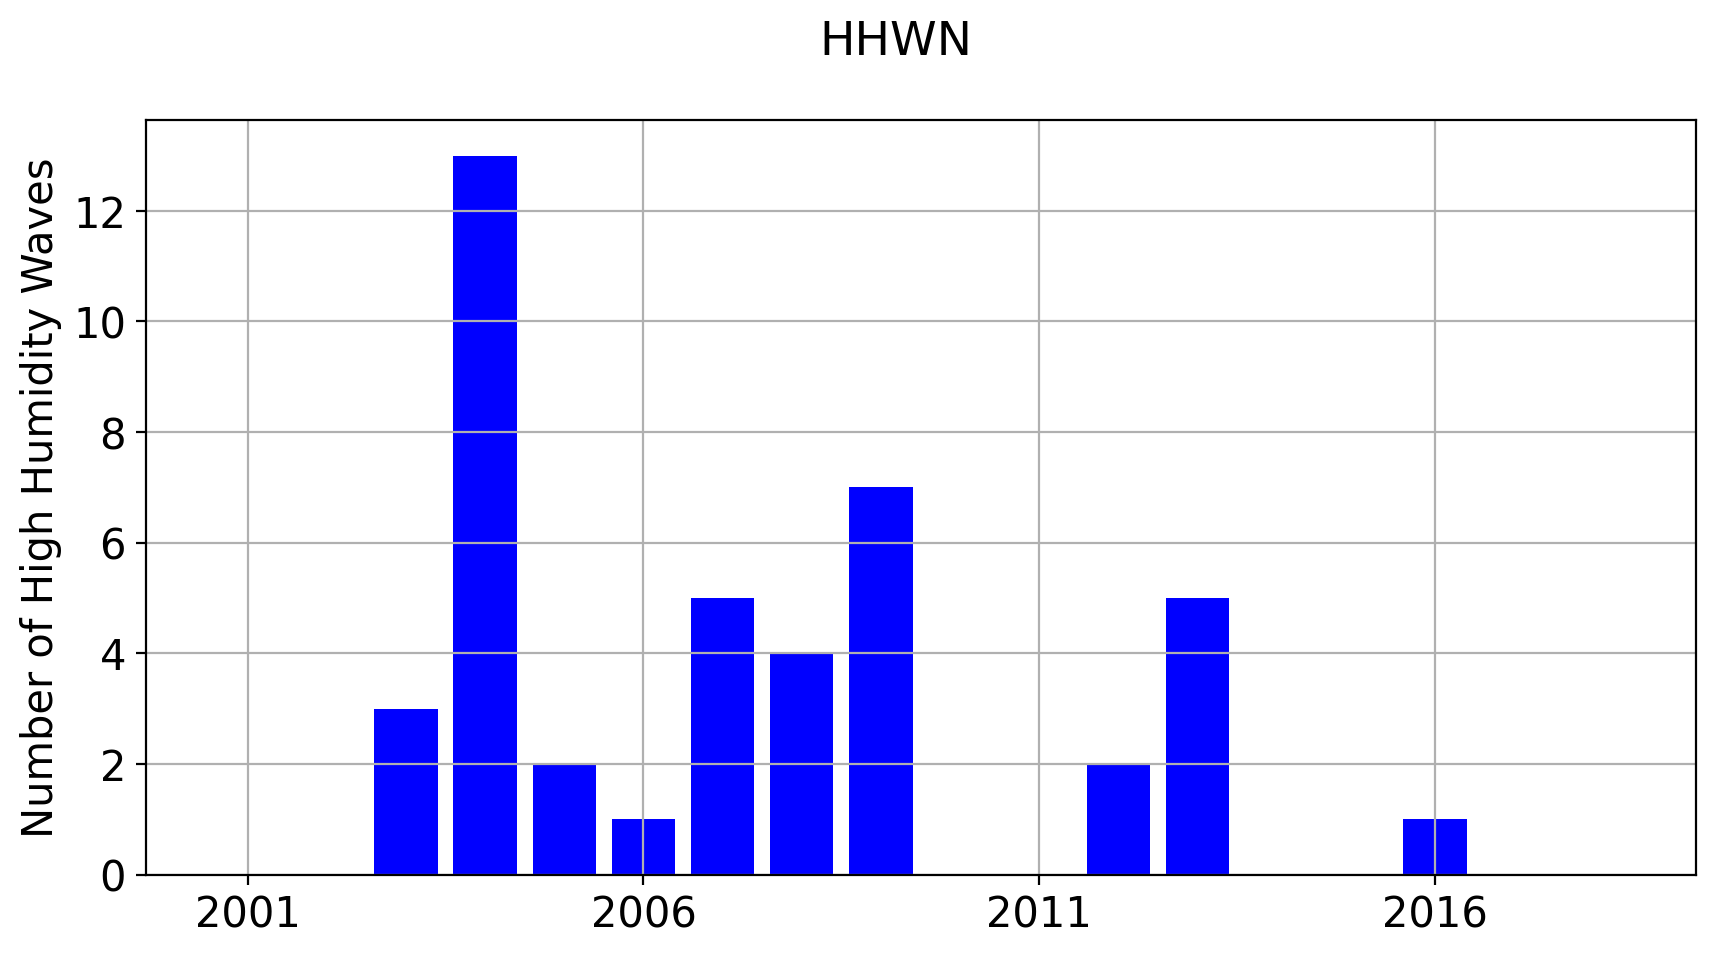

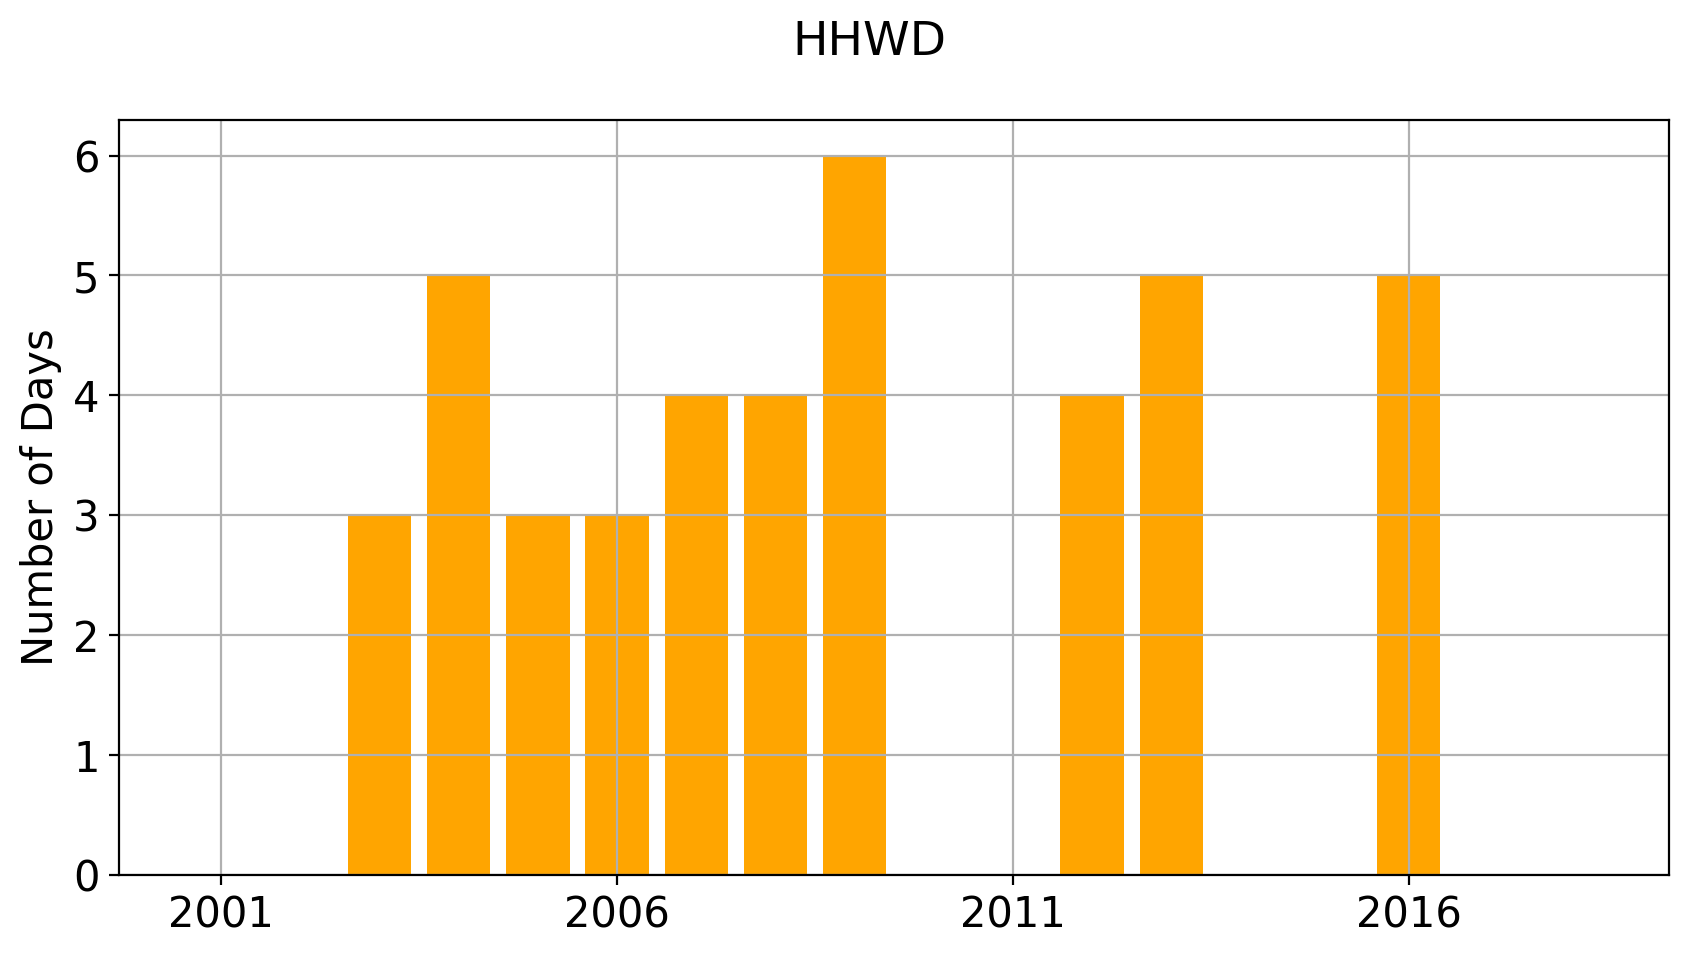

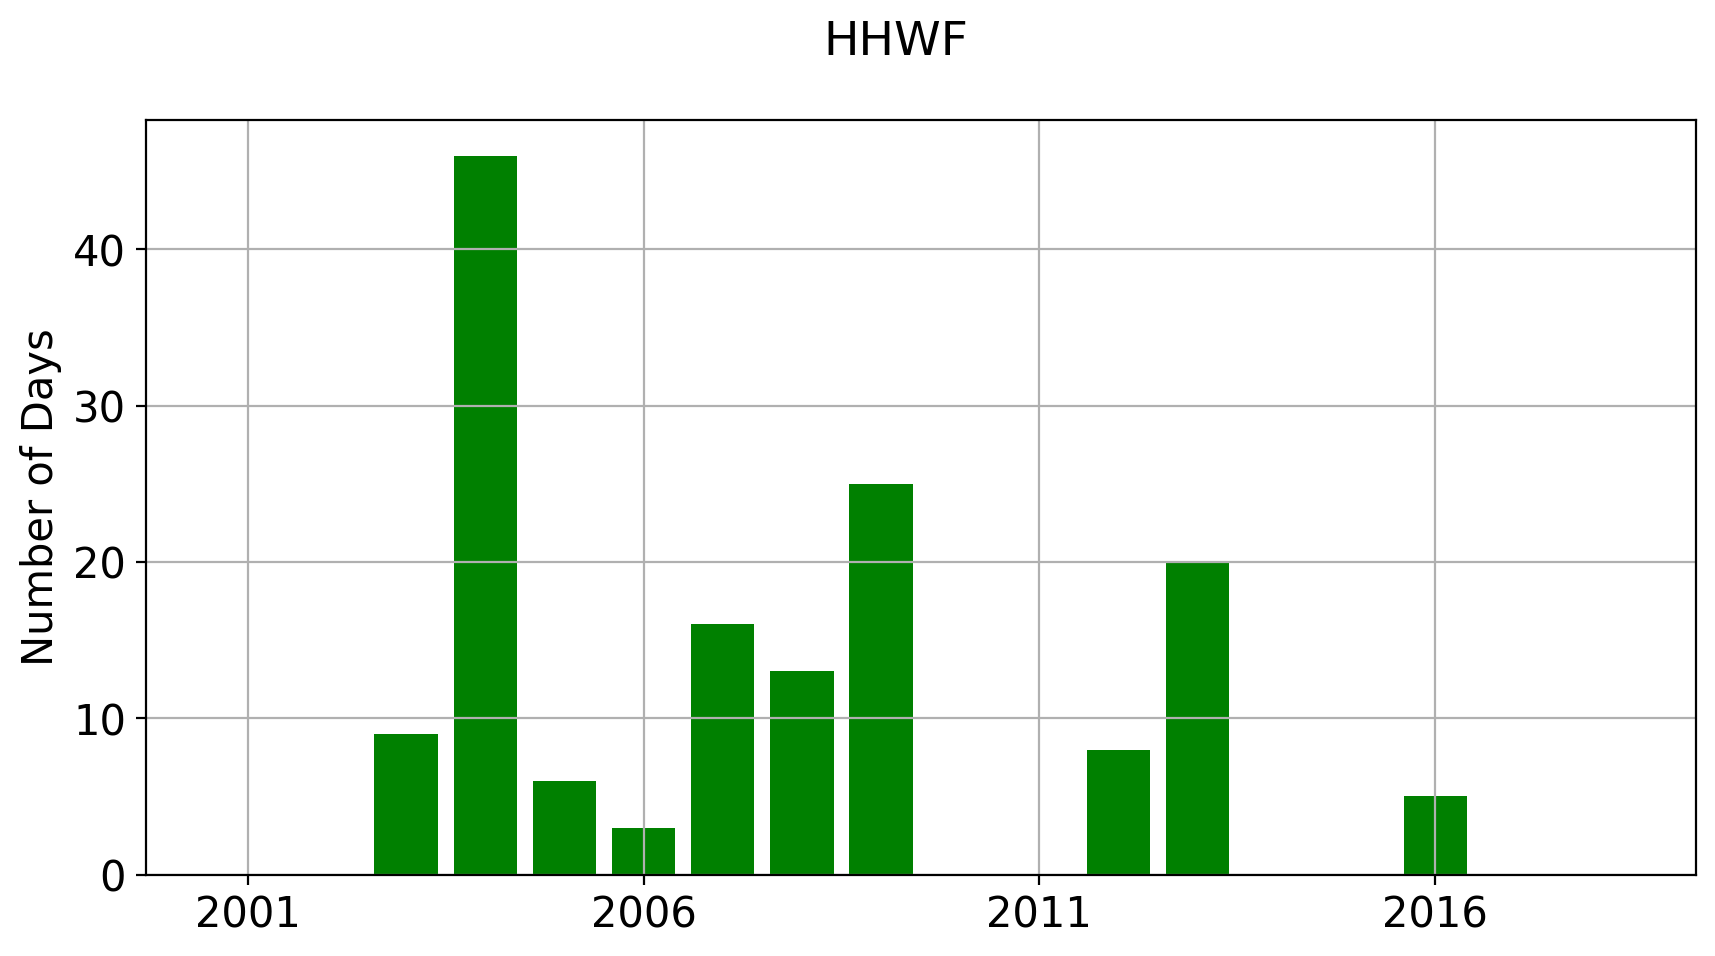

In [ ]:
#metrics
metrics = tex.wave_metrics(database,'HHW',True)

In [ ]:
#number of events
print("Number of events:", int(metrics['HHWN'].sum()))
#total of days under extreme event
print("Number of events:", int(metrics['HHWF'].sum()))
#longest event
print("Number of events:", int(metrics['HHWD'].max()))

Number of events: 43
Number of events: 151
Number of events: 6


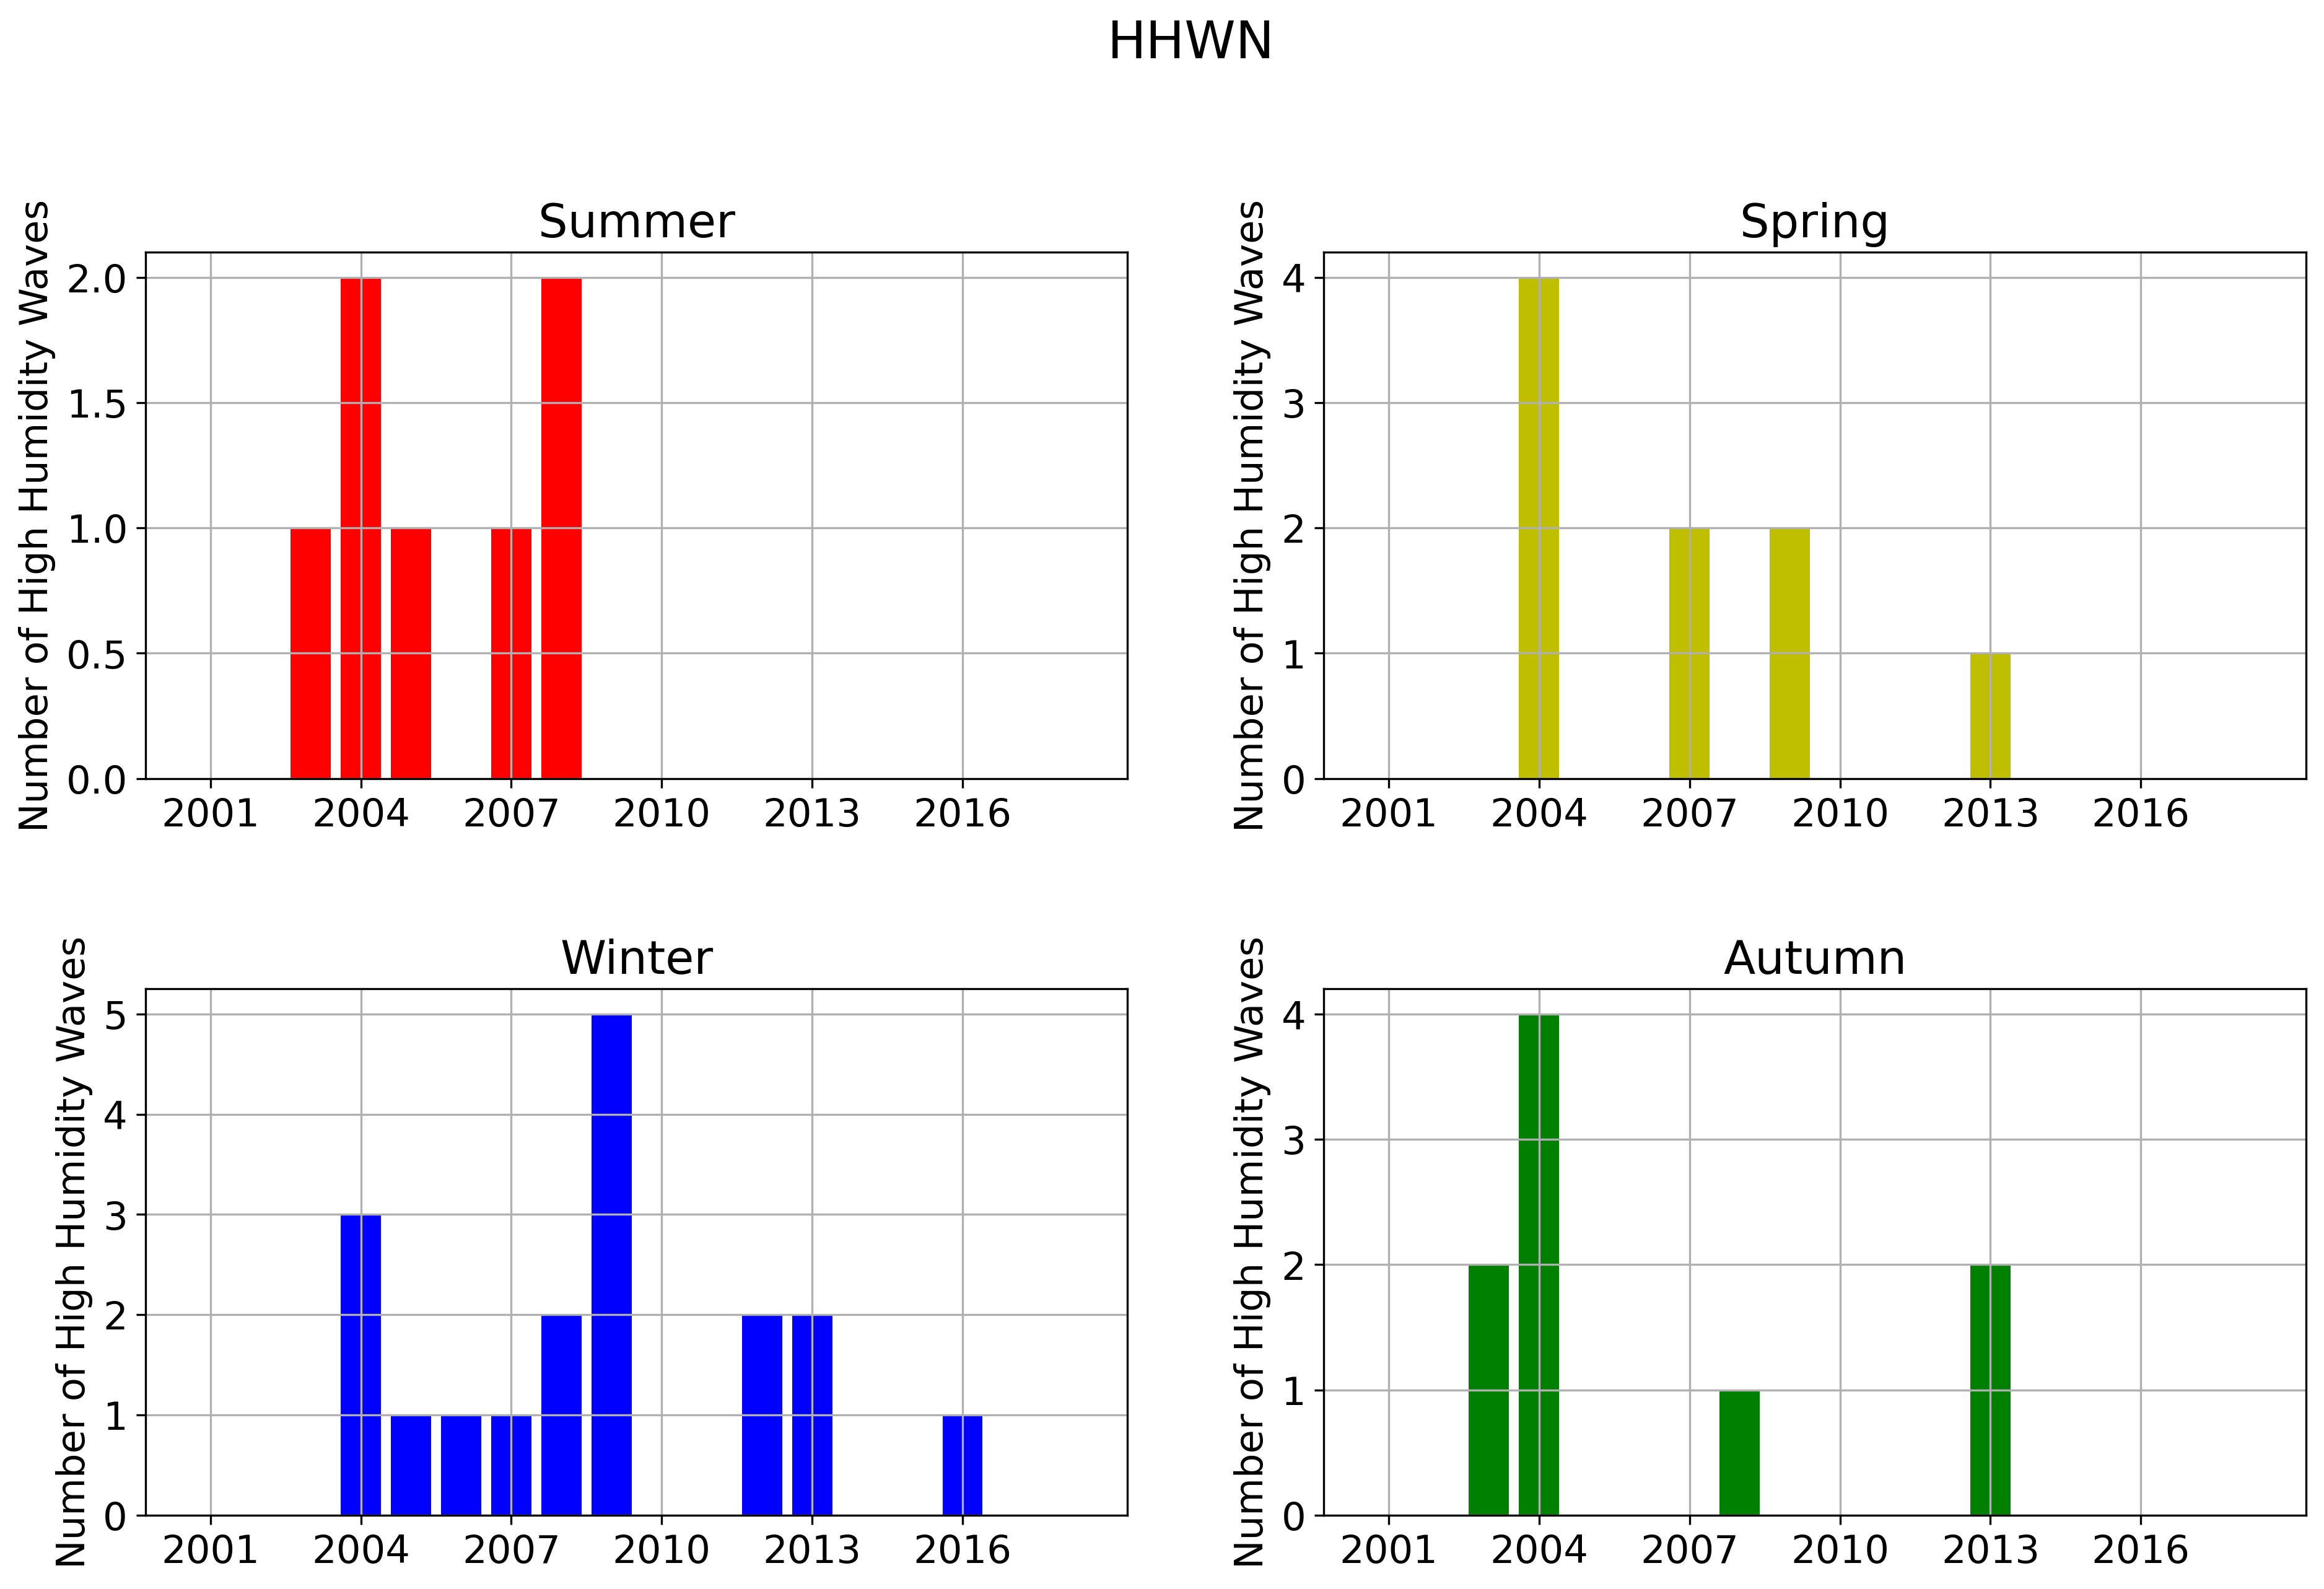

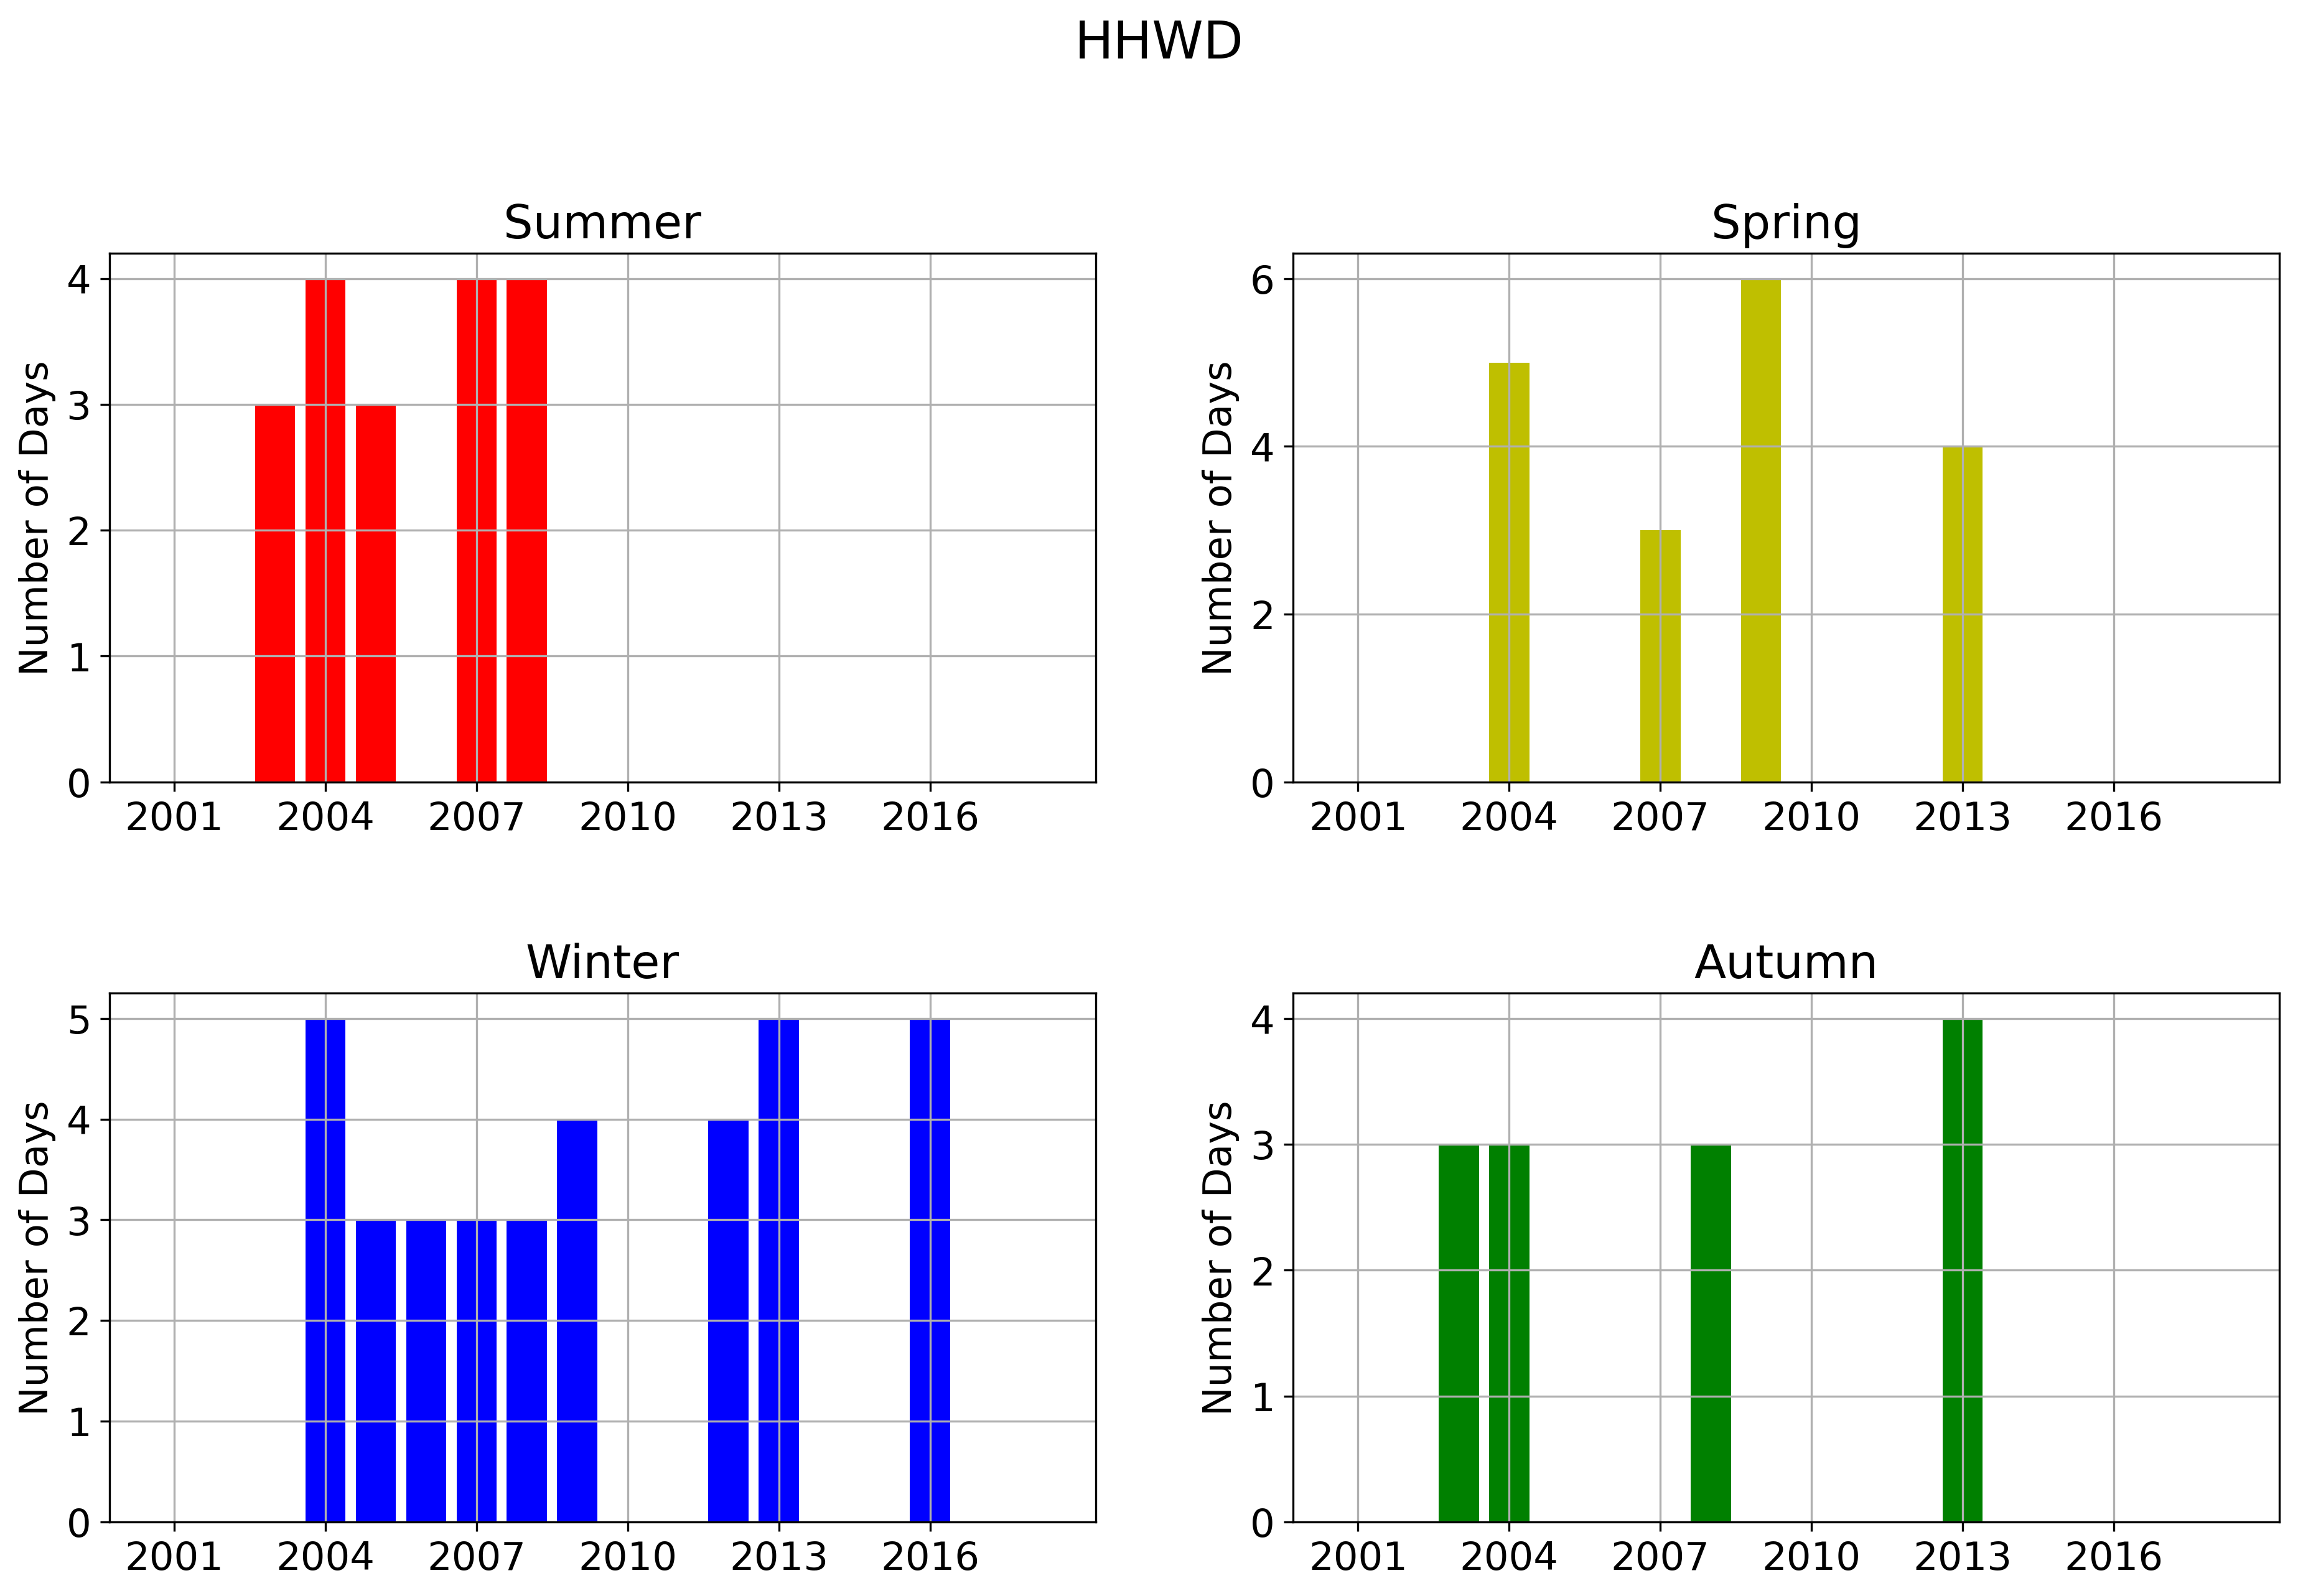

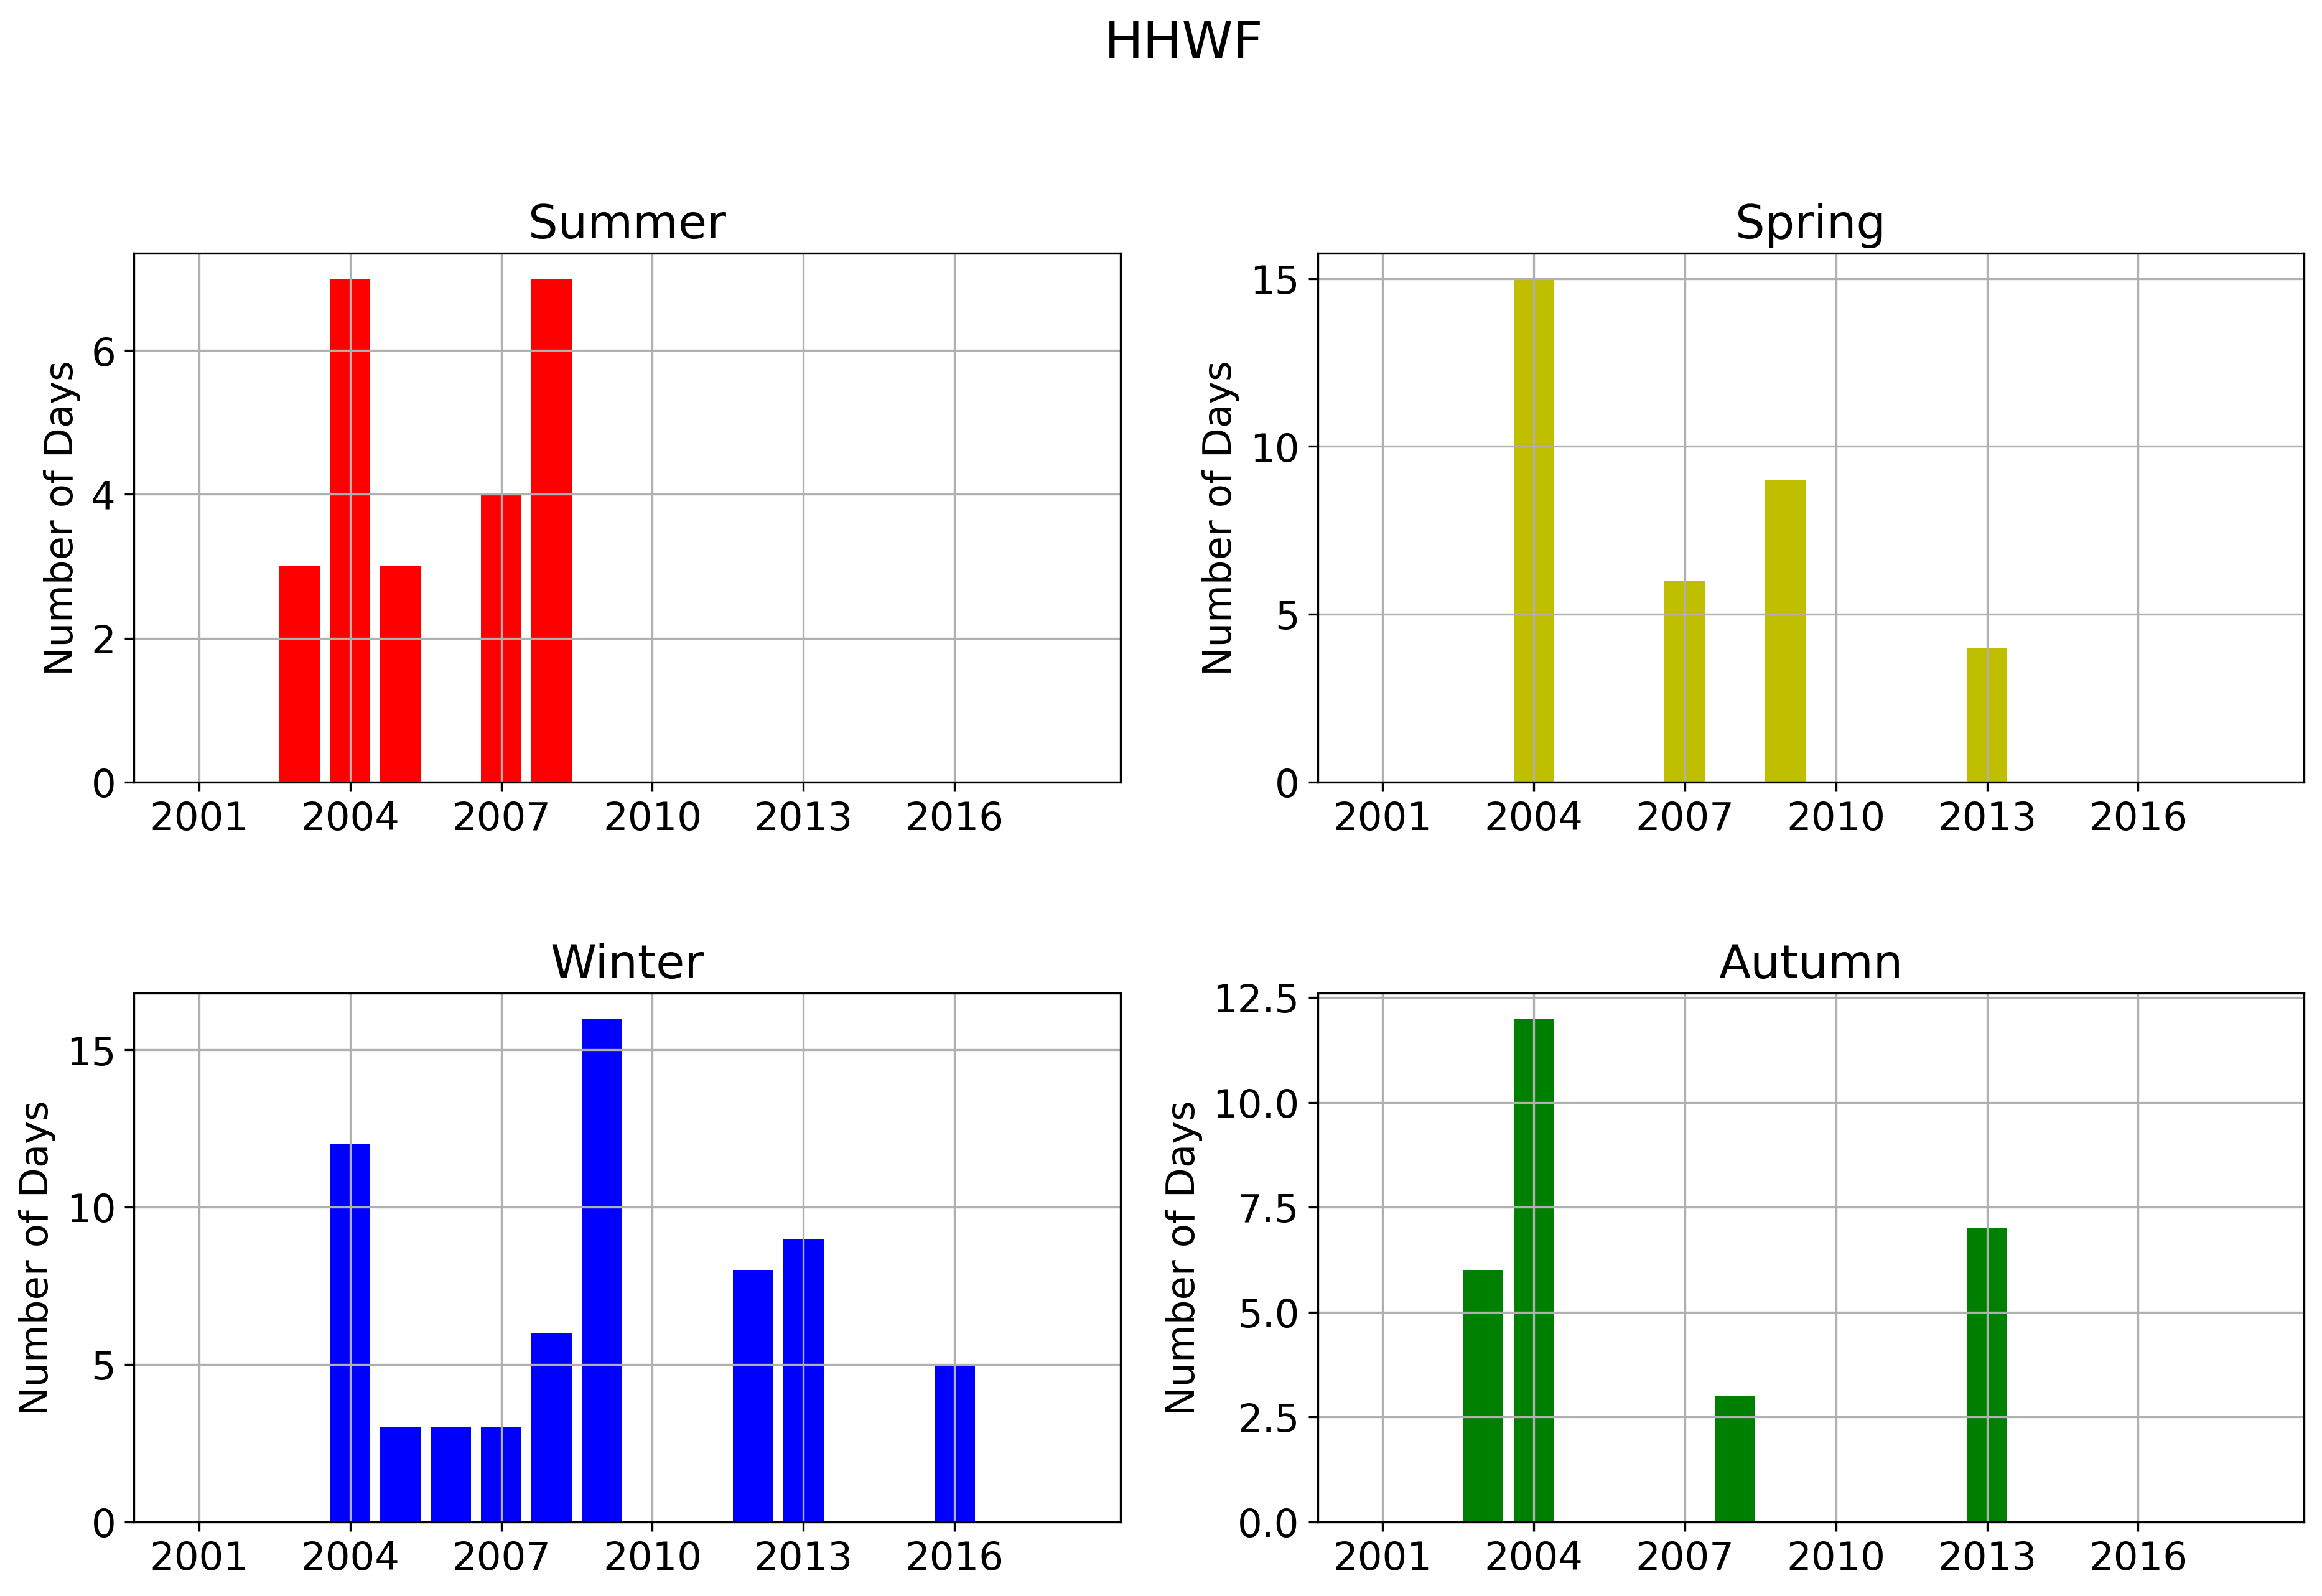

In [ ]:
#seasonal metrics
seasonal_metrics = tex.wave_seasonMetrics(database,'HHW',True)

### **Extreme humidity range**



In [ ]:
help(tex.check_HumidityAboveRange)

Help on function check_HumidityAboveRange in module climatex:

check_HumidityAboveRange(database, db_columnMAX, db_columnMIN, climatic_normal, pct_columnMAX, pct_columnMIN, db_columnDay365=False, db_complete=False, cn_columnDay365=False, df_pct=None, percentile_value=0.9, window_size=15)
    #-------------------------------------------------------------------------------
    ## Checks for days with a high range of humidity according to the Climatic Normal
    ##
    ## It first create a column for range in the database and in the Climatic normal. 
    ## Then it obtains a dataframe with the percentiles computed from the Climatic Normal
    ## according to the defined window size (df_pct). Then compares it with the database,
    ## to check if the range is above the percentile. If it is above the threshold, 
    ## the column 'above_pct_range' receives 1.
    ##
    ## Climatic Normal dataframe needs to have at least 'DATE' and 'pct_column'
    ## Database dataframe needs to have at lea

In [ ]:
#get dataframe with columns 'above_pct_range' indicating the occurence of the event
#and the dataframe with the 90th percentile for humidity range
database, df_pct = tex.check_HumidityAboveRange(database,'HMAX','HMIN',climatic_normal,'HMAX','HMIN')

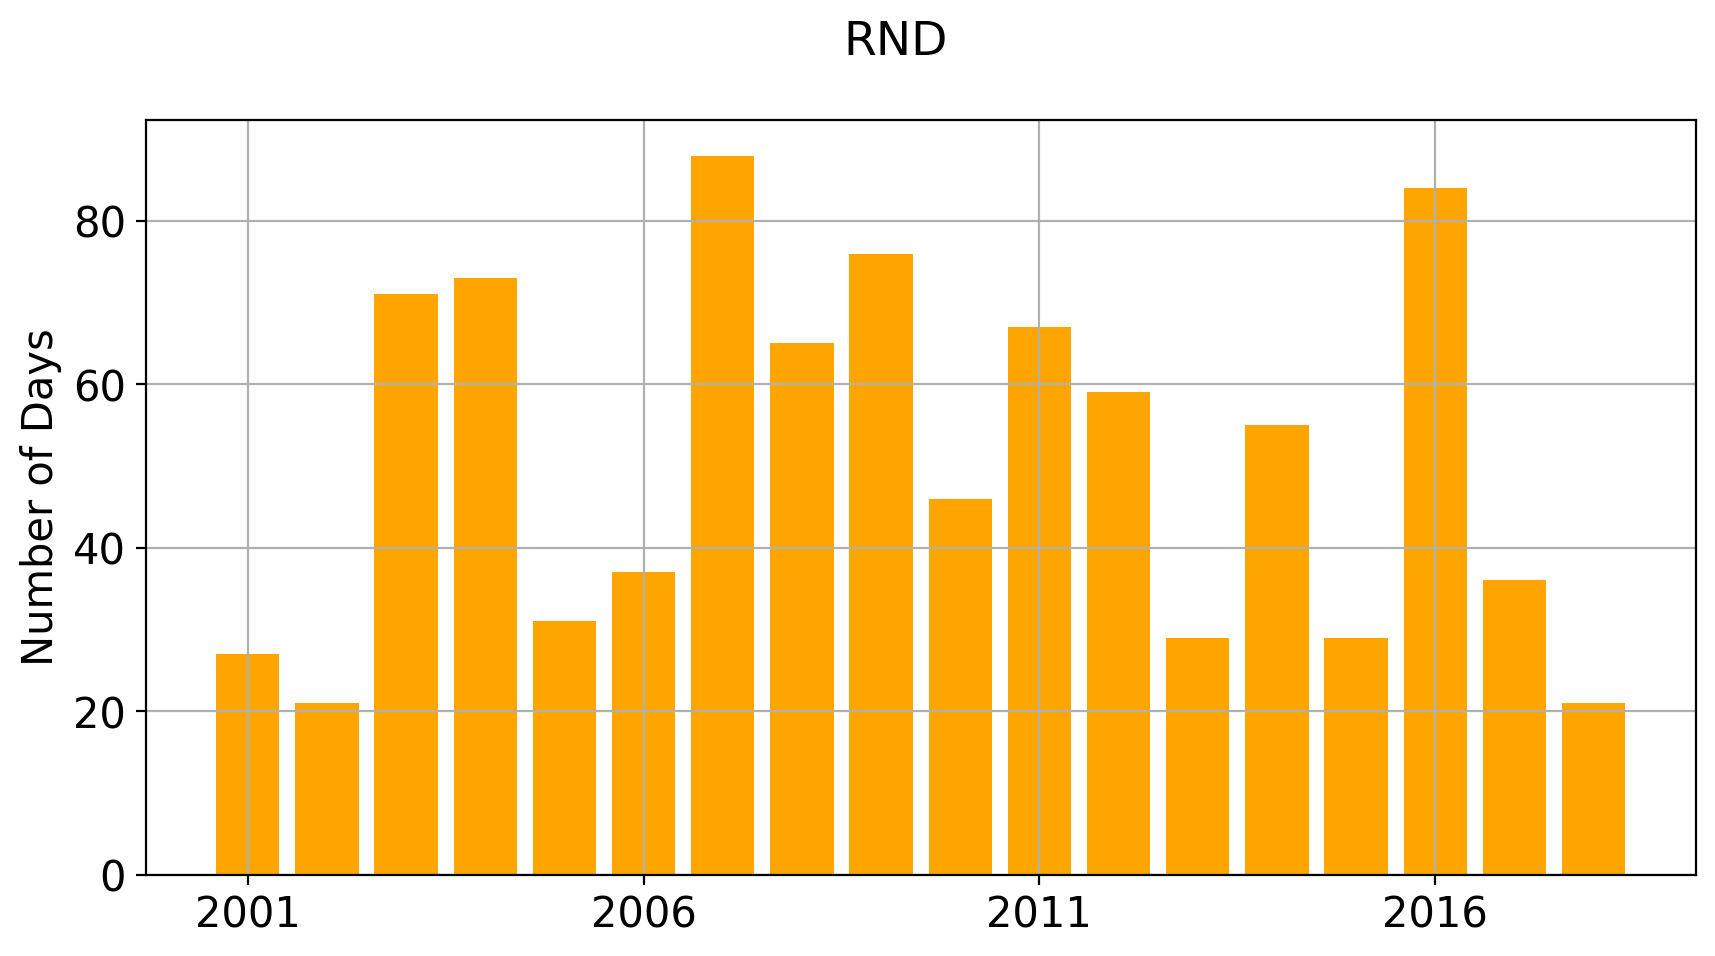

In [ ]:
#metrics
metrics = tex.range_metrics(database,True)

In [ ]:
#number of events
print("Number of events:", int(metrics.sum()))

Number of events: 915


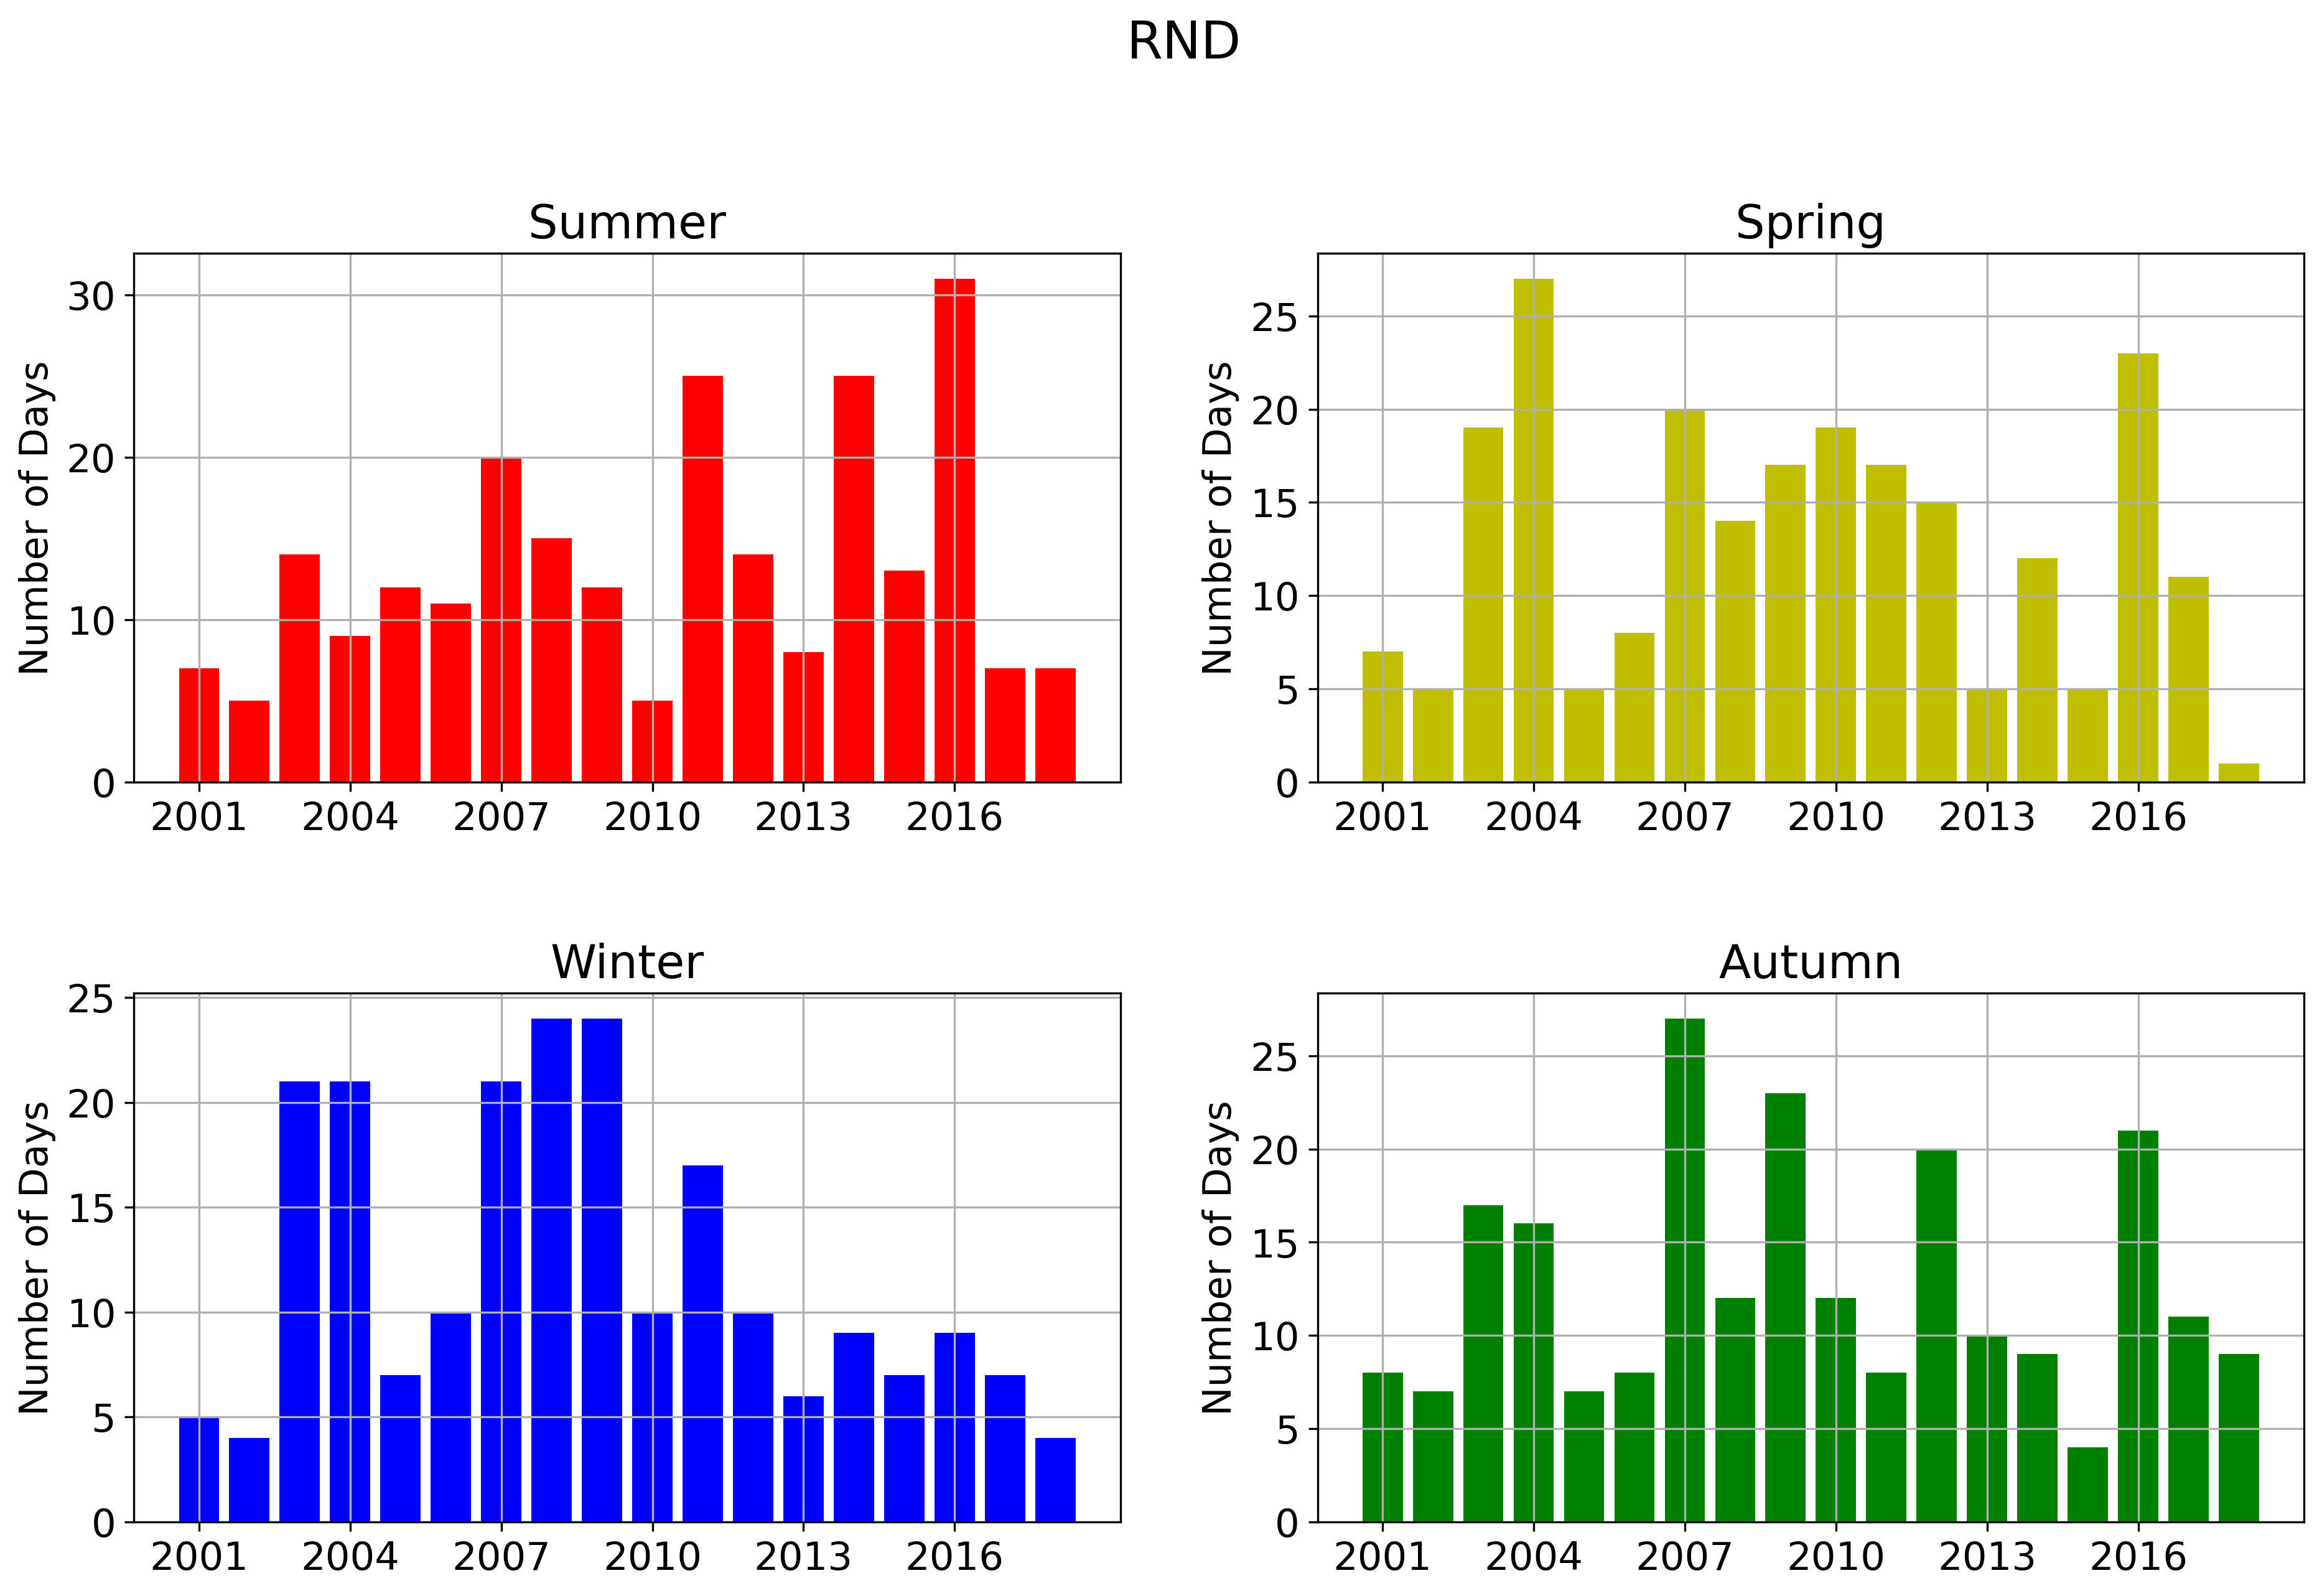

In [ ]:
#seasonal metrics
seasonal_metrics = tex.range_seasonMetrics(database,True)

In [ ]:
#rename columns
database = database.rename(columns={'above_pct_range':'above_humidity_range'})

### **Extreme humidity difference between days**



In [ ]:
help(tex.check_Humidity_difdays)

Help on function check_Humidity_difdays in module climatex:

check_Humidity_difdays(database, db_columnMAX, db_columnMIN, climatic_normal, pct_columnMAX, pct_columnMIN, db_columnDay365=False, db_complete=False, cn_columnDay365=False, df_pct=None, percentile_value=0.9, window_size=15)
    #-------------------------------------------------------------------------------
    ## Checks for subsequent days with a high difference of humidity according to the Climatic Normal
    ##
    ## It first creates columns for the absolute value of difference between maximum
    ## humidity (Dif_max) between two subsequent days and for the difference between minimum
    ## humidity (Dif_min) between two subsequent days in the databate and in the Climatic normal.
    ## It then creates a column 'control' that is equal 1 when dif_max and dif_min have the
    ## same sign (or both positive or both negative).
    ## Then it obtains a  dataframe with the percentiles computed from the
    ## Climatic Normal a

In [ ]:
#get dataframe with columns 'above_pct_dif' indicating the occurence of a event
#and the dataframe with the 90th percentile for maximum and minimum humidity difference
database, df_pct = tex.check_Humidity_difdays(database,'HMAX','HMIN',climatic_normal,'HMAX','HMIN')

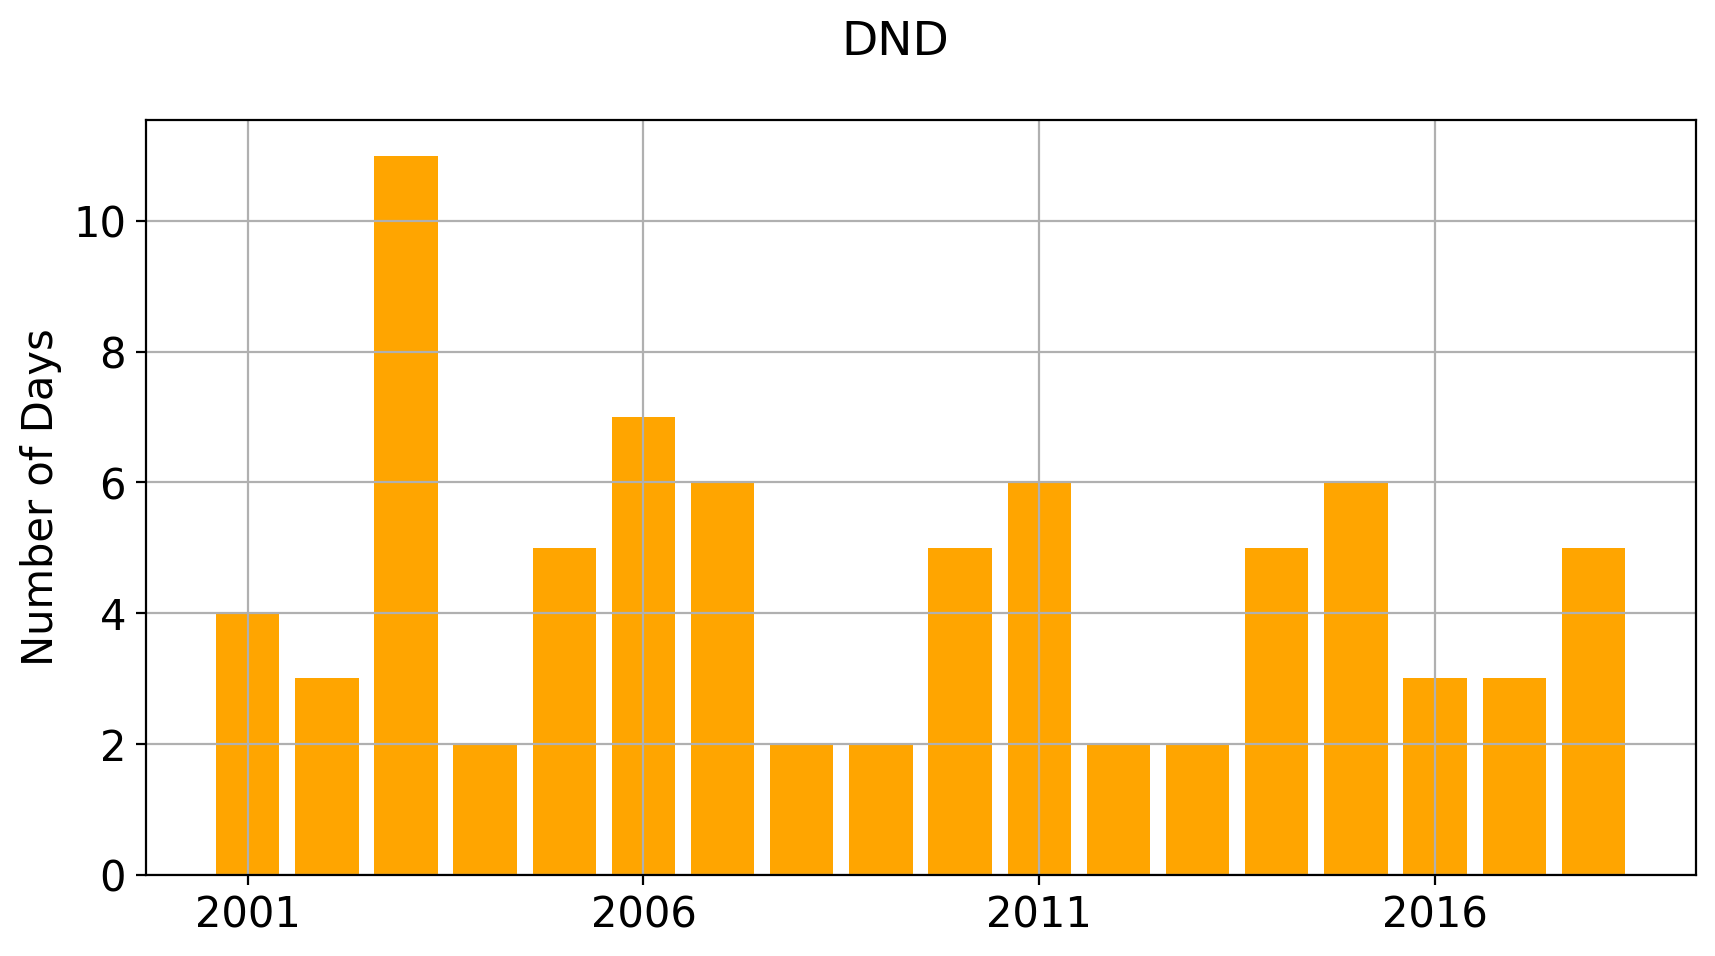

In [ ]:
#metrics
metrics = tex.dif_metrics(database,True)

In [ ]:
#number of events
print("Number of events:", int(metrics.sum()))

Number of events: 79


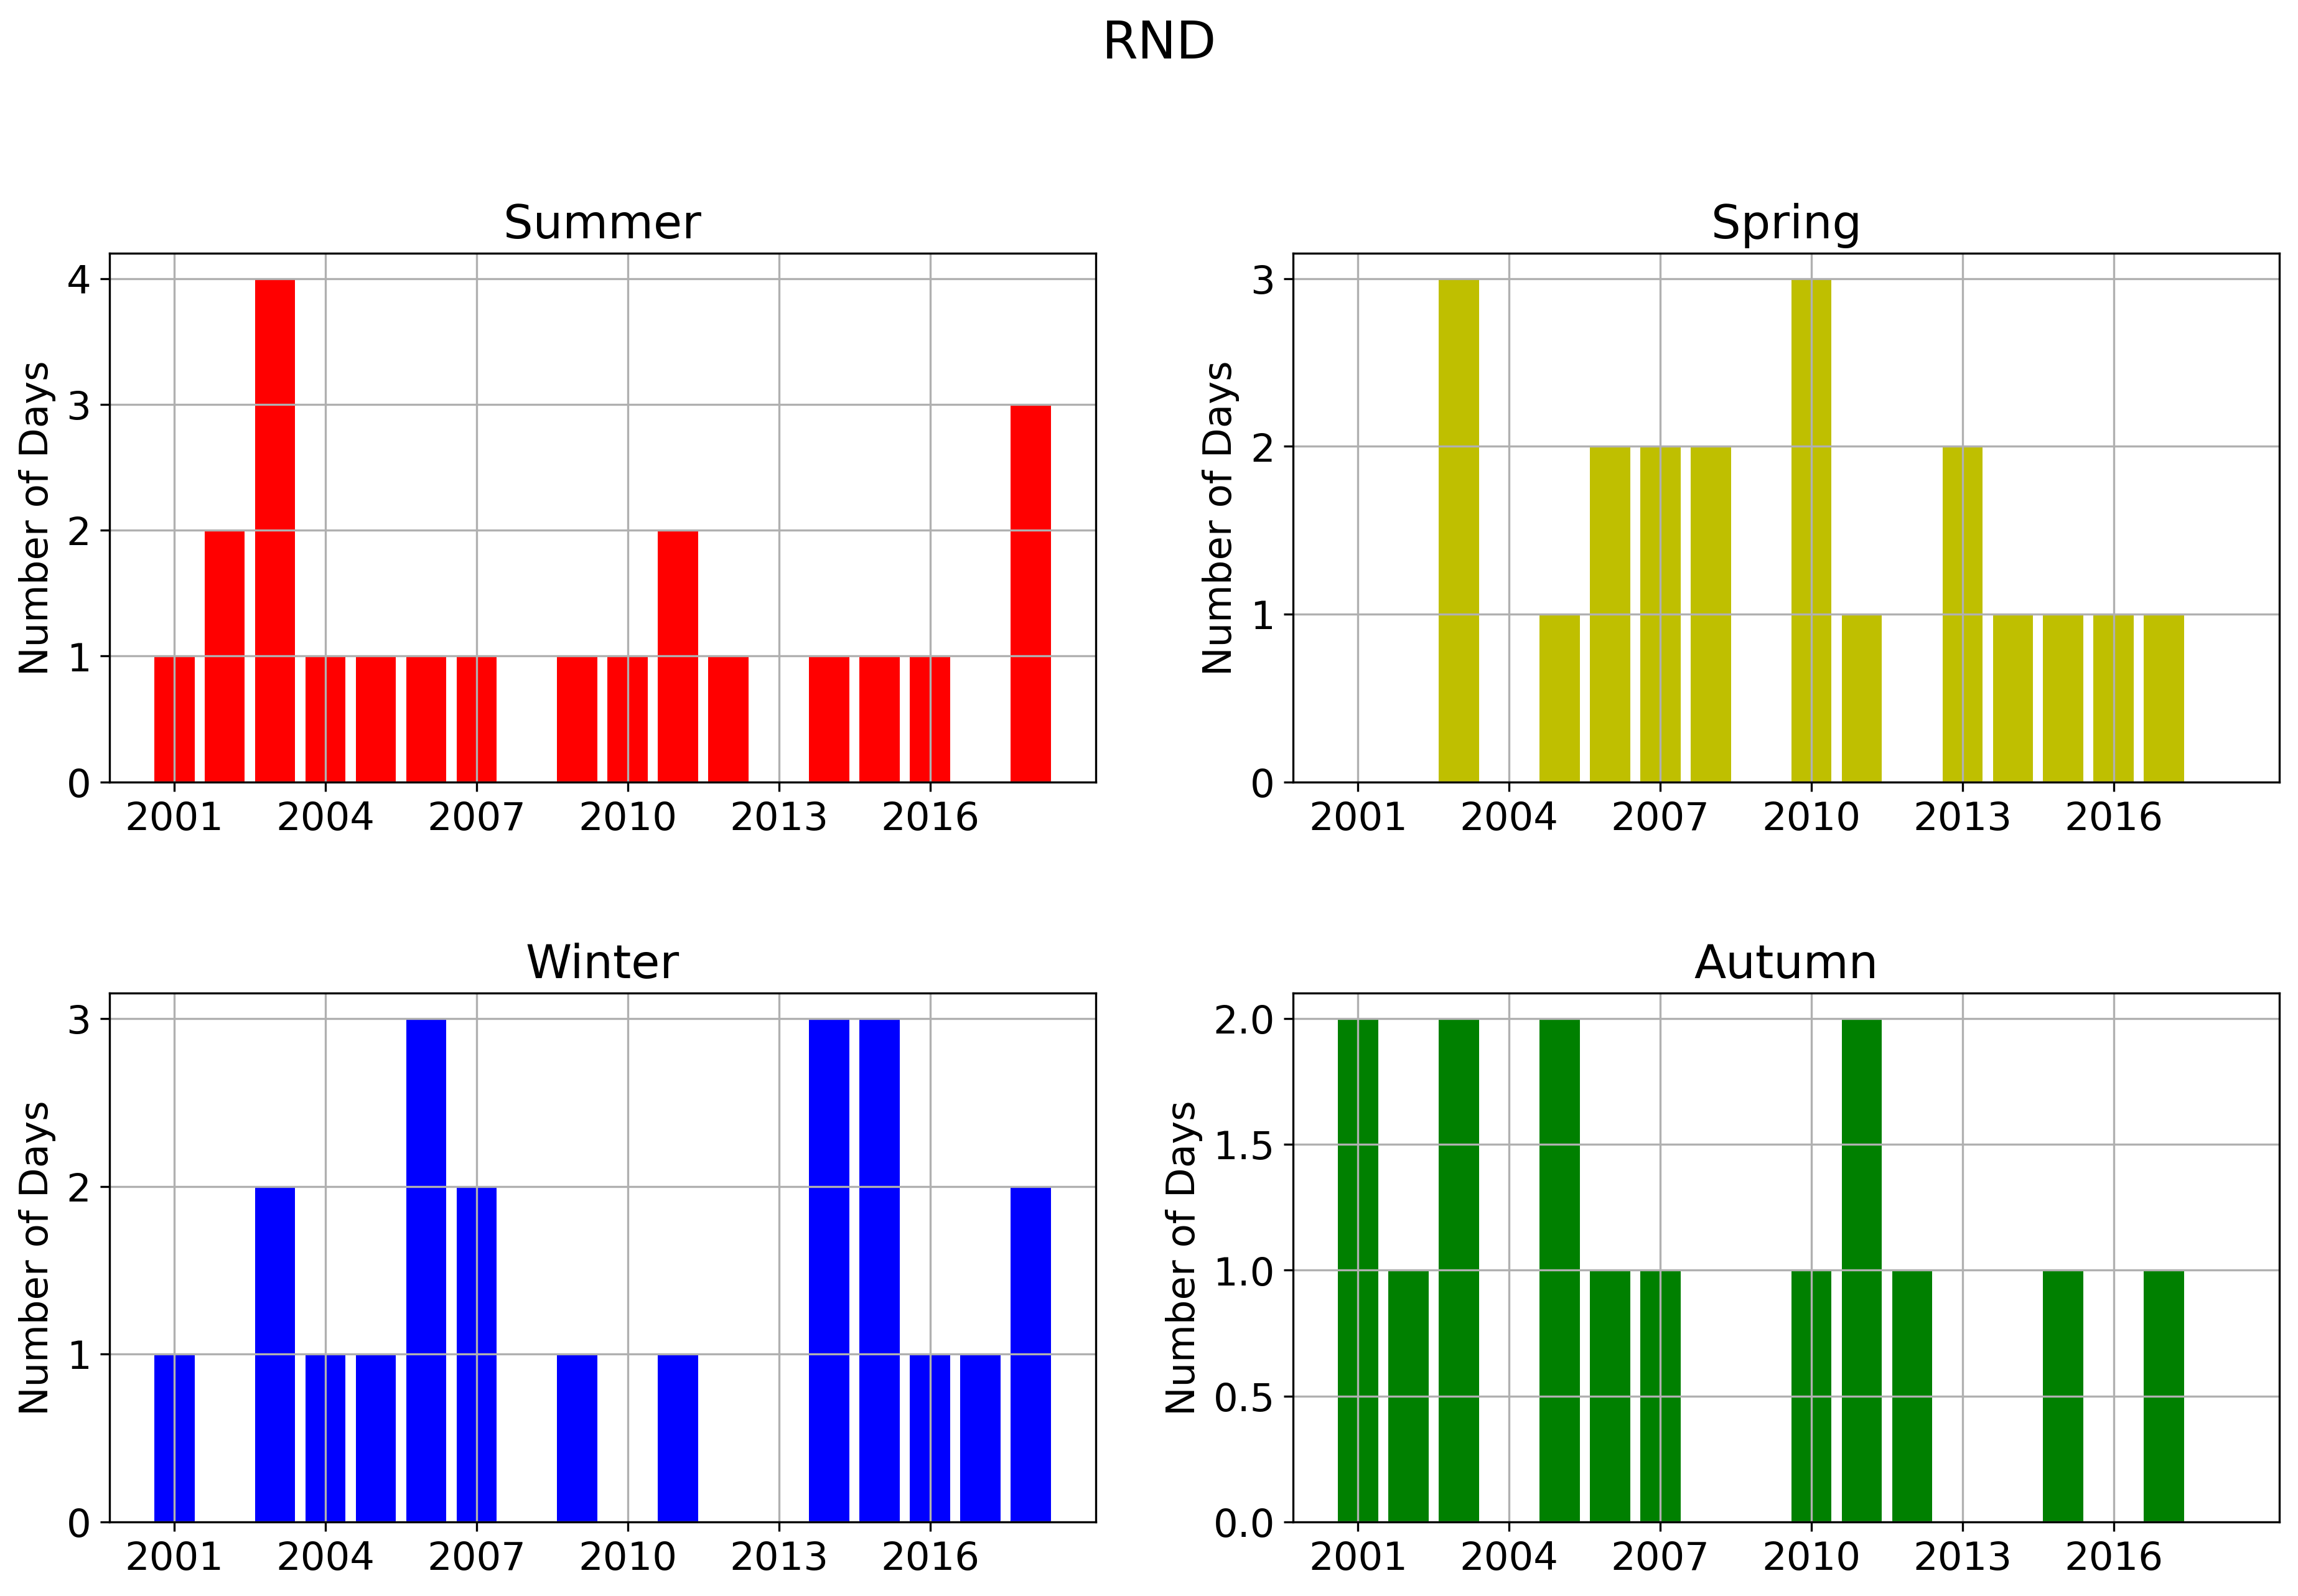

In [ ]:
#seasonal metrics
seasonal_metrics = tex.dif_seasonMetrics(database,True)

In [ ]:
#rename columns
database = database.rename(columns={'above_pct_dif':'above_humidity_dif'})

##**Save**

In [ ]:
#rename columns
database = database.rename(columns={'Temperature range':'T_RANGE','Humidity range':'H_RANGE' })

#keep only needed columns
database = database[['DATE','TMIN','TMAX','AVGPRESSURE','HMIN','HMAX','T_RANGE','H_RANGE',
                     'above_temp_range','above_temp_dif',
                     'above_pressure_dif','LPW','HPW',
                     'above_humidity_range','above_humidity_dif', 'LHW','HHW']]

#convert to int
database[['above_temp_range','above_temp_dif',
          'above_pressure_dif','LPW','HPW',
          'above_humidity_range','above_humidity_dif', 'LHW','HHW']] = database[['above_temp_range','above_temp_dif',
                                                                                  'above_pressure_dif','LPW','HPW',
                                                                                  'above_humidity_range','above_humidity_dif', 'LHW','HHW']].astype(int)

In [ ]:
database.to_csv('EV_VCP.csv')